In [32]:
import re
import os

data = os.popen("ss -ti").read().split("\n")

In [33]:
print(data)
print(len(data))

['State Recv-Q Send-Q              Local Address:Port                Peer Address:Port                                                                            Process                                                                         ', 'ESTAB 0      0                 128.205.218.120:39672            128.205.220.131:24800                                                                           ', '\t bbr wscale:6,7 rto:204 rtt:1.384/0.232 ato:44 mss:1448 pmtu:1500 rcvmss:613 advmss:1448 cwnd:194 bytes_sent:98927 bytes_acked:98928 bytes_received:139969 segs_out:15697 segs_in:25830 data_segs_out:15566 data_segs_in:11586 bbr:(bw:163.7Mbps,mrtt:0.879,pacing_gain:2.88672,cwnd_gain:2.88672) send 1623.8Mbps lastsnd:16 lastrcv:16 lastack:12 pacing_rate 467.9Mbps delivery_rate 163.7Mbps delivered:15567 app_limited busy:12160ms retrans:0/1 rcv_rtt:459384 rcv_space:64271 rcv_ssthresh:64088 minrtt:0.29', 'ESTAB 0      422280            128.205.218.120:43302            128.205.223.105:5002

In [35]:
goodput=0
for i in range(1,len(data)):
    if "128.205.223.105:50021" in data[i-1]:
        goodput+=int((re.findall("\d+",re.findall(r'delivery_rate [\d\.-]+Mbps+',data[i])[0])[0]))
        print("goodput",goodput)
        parse_data = data[i].split(" ")
        for entry in parse_data:
            if "minrtt" in entry:
                continue
            else:
                if "cwnd_gain" in entry:
                    continue
                if "cwnd" in entry:
                    print(entry)
                    print("cwnd ",int(entry.split(":")[-1]))
                if "rtt" in entry:
                    print('rtt entry',entry)
                    print('rtt values',(float(re.findall(r":(.*?)/", entry)[0])))
                
        print(data[i])

goodput 28
rtt entry rtt:3.035/0.814
rtt values 3.035
cwnd:23
cwnd  23
	 bbr wscale:7,7 rto:204 rtt:3.035/0.814 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:23 ssthresh:68 bytes_sent:45251972 bytes_retrans:31856 bytes_acked:45202741 segs_out:31258 segs_in:7891 data_segs_out:31256 bbr:(bw:63.0Mbps,mrtt:0.359,pacing_gain:1,cwnd_gain:2) send 87.8Mbps lastrcv:9416 pacing_rate 62.4Mbps delivery_rate 28.5Mbps delivered:31223 busy:9104ms unacked:12 retrans:0/22 rcv_space:14480 rcv_ssthresh:64088 notsent:404904 minrtt:0.359
goodput 37
rtt entry rtt:2.657/0.53
rtt values 2.657
cwnd:38
cwnd  38
	 bbr wscale:7,7 rto:204 rtt:2.657/0.53 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:38 ssthresh:94 bytes_sent:46250020 bytes_acked:46250021 segs_out:31945 segs_in:8201 data_segs_out:31943 bbr:(bw:71.3Mbps,mrtt:0.43,pacing_gain:1.25,cwnd_gain:2) send 165.7Mbps lastsnd:20 lastrcv:9416 lastack:20 pacing_rate 88.3Mbps delivery_rate 9.5Mbps delivered:31944 busy:9304ms rcv_space:14480 rcv_ssthresh:64088 mi

In [38]:
import re
import os

data_ = os.popen("ss -ti").read().split("\n")
print(data_)
print(len(data_))
goodput=0
for i in range(1,len(data_)):
    if "128.205.223.105:50021" in data_[i-1]:
        goodput+=int((re.findall("\d+",re.findall(r'delivery_rate [\d\.-]+Mbps+',data_[i])[0])[0]))
        print("goodput",goodput)
        parse_data = data_[i].split(" ")
        for entry in parse_data:
            if "minrtt" in entry:
                continue
            else:
                if "cwnd_gain" in entry:
                    continue
                if "cwnd" in entry:
                    print(entry)
                    print("cwnd ",int(entry.split(":")[-1]))
                if "rtt" in entry:
                    print('rtt entry',entry)
                    print('rtt values',(float(re.findall(r":(.*?)/", entry)[0])))
                
        print(data_[i])

['State Recv-Q Send-Q             Local Address:Port                 Peer Address:Port                                                                            Process                                                                         ', 'ESTAB 0      0                128.205.218.120:39672             128.205.220.131:24800                                                                           ', '\t bbr wscale:6,7 rto:204 rtt:2.393/0.584 ato:40 mss:1448 pmtu:1500 rcvmss:613 advmss:1448 cwnd:197 bytes_sent:161220 bytes_acked:161221 bytes_received:229701 segs_out:25233 segs_in:42130 data_segs_out:25049 data_segs_in:19061 bbr:(bw:163.7Mbps,mrtt:1.132,pacing_gain:2.88672,cwnd_gain:2.88672) send 953.6Mbps lastsnd:20 lastrcv:20 lastack:16 pacing_rate 467.9Mbps delivery_rate 163.7Mbps delivered:25050 app_limited busy:19404ms retrans:0/1 rcv_rtt:283779 rcv_space:64271 rcv_ssthresh:64088 minrtt:0.297', 'ESTAB 0      1984432          128.205.218.120:43392             128.205.223.105:50

In [47]:
parse_data = data_[4].split(" ")
print(parse_data)

print("*********************")
for entry in parse_data:
    if "bytes_retrans" in entry:
        continue
    if "retrans" in entry:
        print(int(entry.split("/")[-1]))
    

['\t', 'cubic', 'wscale:7,7', 'rto:212', 'rtt:11.422/1.243', 'mss:1448', 'pmtu:1500', 'rcvmss:536', 'advmss:1448', 'cwnd:189', 'ssthresh:189', 'bytes_sent:297525258', 'bytes_retrans:105704', 'bytes_acked:297390595', 'segs_out:205539', 'segs_in:26754', 'data_segs_out:205537', 'send', '191.7Mbps', 'lastsnd:8', 'lastrcv:76040', 'pacing_rate', '230.0Mbps', 'delivery_rate', '54.0Mbps', 'delivered:205445', 'busy:59404ms', 'unacked:20', 'retrans:0/73', 'rcv_space:14480', 'rcv_ssthresh:64088', 'notsent:1955472', 'minrtt:0.171']
*********************
73


In [48]:
for i in range(1,len(data_)):
    if "128.205.223.105:50021" in data_[i-1]:
        print("Goodput: ",int((re.findall("\d+",re.findall(r'delivery_rate [\d\.-]+Mbps+',data_[i])[0])[0])))
        parse_data = data_[i].split(" ")
        for entry in parse_data:
            if "minrtt" in entry:
                continue
            else:
                if "cwnd_gain" in entry:
                    continue
                if "cwnd" in entry:
                    print("CWND",(int(entry.split(":")[-1])))
                if "rtt" in entry:
                    try:
                        print("RTT",(float(re.findall(r":(.*?)/", entry)[0])))
                    except:
                        print("rtt can't be calculated from tcp_stats() ***",0)
                        
                if "data_segs_out" in entry:
                    print("SENT",int(entry.split(":")[-1]))
                if "bytes_retrans" in entry:
                    continue
                if "retrans" in entry:
                    print("RETRANS",int(entry.split("/")[-1]))
    print("#########################################")

#########################################
#########################################
#########################################
Goodput:  54
RTT 11.422
CWND 189
SENT 205537
RETRANS 73
#########################################
#########################################
Goodput:  42
RTT 8.288
CWND 91
SENT 118792
RETRANS 51
#########################################
#########################################
#########################################
#########################################
Goodput:  43
RTT 7.26
CWND 74
SENT 246958
RETRANS 101
#########################################
#########################################
Goodput:  50
RTT 6.044
CWND 67
SENT 118814
RETRANS 39
#########################################
#########################################
#########################################
#########################################
Goodput:  53
RTT 8.085
CWND 85
SENT 248162
RETRANS 54
#########################################
#########################################
##############

In [ ]:
import multiprocessing as mp
manager=mp.Manager()
l=manager.list()
l.append([4,6,7])
l.append([7,8,3])
print(l)
print(type (l))
print(len(l))
print(type(l[0]))

In [ ]:
import time
print(time.time())
import datetime
print(datetime.datetime.now())

In [ ]:
while(True):
    data = os.popen("ss -ti").read().split("\n")
    for i in range(1,len(data)):
        if "128.205.223.105:50021" in data[i-1]:
            print(data[i])
        else:
            continue

In [1]:
from transferEnv import *
import os
import time
import socket
import datetime
import numpy as np
import logging as log
import multiprocessing as mp
import pandas as pd
import re
from config import configurations
from transferClass import *
log_FORMAT = '%(created)f -- %(levelname)s: %(message)s'
log_file = "logs/" + datetime.datetime.now().strftime("%m_%d_%Y_%H_%M_%S") + ".log"

if configurations["loglevel"] == "debug":
  log.basicConfig(
      format=log_FORMAT,
      datefmt='%m/%d/%Y %I:%M:%S %p',
      level=log.DEBUG,
      handlers=[
          log.FileHandler(log_file),
          log.StreamHandler()
      ]
    )
  mp.log_to_stderr(log.info)

else:
  log.basicConfig(
      format=log_FORMAT,
      datefmt='%m/%d/%Y %I:%M:%S %p',
      level=log.INFO,
      handlers=[
          log.FileHandler(log_file),
          log.StreamHandler()
      ]
  )

configurations["thread_limit"] = configurations["max_cc"]
configurations["cpu_count"] = mp.cpu_count()


transfer=TransferClass_(configurations,log,transfer_emulation=True)
transferEnvironment=transferEnv(transfer,csv_save=True)
transferEnvironment.change_run_type(1)

In [2]:
print(transferEnvironment.observation_space.sample())
print(transferEnvironment.observation_space.shape)
print(transferEnvironment.action_space.shape)
print(transferEnvironment.action_space.sample())

[-0.878785   -0.245185   -0.32141596  0.97661835  1.2838424  -1.047554
 -0.3513861   0.5111197  -0.19595258  0.5935083  -2.3187509  -0.5462237
  0.05976757 -1.8513021   0.9276649 ]
(15,)
(1,)
[0.9116361]


In [3]:
from stable_baselines3.common.env_checker import check_env
check_env(transferEnvironment, warn=True)
transferEnvironment.reset()
transferEnvironment.close()

1660679820.316874 -- INFO: action array from actor 0.9716234803199768 and action is 32 ******
1660679820.323533 -- INFO: Changing concurrency to 32 ******
1660679820.326296 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1660679820.327785 -- INFO: Active CC: 32
1660679820.332891 -- INFO: Start Process :: 0
1660679820.339646 -- INFO: Start Process :: 24
1660679820.331349 -- INFO: Start Process :: 8
1660679820.342556 -- INFO: Start Process :: 11
1660679820.336625 -- INFO: Start Process :: 4
1660679820.347144 -- INFO: Start Process :: 27
1660679820.349605 -- INFO: Start Process :: 13
1660679820.353615 -- INFO: Process 11 get item 4 from queue and executing
1660679820.351143 -- INFO: Process 24 get item 1 from queue and executing
1660679820.350719 -- INFO: Process 8 get item 0 from queue and executing
1660679820.352353 -- INFO: Process 4 get item 2 from queue and executing
1660679820.355624 -- INFO: starting 24, 1, /

1660679827.355437 -- INFO: action array from actor -0.6484794616699219 and action is 6 ******
1660679827.364080 -- INFO: Changing concurrency to 6 ******
1660679827.369462 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1660679827.371263 -- INFO: Active CC: 6
1660679827.392149 -- INFO: Throughput @7.1s:934.86Mbps, rtt :5.53ms cwnd: 277.6 lossRate: 0.0 CC:24 score:0.58 
1660679828.408875 -- INFO: Throughput @8.1s:343.26Mbps, rtt :3.36ms cwnd: 381.6 lossRate: 0 CC:6 score:0.3 
1660679829.378864 -- INFO: Throughput @9.1s:270.0Mbps, rtt :3.63ms cwnd: 395.1 lossRate: 0.0 CC:6 score:0.24 
1660679830.387919 -- INFO: Throughput @10.1s:290.0Mbps, rtt :3.63ms cwnd: 400.4 lossRate: 0.0 CC:6 score:0.26 
1660679830.883059 -- INFO: score [0.3, 0.24, 0.26] ******
1660679830.898174 -- INFO: action array from actor -0.6138221025466919 and action is 7 ******
1660679830.901594 -- INFO: Changing concurrency to 7 ******
1660679830.91

1660679841.548111 -- INFO: score [0.31, 0.32, 0.52] ******
1660679842.081732 -- INFO: action array from actor 0.21546782553195953 and action is 20 ******
1660679842.091376 -- INFO: Changing concurrency to 20 ******
1660679842.096409 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1660679842.102041 -- INFO: Active CC: 20
1660679842.098787 -- INFO: Start Process :: 12
1660679842.102606 -- INFO: Start Process :: 16
1660679842.105353 -- INFO: Start Process :: 7
1660679842.108866 -- INFO: Process 16 get item 0 from queue and executing
1660679842.109775 -- INFO: Start Process :: 14
1660679842.102581 -- INFO: Start Process :: 4
1660679842.113677 -- INFO: Process 7 get item 1 from queue and executing
1660679842.114685 -- INFO: Process 12 get item 2 from queue and executing
1660679842.114527 -- INFO: starting 16, 0, /home/hjamil/Documents/files_bash/FILE25
1660679842.117475 -- INFO: Start Process :: 1
1660679842.120909 --

1660679856.280241 -- INFO: Process 29 shutdown itself from outest loop
1660679856.281870 -- INFO: Process 17 shutdown itself from outest loop
1660679856.285664 -- INFO: Process 18 shutdown itself from outest loop
1660679856.289427 -- INFO: Process 24 shutdown itself from outest loop
1660679856.284655 -- INFO: Process 20 shutdown itself from outest loop
1660679856.279217 -- INFO: Process 21 shutdown itself from outest loop
1660679856.285200 -- INFO: Process 16 shutdown itself from outest loop
1660679856.286324 -- INFO: Process 28 shutdown itself from outest loop
1660679856.281101 -- INFO: Process 9 shutdown itself from outest loop
1660679856.279986 -- INFO: Process 26 shutdown itself from outest loop
1660679856.278975 -- INFO: Process 27 shutdown itself from outest loop
1660679856.282726 -- INFO: Process 30 shutdown itself from outest loop
1660679856.287755 -- INFO: Process 31 shutdown itself from outest loop
1660679856.282953 -- INFO: Process 22 shutdown itself from outest loop
1660679

In [3]:

import argparse
import gym
import pybullet_envs

from lib import model
import numpy as np
import torch
transferEnvironment.reset()
start_time=time.time()
net = model.DDPGActor(transferEnvironment.observation_space.shape[0], transferEnvironment.action_space.shape[0])
net.load_state_dict(torch.load("/home/hjamil/Documents/file-transfer-optimization-RL/saves/ddpg-rev-mod-oneaction/best_+4.463_1300.dat"))
obs = transferEnvironment.reset()
total_reward = 0.0
total_steps = 0
while True:
    obs_v = torch.FloatTensor([obs])
    mu_v = net(obs_v)
    action = mu_v.squeeze(dim=0).data.numpy()
    action = np.clip(action, -1, 1)
    obs, reward, done, _ = transferEnvironment.step(action)
    total_reward += reward
    total_steps += 1
    if done:
        transferEnvironment.close()
        break
print(obs, reward, done,transferEnvironment.transferClassObject.file_incomplete.value)
transferEnvironment.reset()
transferEnvironment.close()

1660702108.268797 -- INFO: Throughput @0.1s:0.0Mbps, rtt :4.01ms cwnd: 451.2 lossRate: 7.233726526557421e-06 CC:0 score:0.0 
1660702109.249860 -- INFO: Throughput @1.1s:0.0Mbps, rtt :4.01ms cwnd: 451.2 lossRate: 0 CC:0 score:0.0 
1660702110.238649 -- INFO: Throughput @2.1s:0.0Mbps, rtt :4.01ms cwnd: 451.2 lossRate: 0 CC:0 score:0.0 
1660702111.236214 -- INFO: Throughput @3.1s:0.0Mbps, rtt :4.01ms cwnd: 451.2 lossRate: 0 CC:0 score:0.0 
Process Process-35:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/hjamil/Documents/file-transfer-optimization-RL/transferClass_.py", line 188, in monitor
    self.throughput_logs.append(record_list)
  File "<string>", line 2, in append
  File "/usr/lib/python3.10/multiprocessing/managers.py", line 817, in _callmethod
    conn.send((self._i

1660702122.122772 -- INFO: Start Process :: 20
1660702122.159374 -- INFO: Start Process :: 18
1660702122.181093 -- INFO: Start Process :: 26
1660702122.168441 -- INFO: Process 20 get item 26 from queue and executing
1660702122.165767 -- INFO: Start Process :: 24
1660702122.130889 -- INFO: Start Process :: 19
1660702122.193206 -- INFO: Process 18 get item 28 from queue and executing
1660702122.206500 -- INFO: Process 24 get item 30 from queue and executing
1660702122.205071 -- INFO: Process 19 get item 29 from queue and executing
1660702122.199480 -- INFO: starting 20, 26, /home/hjamil/Documents/files_bash/FILE27
1660702122.136880 -- INFO: Process 27 get item 25 from queue and executing
1660702122.175348 -- INFO: Process 22 get item 27 from queue and executing
1660702122.222125 -- INFO: starting 22, 27, /home/hjamil/Documents/files_bash/FILE26
1660702122.227577 -- INFO: starting 24, 30, /home/hjamil/Documents/files_bash/FILE16
1660702122.229680 -- INFO: Process 26 get item 31 from queue

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0 True 0


1660702142.928743 -- INFO: Process 8 shutdown itself from outest loop
1660702142.924690 -- INFO: Process 4 shutdown itself from outest loop
1660702142.925393 -- INFO: Process 10 shutdown itself from outest loop
1660702142.927508 -- INFO: Process 23 shutdown itself from outest loop
1660702142.930302 -- INFO: Process 17 shutdown itself from outest loop
1660702142.933137 -- INFO: Process 2 shutdown itself from outest loop
1660702142.935076 -- INFO: Process 28 shutdown itself from outest loop
1660702142.935792 -- INFO: Process 24 shutdown itself from outest loop
1660702142.935716 -- INFO: Process 12 shutdown itself from outest loop
1660702142.934474 -- INFO: Process 15 shutdown itself from outest loop
1660702142.925224 -- INFO: Process 18 shutdown itself from outest loop
1660702142.930299 -- INFO: Process 7 shutdown itself from outest loop
1660702142.930577 -- INFO: Process 29 shutdown itself from outest loop
1660702142.924823 -- INFO: Process 25 shutdown itself from outest loop
1660702142

In [3]:
print(transferEnvironment.observation_space.shape[0])
print(transferEnvironment.action_space.shape[0])


15
32


In [4]:
transferEnvironment.action_space.shape[0]

32

In [5]:
transferEnvironment.reset()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

1660607728.040146 -- INFO: Throughput @0.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1660607729.038973 -- INFO: Throughput @1.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1660607730.038246 -- INFO: Throughput @2.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1660607731.039348 -- INFO: Throughput @3.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1660607732.041085 -- INFO: Throughput @4.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1660607732.261133 -- INFO: Start Process :: 0
1660607732.261021 -- INFO: Start Process :: 1
1660607732.261312 -- INFO: Start Process :: 4
1660607732.265106 -- INFO: Process 0 get item 0 from queue and executing
1660607732.265217 -- INFO: Process 4 get item 2 from queue and executing
1660607732.265122 -- INFO: Process 1 get item 1 from queue and executing
1660607732.266677 -- INFO: starting 4, 2, /home/hjamil/Documents/files_bash/FILE4
1660607732.266706 -- INFO: starting 1, 1, /home/hja

1660607765.149785 -- INFO: Throughput @37.1s:945.0Mbps, rtt :12.02ms cwnd: 398.6 lossRate: 0.0 CC:20 score:0.64 
1660607766.137276 -- INFO: Throughput @38.1s:925.0Mbps, rtt :7.47ms cwnd: 399.8 lossRate: 0.0 CC:20 score:0.62 
1660607767.137116 -- INFO: Throughput @39.1s:920.0Mbps, rtt :8.12ms cwnd: 400.8 lossRate: 0.0 CC:20 score:0.62 
1660607768.133651 -- INFO: Throughput @40.1s:925.0Mbps, rtt :9.28ms cwnd: 400.8 lossRate: 0.0 CC:20 score:0.62 
1660607769.117161 -- INFO: Throughput @41.1s:925.0Mbps, rtt :9.63ms cwnd: 402.0 lossRate: 0.0 CC:20 score:0.62 
1660607770.117664 -- INFO: Throughput @42.1s:930.0Mbps, rtt :7.33ms cwnd: 402.8 lossRate: 0.0 CC:20 score:0.63 
1660607771.148584 -- INFO: Throughput @43.1s:925.0Mbps, rtt :7.56ms cwnd: 402.8 lossRate: 0.0 CC:20 score:0.62 
1660607772.165846 -- INFO: Throughput @44.1s:920.0Mbps, rtt :11.4ms cwnd: 402.8 lossRate: 0.0 CC:20 score:0.62 
1660607773.161781 -- INFO: Throughput @45.1s:940.0Mbps, rtt :6.93ms cwnd: 403.4 lossRate: 0.0 CC:20 sco

1660607828.126247 -- INFO: Process 24 shutdown itself from outest loop
1660607828.127801 -- INFO: Process 23 shutdown itself from outest loop
1660607828.126090 -- INFO: episode expires
1660607828.126301 -- INFO: Process 28 shutdown itself from outest loop
1660607828.126246 -- INFO: Process 25 shutdown itself from outest loop
1660607828.128296 -- INFO: Process 31 shutdown itself from outest loop
1660607828.126245 -- INFO: Process 30 shutdown itself from outest loop
1660607828.128268 -- INFO: Process 29 shutdown itself from outest loop
1660607909.038079 -- INFO: Process 14 finished on working on file 11 
1660607909.039320 -- INFO: Process 14 had error to send file 
1660607909.040395 -- ERROR: Process: 14, Error: [Errno 32] Broken pipe
1660607909.041366 -- INFO: Process 14 shutdown itself 
1660607909.042446 -- INFO: Process 14 shutdown itself from outest loop
1660607909.243451 -- INFO: Process 17 finished on working on file 15 
1660607909.244904 -- INFO: Process 17 had error to send file 

In [12]:
transferEnvironment.step([0,0,2,4,5,6,0,0,0,0,0,0,0,0,0,0,0,0,7,8,0,0,9])

1660607816.545262 -- INFO: Changing concurrency to 23 ******
1660607816.547769 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
1660607816.549442 -- INFO: Active CC: 23
1660607819.551291 -- INFO: score [0.59, 0.59, 0.59] ******


(array([ 2.08000000e+00,  7.45000000e-01, -5.90000000e-01,  4.58579882e+00,
         5.81656805e+00,  5.46745562e+00,  1.50700000e+02,  1.48900000e+02,
         1.48900000e+02,  0.00000000e+00,  2.07633588e-04,  0.00000000e+00,
         9.22680000e+02,  9.36540000e+02,  9.35780000e+02]),
 1.9,
 False,
 {})

In [7]:
transferEnvironment.close()

In [7]:
state,score,done,_

(array([8.13690000e-01, 1.00000000e+00, 4.20000000e-02, 1.30600000e-01,
        3.13692030e-04, 0.00000000e+00, 9.56300000e-01, 1.00000000e+00,
        4.21000000e-02, 1.36800000e-01, 5.89644599e-04, 1.00000000e-03,
        9.47910000e-01, 1.00000000e+00, 4.32000000e-02, 1.36400000e-01,
        1.86069590e-04, 1.00000000e-03]),
 0.6666666666666666,
 False,
 {})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        305 non-null    int64  
 1   curr_thrpt        305 non-null    float64
 2   goodput           305 non-null    int64  
 3   cc_level          305 non-null    int64  
 4   cwnd              305 non-null    float64
 5   rtt               305 non-null    float64
 6   packet_loss_rate  305 non-null    float64
 7   score             305 non-null    float64
 8   date_time         305 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 21.6+ KB


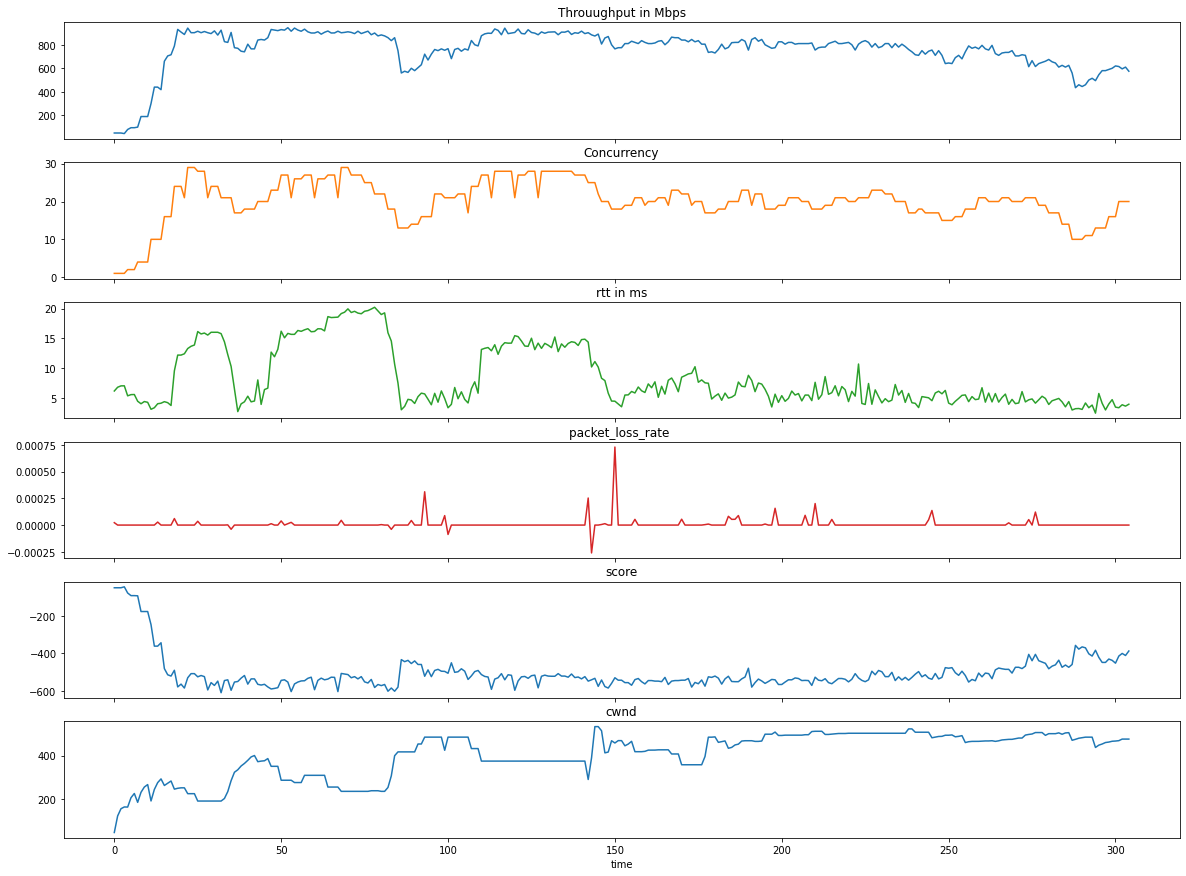

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_14_09_01.csv",sep='\t')
df = pd.DataFrame(data)
df.info()
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        263 non-null    int64  
 1   curr_thrpt        263 non-null    float64
 2   goodput           263 non-null    int64  
 3   cc_level          263 non-null    int64  
 4   cwnd              263 non-null    float64
 5   rtt               263 non-null    float64
 6   packet_loss_rate  263 non-null    float64
 7   score             263 non-null    float64
 8   date_time         263 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 18.6+ KB


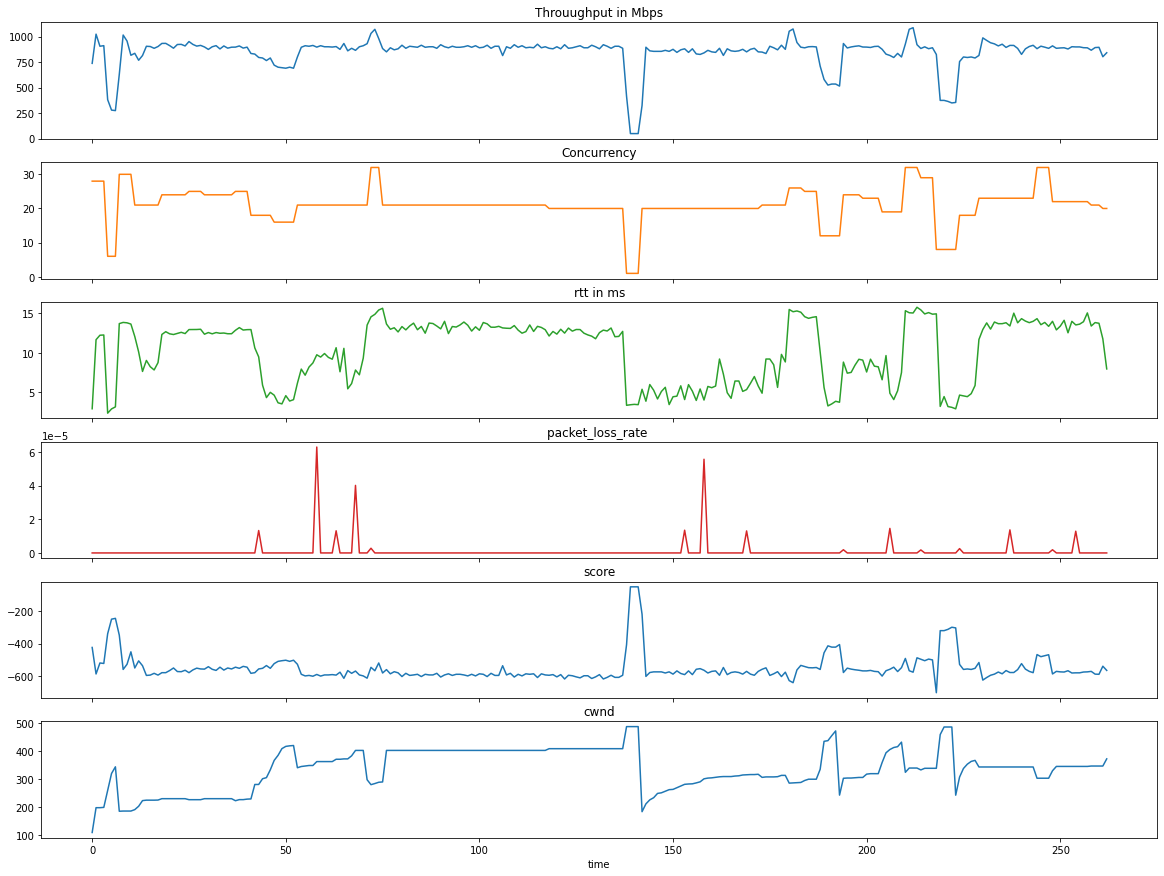

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("record_07_23_2022_14_19_23.csv",sep='\t')
df = pd.DataFrame(data)
df.info()
import matplotlib
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
# matplotlib.rc('xtick', labelsize=12) 
# matplotlib.rc('ytick', labelsize=12) 
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')
# ax.xaxis.set_tick_params(labelsize=20)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        371 non-null    int64  
 1   curr_thrpt        371 non-null    float64
 2   goodput           371 non-null    int64  
 3   cc_level          371 non-null    int64  
 4   cwnd              371 non-null    float64
 5   rtt               371 non-null    float64
 6   packet_loss_rate  371 non-null    float64
 7   score             371 non-null    float64
 8   date_time         371 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 26.2+ KB


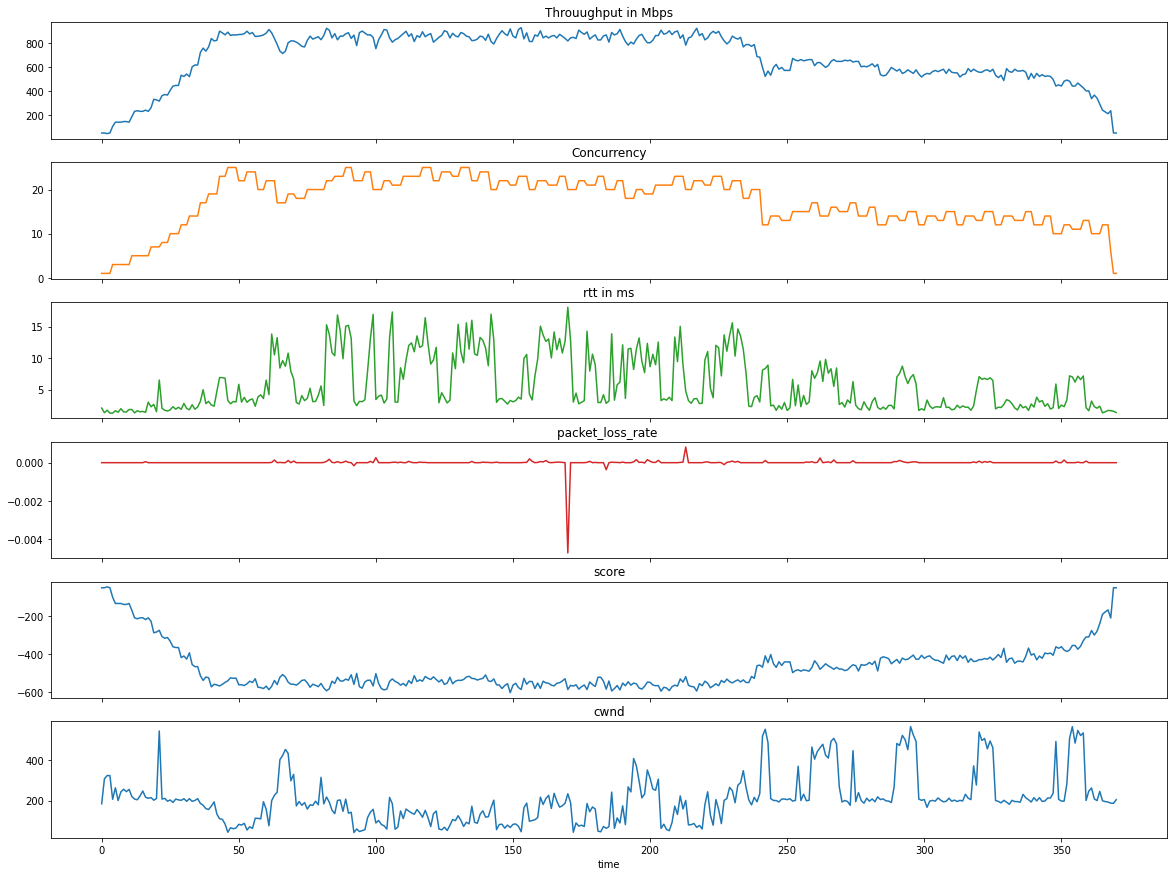

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_14_31_40.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        348 non-null    int64  
 1   curr_thrpt        348 non-null    float64
 2   goodput           348 non-null    int64  
 3   cc_level          348 non-null    int64  
 4   cwnd              348 non-null    float64
 5   rtt               348 non-null    float64
 6   packet_loss_rate  348 non-null    float64
 7   score             348 non-null    float64
 8   date_time         348 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 24.6+ KB


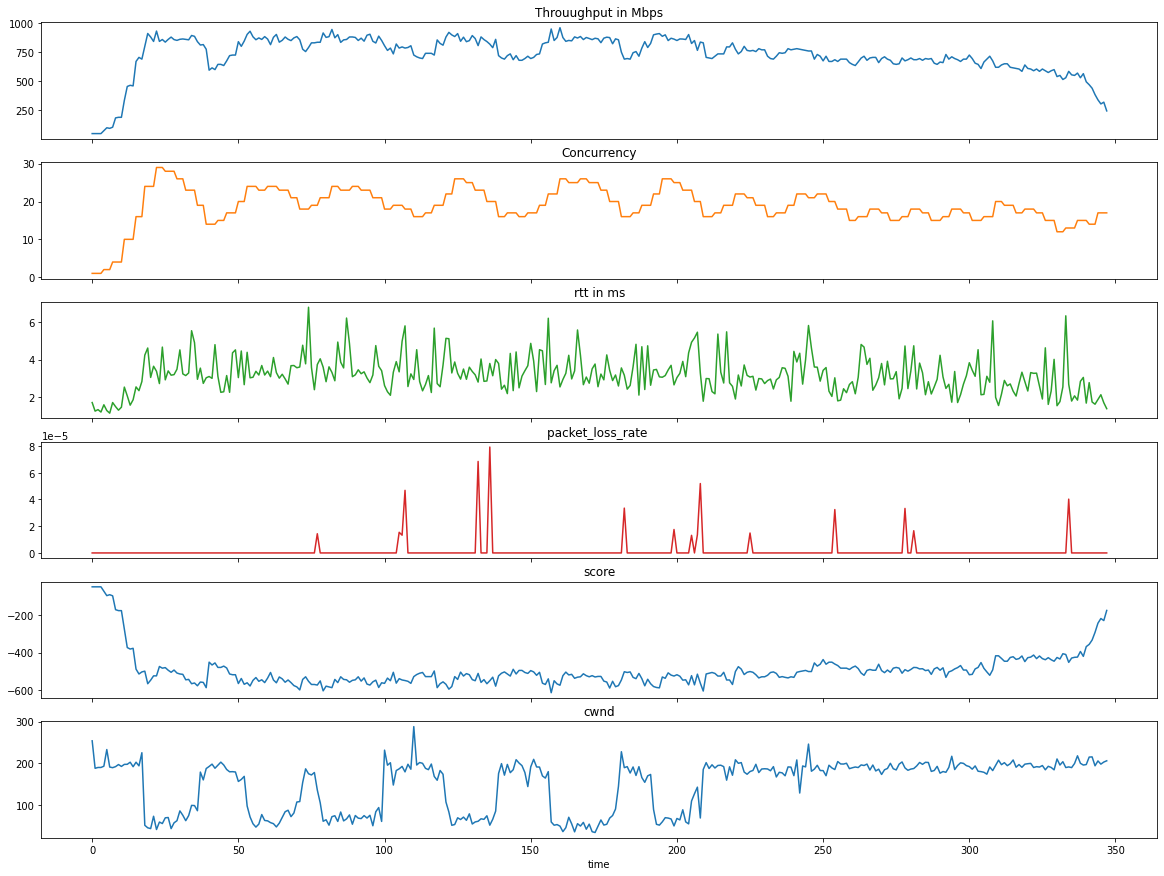

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_14_46_11.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        373 non-null    int64  
 1   curr_thrpt        373 non-null    float64
 2   goodput           373 non-null    int64  
 3   cc_level          373 non-null    int64  
 4   cwnd              373 non-null    float64
 5   rtt               373 non-null    float64
 6   packet_loss_rate  373 non-null    float64
 7   score             373 non-null    float64
 8   date_time         373 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 26.4+ KB


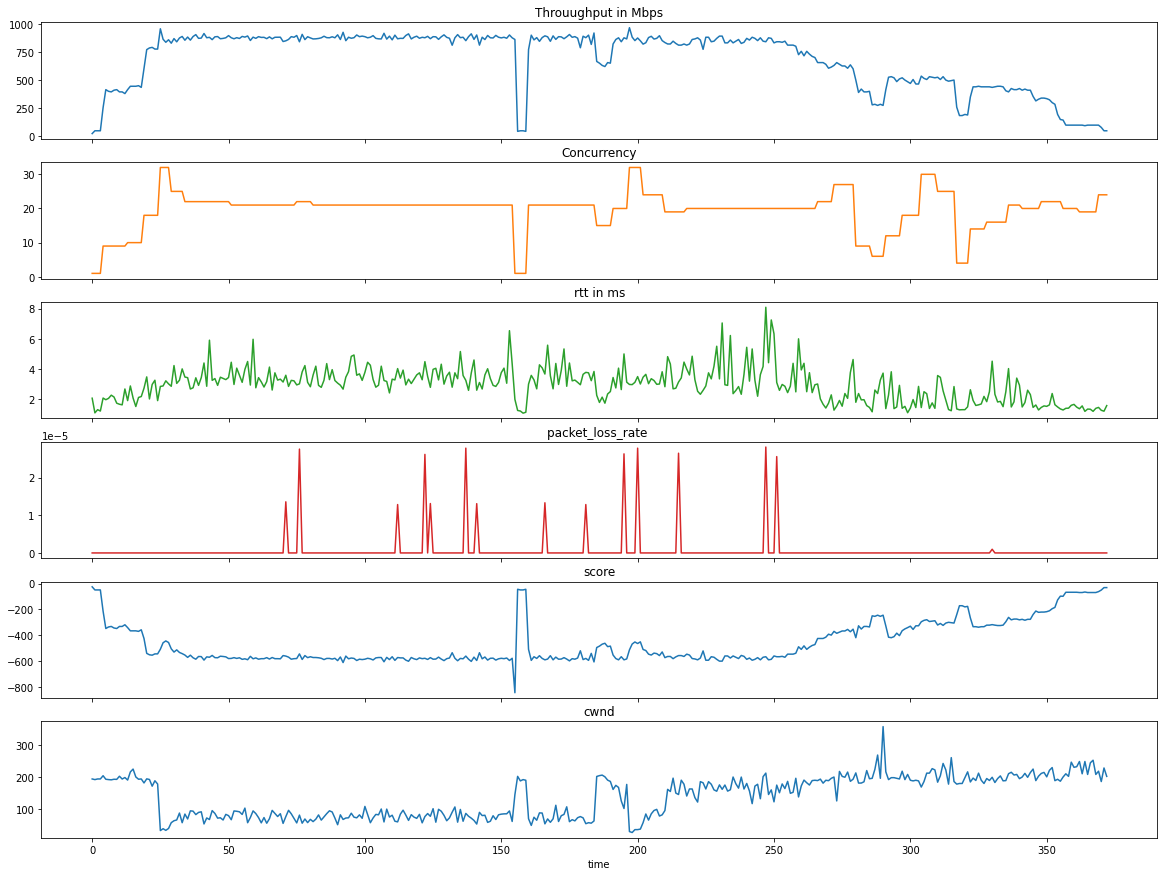

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_14_53_29.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        385 non-null    int64  
 1   curr_thrpt        385 non-null    float64
 2   goodput           385 non-null    int64  
 3   cc_level          385 non-null    int64  
 4   cwnd              385 non-null    float64
 5   rtt               385 non-null    float64
 6   packet_loss_rate  385 non-null    float64
 7   score             385 non-null    float64
 8   date_time         385 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.2+ KB


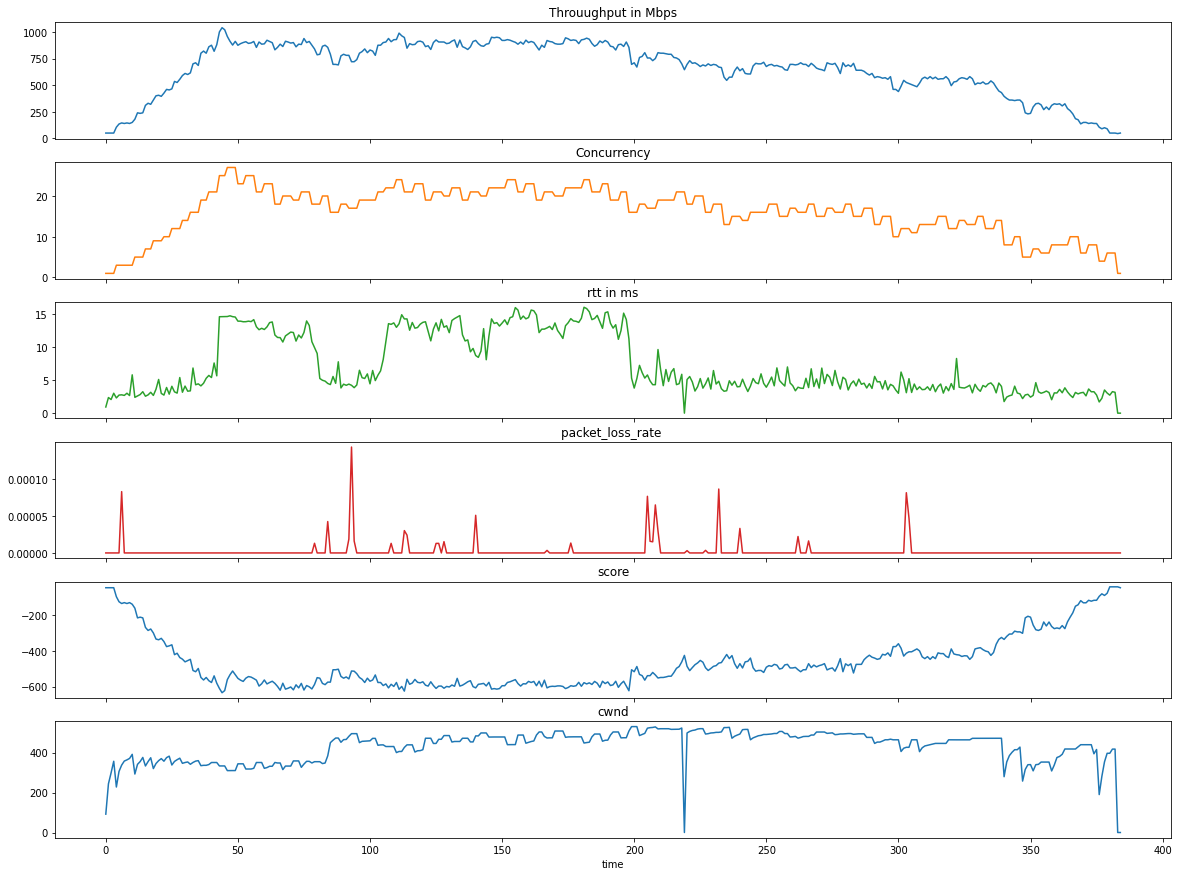

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_17_05_14.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        341 non-null    int64  
 1   curr_thrpt        341 non-null    float64
 2   goodput           341 non-null    int64  
 3   cc_level          341 non-null    int64  
 4   cwnd              341 non-null    float64
 5   rtt               341 non-null    float64
 6   packet_loss_rate  341 non-null    float64
 7   score             341 non-null    float64
 8   date_time         341 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 24.1+ KB


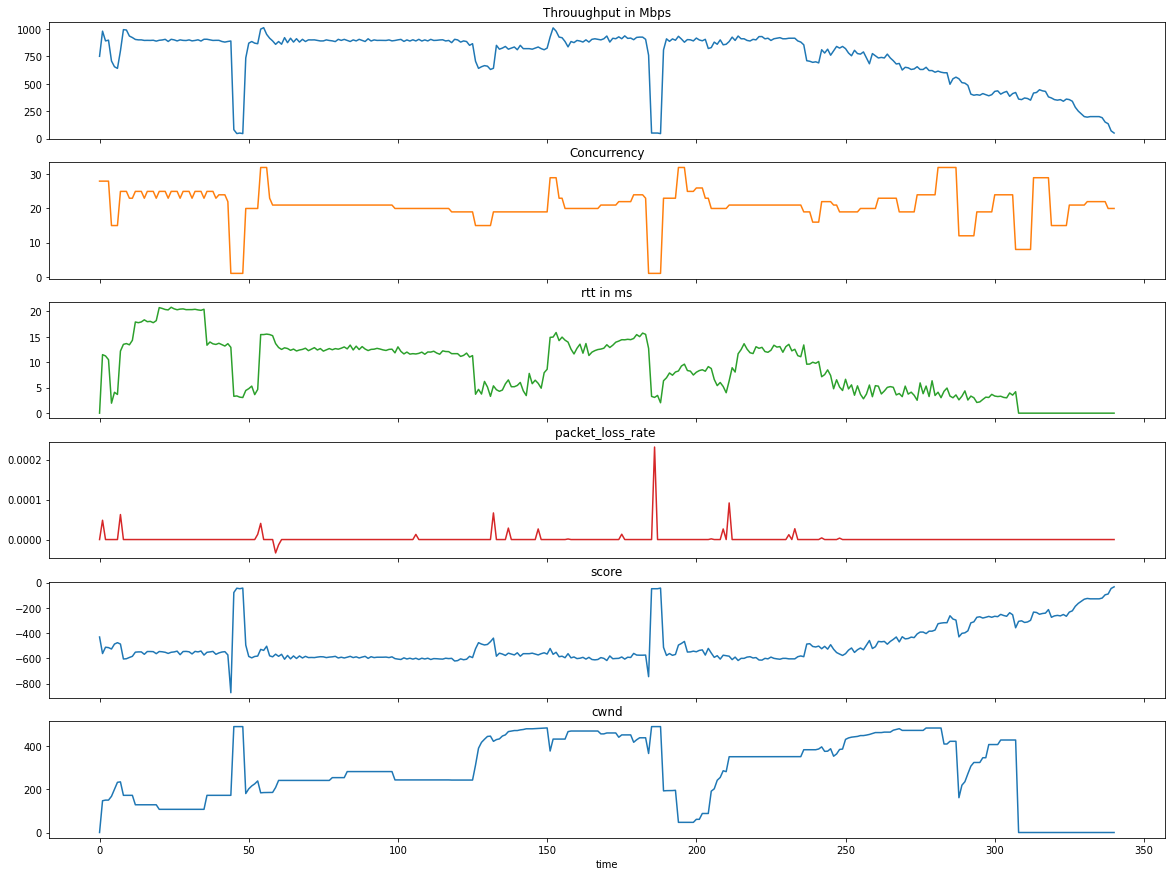

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_17_13_55.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        370 non-null    int64  
 1   curr_thrpt        370 non-null    float64
 2   goodput           370 non-null    int64  
 3   cc_level          370 non-null    int64  
 4   cwnd              370 non-null    float64
 5   rtt               370 non-null    float64
 6   packet_loss_rate  370 non-null    float64
 7   score             370 non-null    float64
 8   date_time         370 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 26.1+ KB


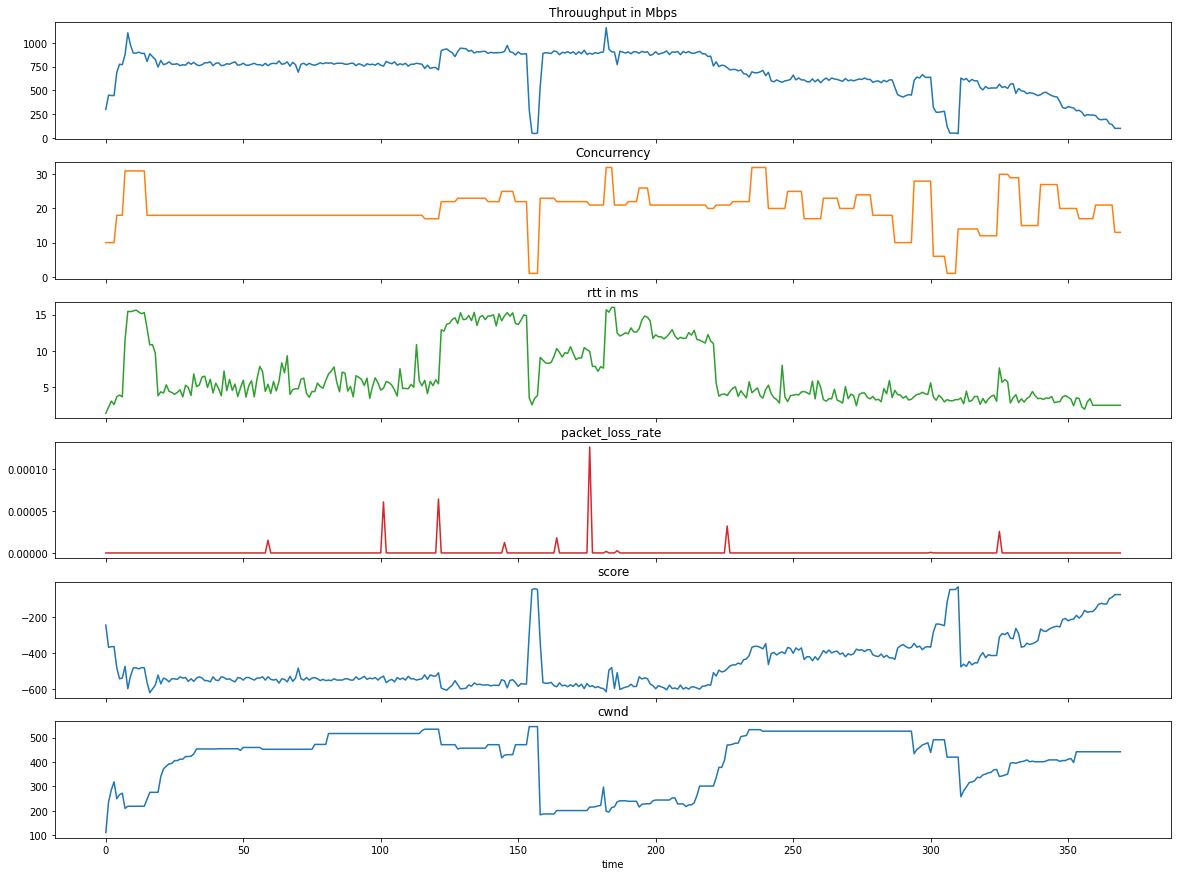

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_18_00_43.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        352 non-null    int64  
 1   curr_thrpt        352 non-null    float64
 2   goodput           352 non-null    int64  
 3   cc_level          352 non-null    int64  
 4   cwnd              352 non-null    float64
 5   rtt               352 non-null    float64
 6   packet_loss_rate  352 non-null    float64
 7   score             352 non-null    float64
 8   date_time         352 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 24.9+ KB


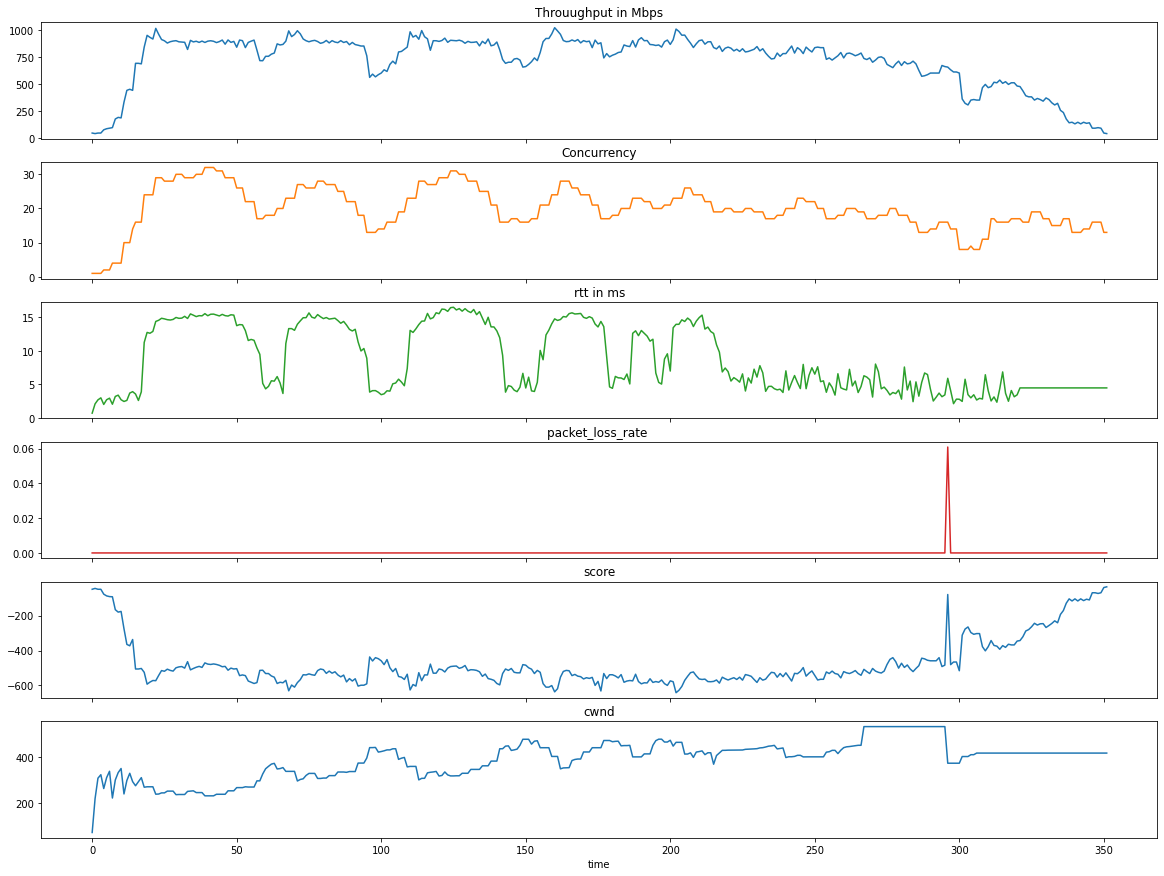

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_18_17_07.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        394 non-null    int64  
 1   curr_thrpt        394 non-null    float64
 2   goodput           394 non-null    int64  
 3   cc_level          394 non-null    int64  
 4   cwnd              394 non-null    float64
 5   rtt               394 non-null    float64
 6   packet_loss_rate  394 non-null    float64
 7   score             394 non-null    float64
 8   date_time         394 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.8+ KB


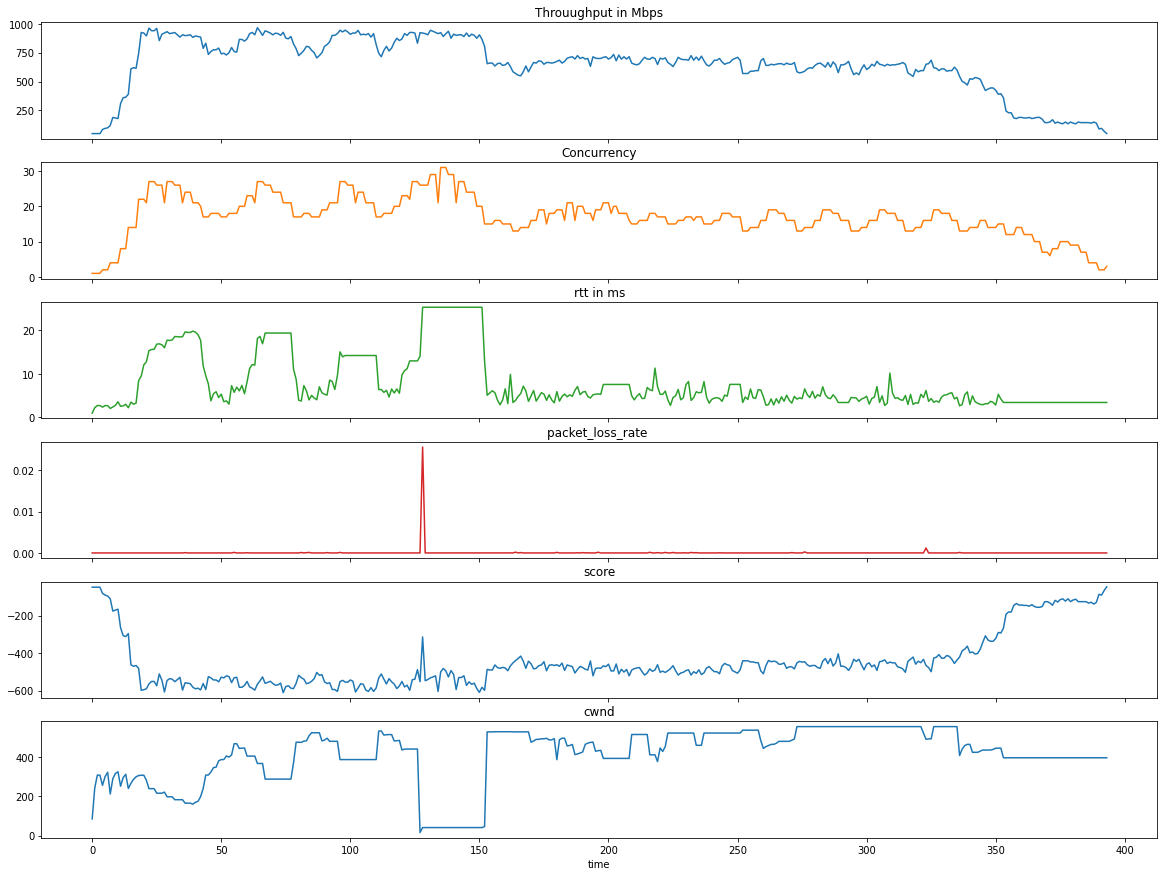

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_18_30_00.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        322 non-null    int64  
 1   curr_thrpt        322 non-null    float64
 2   goodput           322 non-null    int64  
 3   cc_level          322 non-null    int64  
 4   cwnd              322 non-null    float64
 5   rtt               322 non-null    float64
 6   packet_loss_rate  322 non-null    float64
 7   score             322 non-null    float64
 8   date_time         322 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 22.8+ KB


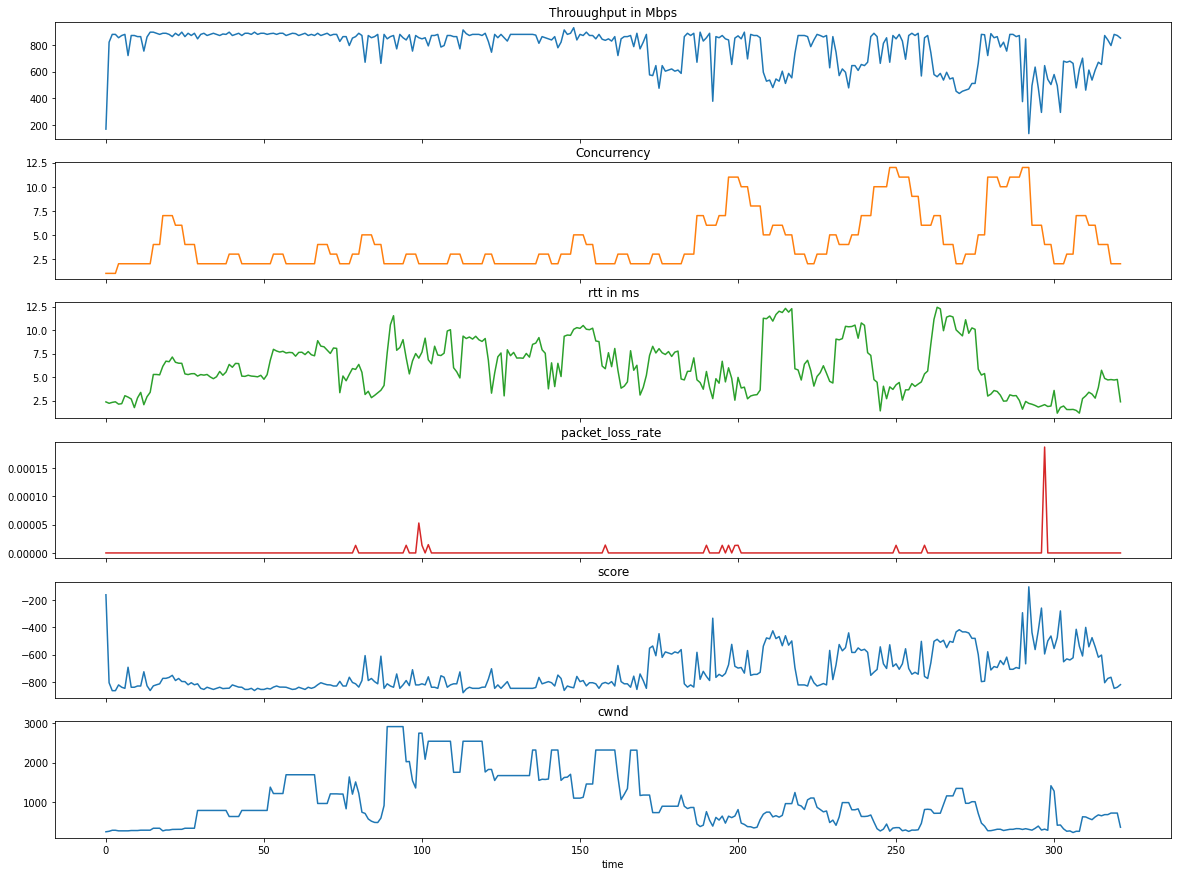

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_18_50_59.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        358 non-null    int64  
 1   curr_thrpt        358 non-null    float64
 2   goodput           358 non-null    int64  
 3   cc_level          358 non-null    int64  
 4   cwnd              358 non-null    float64
 5   rtt               358 non-null    float64
 6   packet_loss_rate  358 non-null    float64
 7   score             358 non-null    float64
 8   date_time         358 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 25.3+ KB


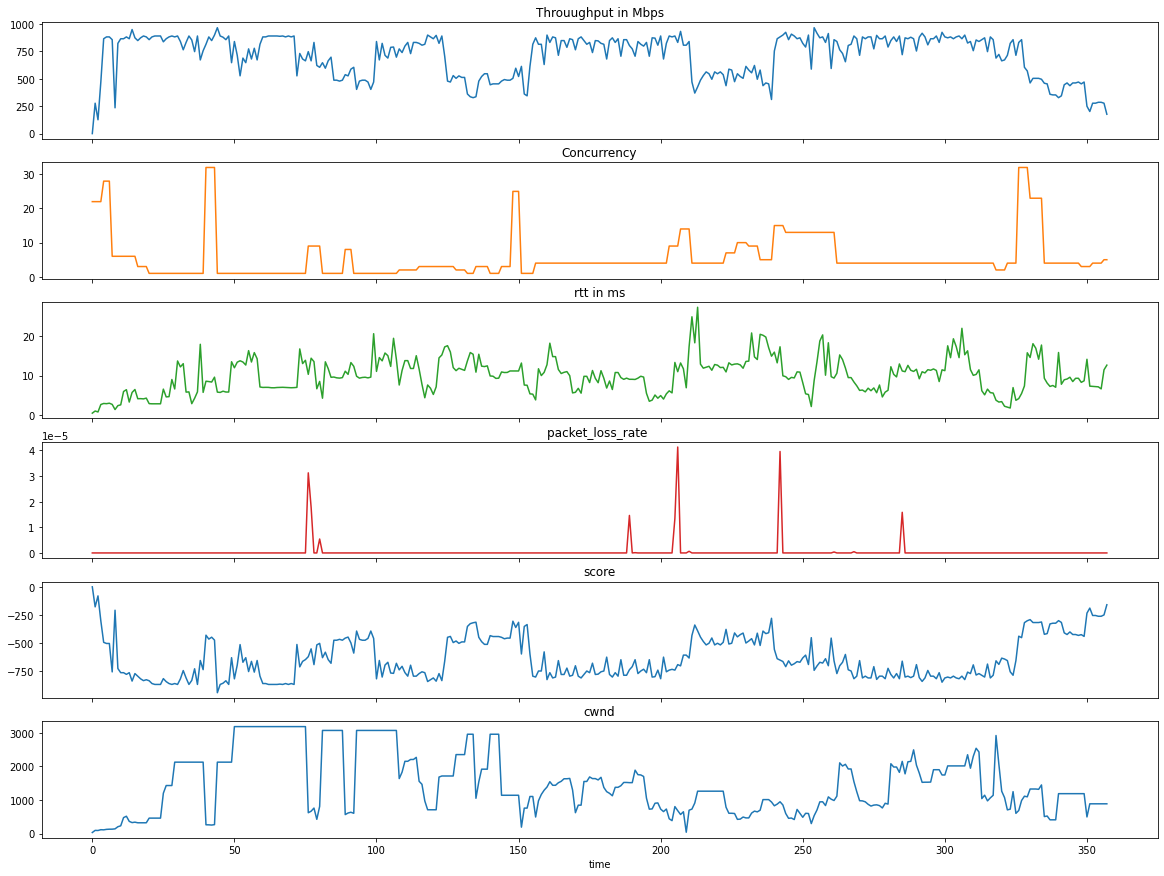

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_07_23_2022_18_59_28.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        374 non-null    int64  
 1   curr_thrpt        374 non-null    float64
 2   goodput           374 non-null    int64  
 3   cc_level          374 non-null    int64  
 4   cwnd              374 non-null    float64
 5   rtt               374 non-null    float64
 6   packet_loss_rate  374 non-null    float64
 7   score             374 non-null    float64
 8   date_time         374 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 26.4+ KB


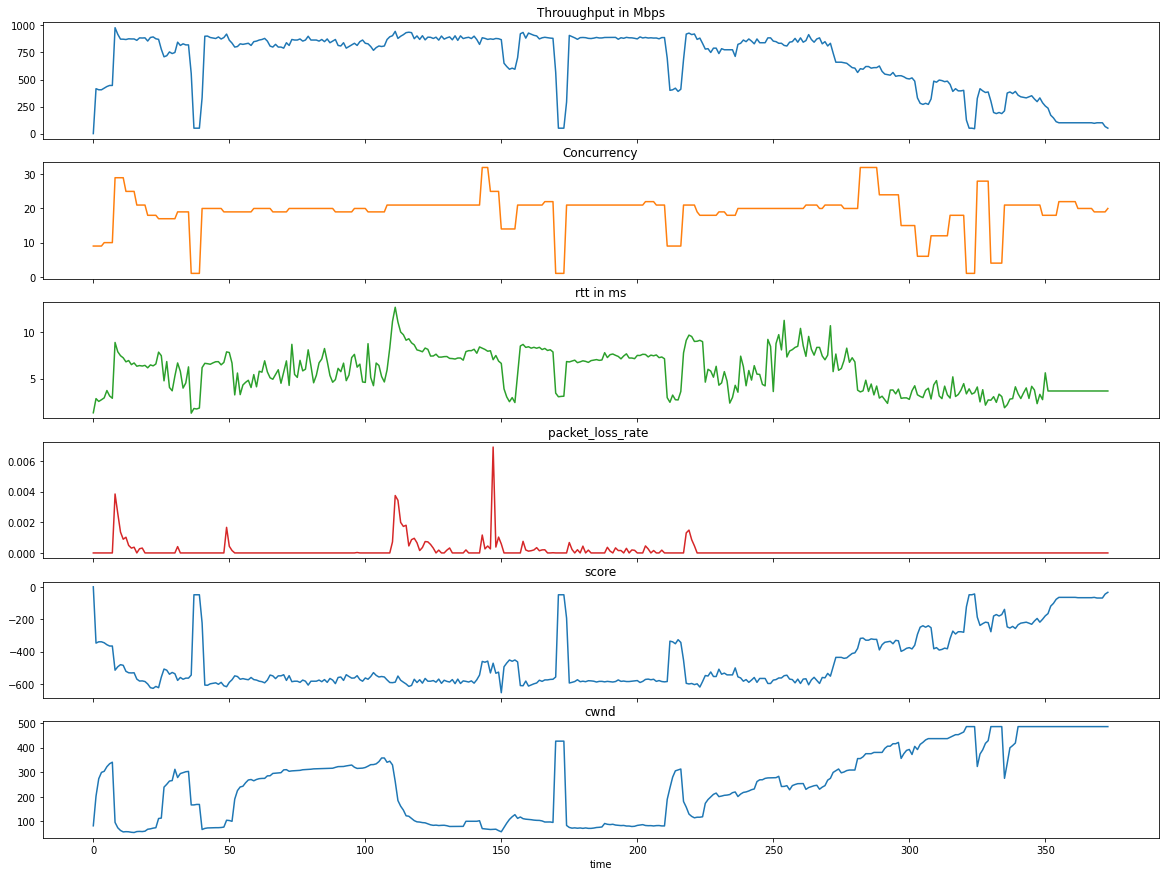

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_07_25_2022_11_59_39.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        506 non-null    int64  
 1   curr_thrpt        506 non-null    float64
 2   goodput           506 non-null    int64  
 3   cc_level          506 non-null    int64  
 4   cwnd              506 non-null    float64
 5   rtt               506 non-null    float64
 6   packet_loss_rate  506 non-null    float64
 7   score             506 non-null    float64
 8   date_time         506 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 35.7+ KB


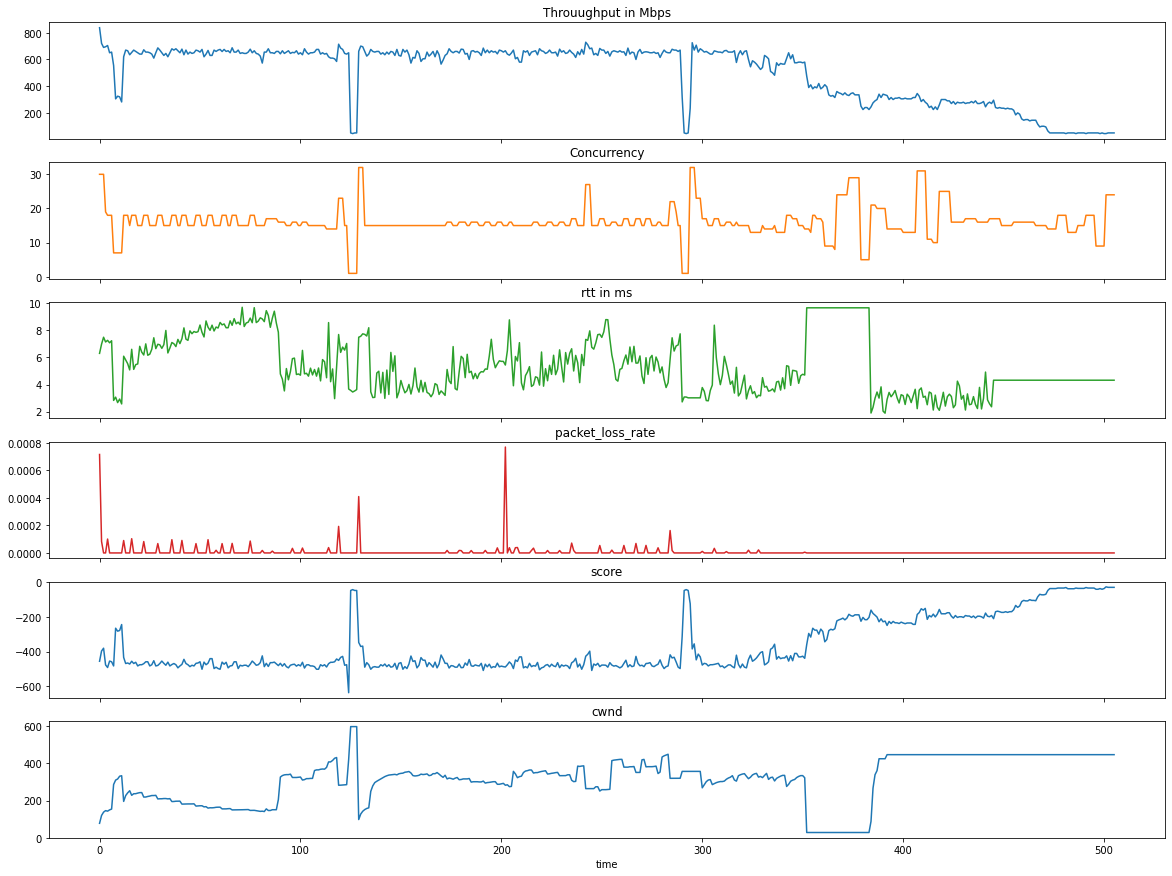

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_07_25_2022_12_27_17.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        417 non-null    int64  
 1   curr_thrpt        417 non-null    float64
 2   goodput           417 non-null    int64  
 3   cc_level          417 non-null    int64  
 4   cwnd              417 non-null    float64
 5   rtt               417 non-null    float64
 6   packet_loss_rate  417 non-null    float64
 7   score             417 non-null    float64
 8   date_time         417 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 29.4+ KB


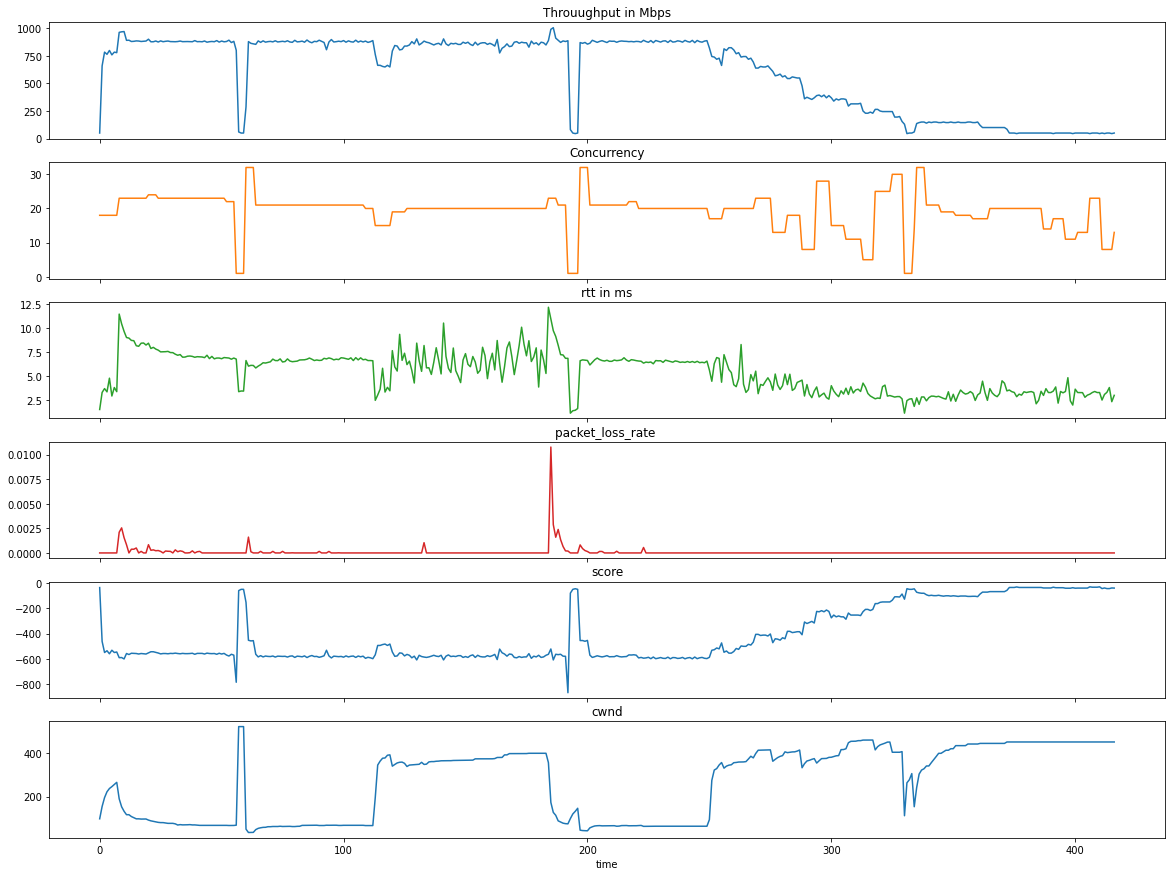

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_07_26_2022_10_59_29.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        386 non-null    int64  
 1   curr_thrpt        386 non-null    float64
 2   goodput           386 non-null    int64  
 3   cc_level          386 non-null    int64  
 4   cwnd              386 non-null    float64
 5   rtt               386 non-null    float64
 6   packet_loss_rate  386 non-null    float64
 7   score             386 non-null    float64
 8   date_time         386 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.3+ KB


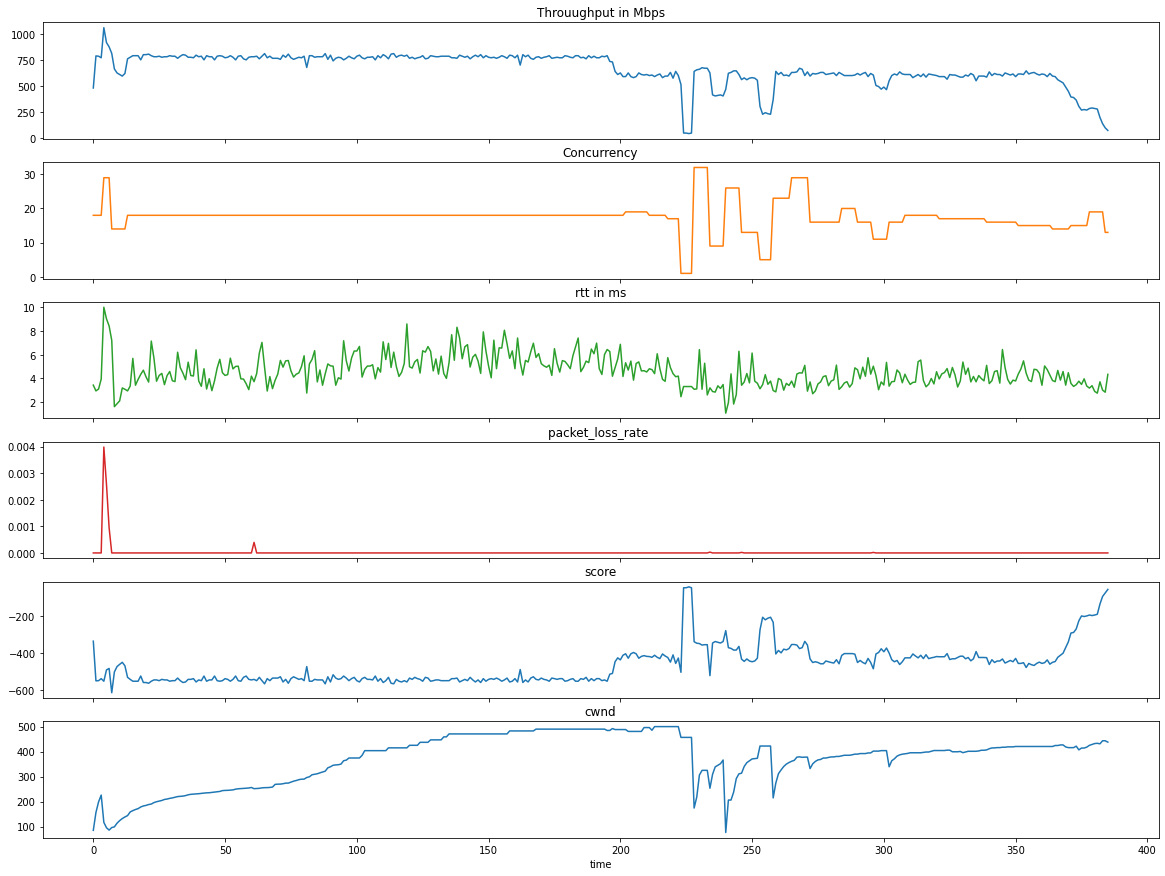

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_07_26_2022_11_06_12.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        406 non-null    int64  
 1   curr_thrpt        406 non-null    float64
 2   cc_level          406 non-null    int64  
 3   cwnd              406 non-null    float64
 4   rtt               406 non-null    float64
 5   packet_loss_rate  406 non-null    float64
 6   score             406 non-null    float64
 7   date_time         406 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 25.5+ KB


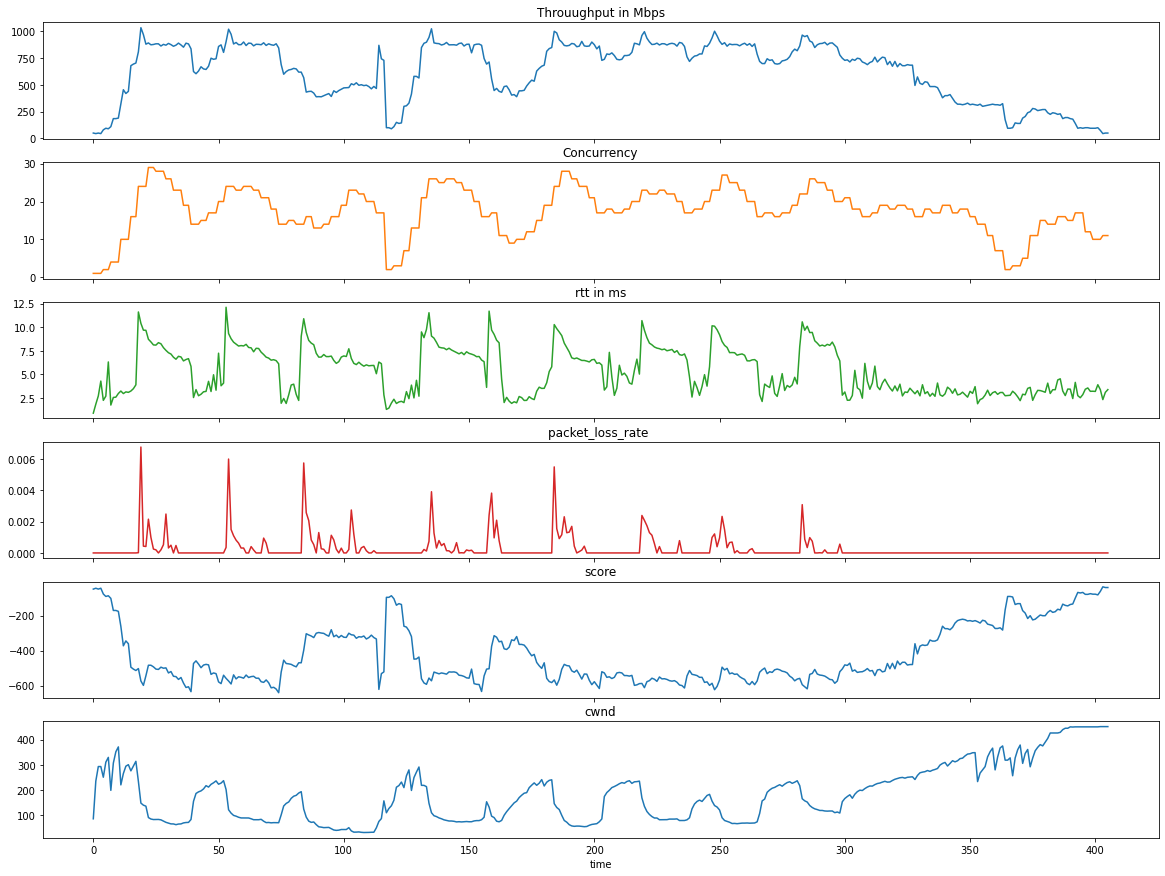

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_07_29_2022_14_52_25.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        383 non-null    int64  
 1   curr_thrpt        383 non-null    float64
 2   cc_level          383 non-null    int64  
 3   cwnd              383 non-null    float64
 4   rtt               383 non-null    float64
 5   packet_loss_rate  383 non-null    float64
 6   score             383 non-null    float64
 7   date_time         383 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 24.1+ KB


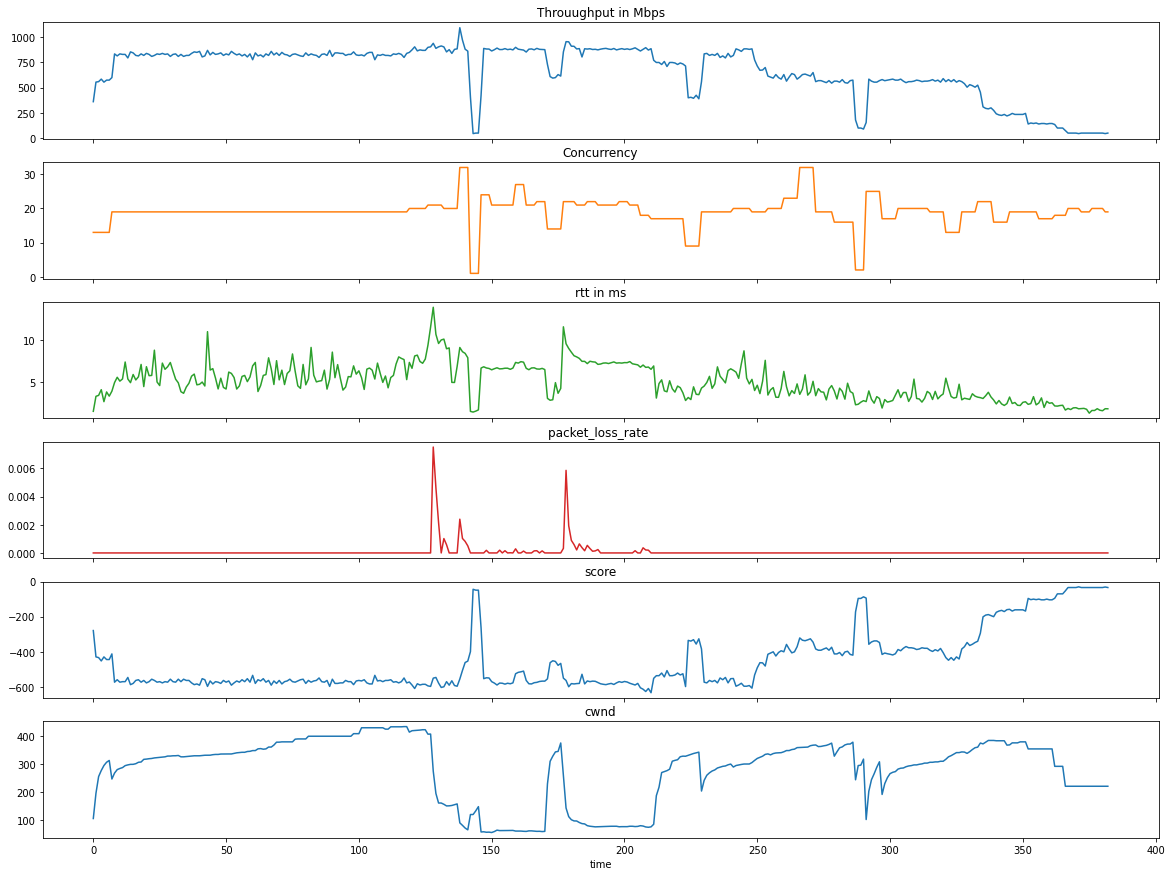

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_07_29_2022_13_54_54.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   curr_thrpt        1080 non-null   float64
 1   cc_level          1080 non-null   int64  
 2   cwnd              1080 non-null   float64
 3   rtt               1080 non-null   float64
 4   packet_loss_rate  1080 non-null   float64
 5   score             1080 non-null   float64
 6   date_time         1080 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 59.2+ KB


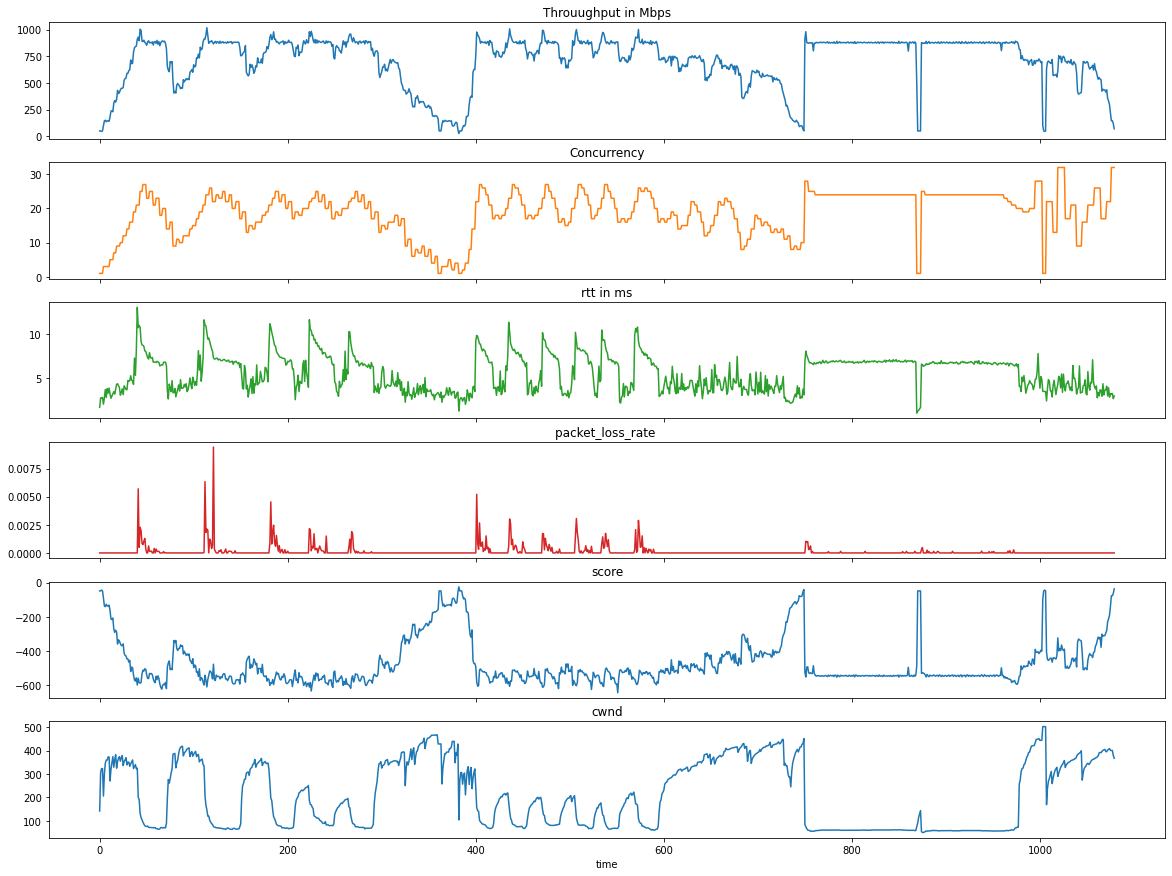

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_08_03_2022_13_57_55.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   curr_thrpt        1129 non-null   float64
 1   cc_level          1129 non-null   int64  
 2   cwnd              1129 non-null   float64
 3   rtt               1129 non-null   float64
 4   packet_loss_rate  1129 non-null   float64
 5   score             1129 non-null   float64
 6   date_time         1129 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 61.9+ KB


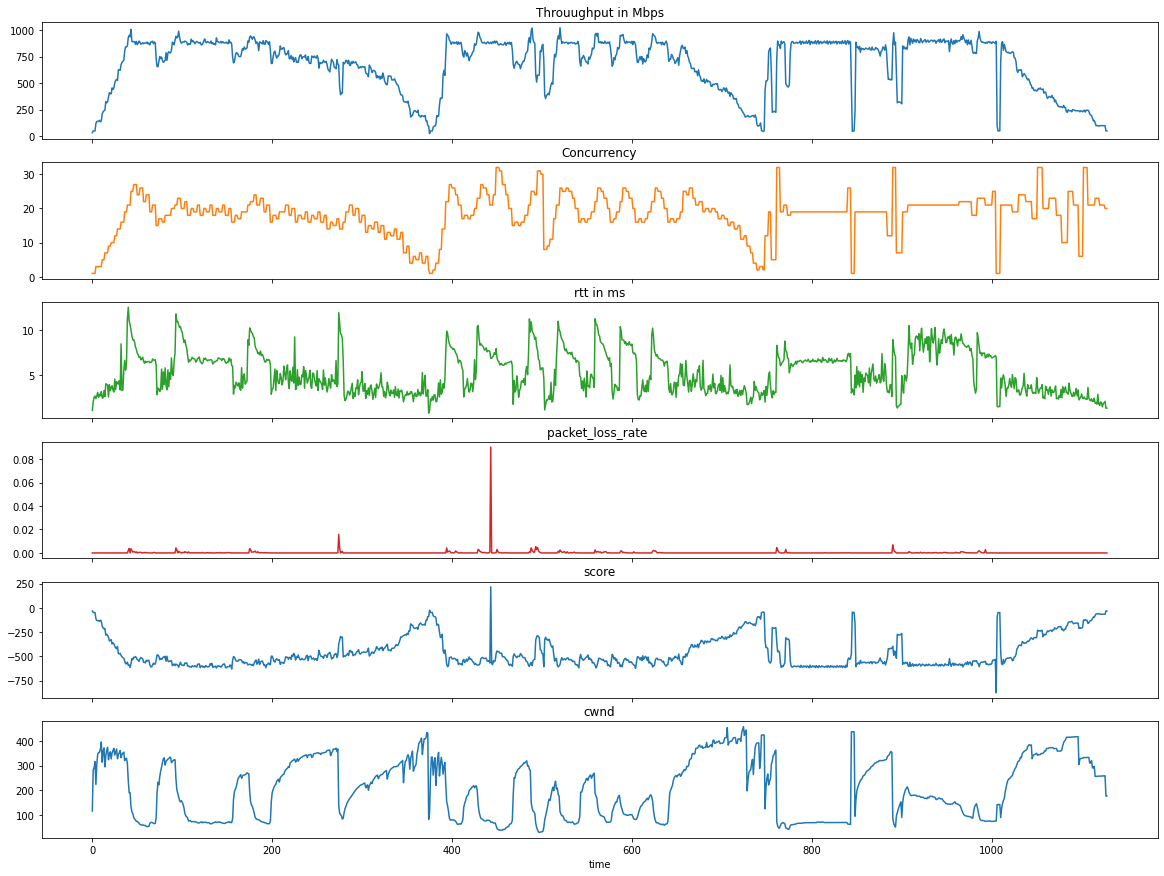

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
data = pd.read_csv("record_07_29_2022_15_55_08.csv",sep='\t')
df = pd.DataFrame(data)
df.info()

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

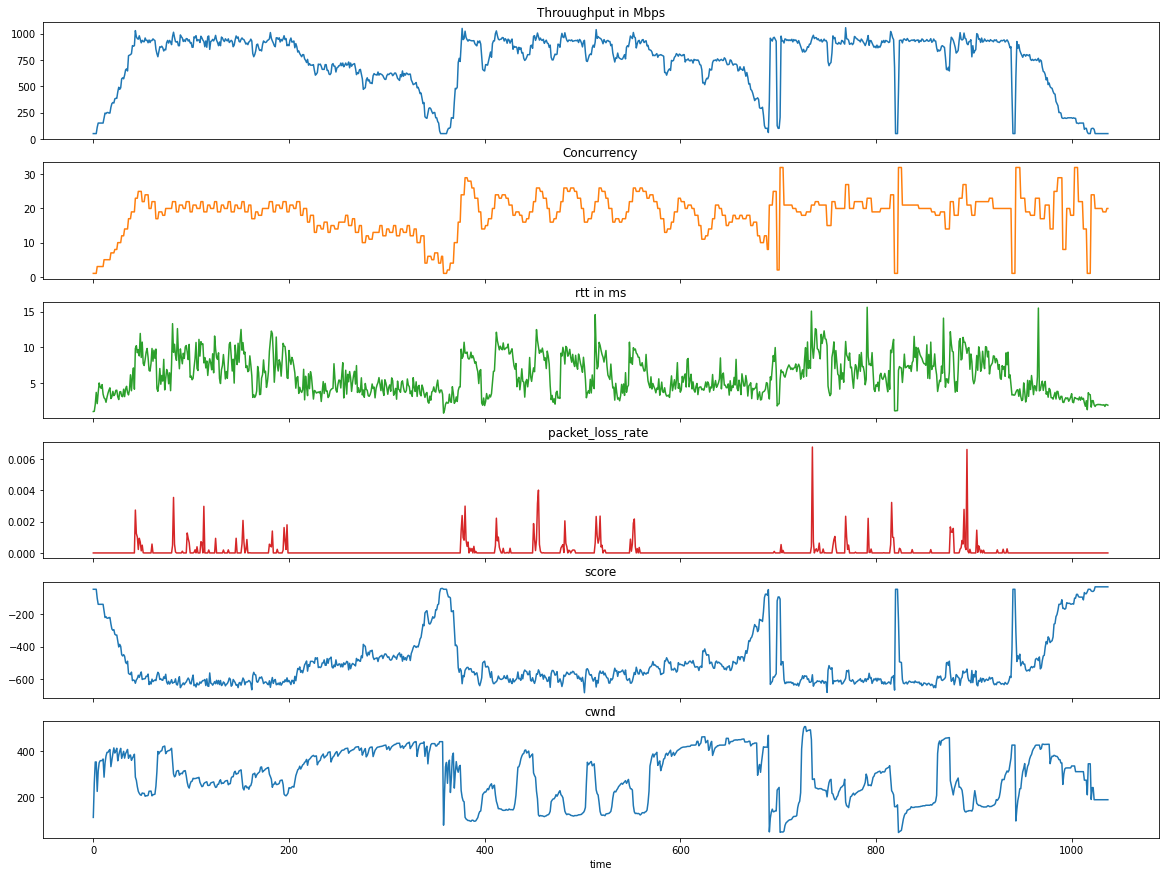

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_04_2022_13_03_18.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

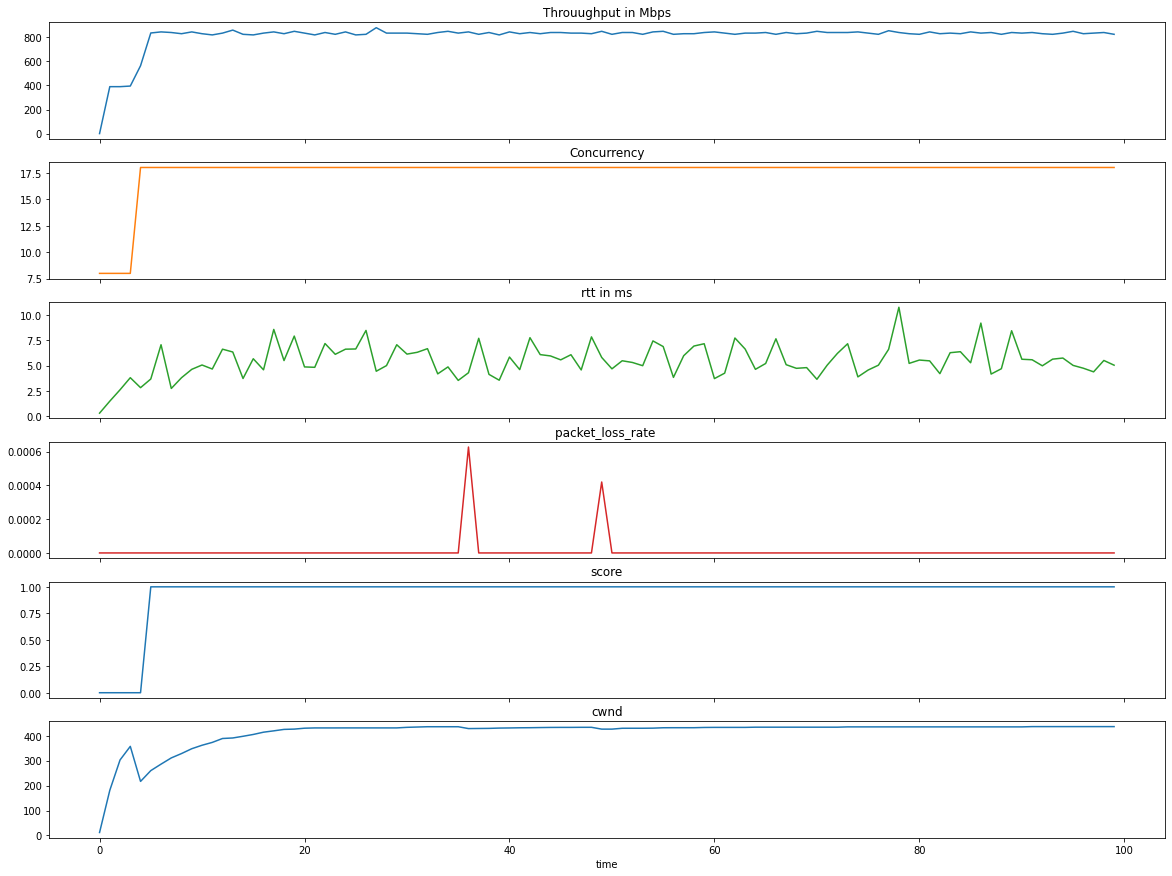

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_06_2022_13_09_17.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

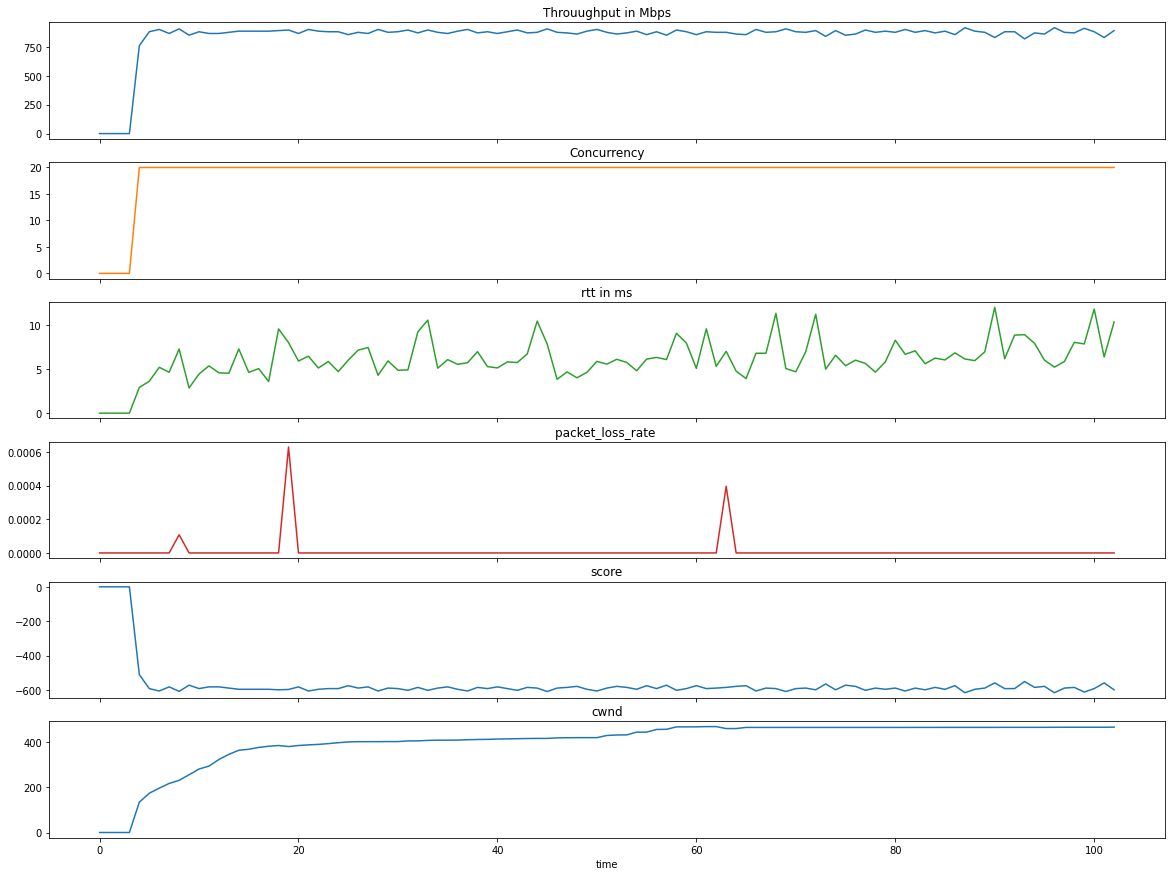

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_06_2022_14_41_12.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

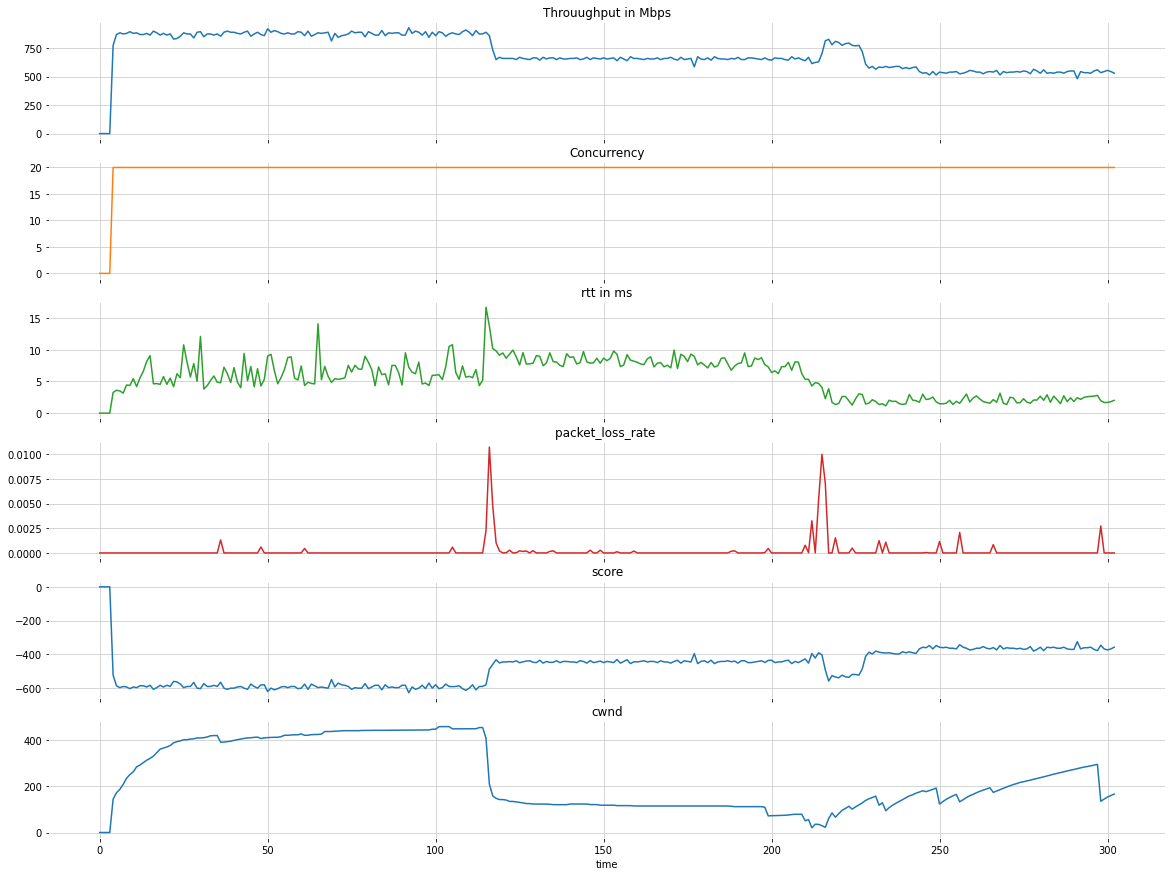

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_09_2022_12_37_33.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

In [10]:
import argparse
import gym
import pybullet_envs

from lib import model

import numpy as np
import torch
import os
import time
import socket
import datetime
import numpy as np
import logging as log
import multiprocessing as mp
import pandas as pd
import re
from config import configurations
from transferClass import *
from transferEnv import *
from optimizer_gd import *

log_FORMAT = '%(created)f -- %(levelname)s: %(message)s'
log_file = "logs/" + datetime.datetime.now().strftime("%m_%d_%Y_%H_%M_%S") + ".log"

if configurations["loglevel"] == "debug":
  log.basicConfig(
      format=log_FORMAT,
      datefmt='%m/%d/%Y %I:%M:%S %p',
      level=log.DEBUG,
      handlers=[
          log.FileHandler(log_file),
          log.StreamHandler()
      ]
    )
  mp.log_to_stderr(log.info)

else:
  log.basicConfig(
      format=log_FORMAT,
      datefmt='%m/%d/%Y %I:%M:%S %p',
      level=log.INFO,
      handlers=[
          log.FileHandler(log_file),
          log.StreamHandler()
      ]
  )
configurations["thread_limit"] = configurations["max_cc"]
configurations["cpu_count"] = mp.cpu_count()

In [11]:
transfer=TransferClass_(configurations,log,transfer_emulation=True)
env=transferEnv(transfer)
net = model.DDPGActor(env.observation_space.shape[0], env.action_space.n)
net.load_state_dict(torch.load("/home/hjamil/Documents/file-transfer-optimization-RL/saves/ddpg-ddpg/best_+10000000029.000_370.dat"))
obs = env.reset()
total_reward = 0.0
total_steps = 0
while True:
    obs_v = torch.FloatTensor([obs])
    mu_v = net(obs_v)
    action = mu_v.squeeze(dim=0).data.numpy()
    print("before clipping",action)
    action = np.clip(action, -1, 1)
    print("after clipping",action)
    obs, reward, done, _ = env.step(action)
    total_reward += reward
    total_steps += 1
    if done:
        break
print("In %d steps we got %.3f reward" % (total_steps, total_reward))
env.reset()

1659808549.774162 -- INFO: Changing concurrency to 20 ******
1659808549.779116 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808549.781872 -- INFO: Active CC: 20
1659808549.790544 -- INFO: Start Process :: 4
1659808549.794723 -- INFO: Start Process :: 0
1659808549.791144 -- INFO: Start Process :: 2
1659808549.793734 -- INFO: Start Process :: 8
1659808549.794178 -- INFO: Start Process :: 1
1659808549.809081 -- INFO: starting 5, 4, /home/hjamil/Documents/files_bash/FILE3
1659808549.806334 -- INFO: starting 8, 0, /home/hjamil/Documents/files_bash/FILE25
1659808549.807253 -- INFO: Process 5 get item 4 from queue and executing
1659808549.807394 -- INFO: Process 3 get item 5 from queue and executing
1659808549.790184 -- INFO: Start Process :: 3
1659808549.796670 -- INFO: Start Process :: 6
1659808549.794638 -- INFO: Start Process :: 5
1659808549.792573 -- INFO: Time taken to collect tcp stats: 16.0ms
1659808549.8

before clipping [ 0.9962353  -0.9959262   0.9969881  -0.99602234  0.9931204   0.995091
  0.99404967 -0.9971613   0.99798393 -0.9971317  -0.9970808   0.99335665
  0.99172944  0.9978699  -0.98038954 -0.99246114  0.9939744  -0.9939638
  0.9974793  -0.9971222   0.9980499  -0.9943163   0.99499893  0.99321485
  0.995634   -0.99618685 -0.99166167  0.99543095  0.9941358  -0.9842907
  0.9970724   0.99315244  0.9957302 ]
after clipping [ 0.9962353  -0.9959262   0.9969881  -0.99602234  0.9931204   0.995091
  0.99404967 -0.9971613   0.99798393 -0.9971317  -0.9970808   0.99335665
  0.99172944  0.9978699  -0.98038954 -0.99246114  0.9939744  -0.9939638
  0.9974793  -0.9971222   0.9980499  -0.9943163   0.99499893  0.99321485
  0.995634   -0.99618685 -0.99166167  0.99543095  0.9941358  -0.9842907
  0.9970724   0.99315244  0.9957302 ]


1659808549.990543 -- INFO: Process 6 get item 7 from queue and executing
1659808549.991419 -- INFO: Process 9 get item 8 from queue and executing
1659808549.990487 -- INFO: Start Process :: 10
1659808549.991821 -- INFO: Start Process :: 12
1659808550.000209 -- INFO: starting 6, 7, /home/hjamil/Documents/files_bash/FILE20
1659808550.011903 -- INFO: Process 12 get item 10 from queue and executing
1659808550.004260 -- INFO: Process 10 get item 9 from queue and executing
1659808550.014458 -- INFO: starting 12, 10, /home/hjamil/Documents/files_bash/FILE31
1659808550.015124 -- INFO: Start Process :: 16
1659808550.006797 -- INFO: starting 9, 8, /home/hjamil/Documents/files_bash/FILE29
1659808550.020040 -- INFO: Start Process :: 17
1659808550.022367 -- INFO: Start Process :: 13
1659808550.023759 -- INFO: Start Process :: 19
1659808550.020625 -- INFO: Process 16 get item 11 from queue and executing
1659808550.019628 -- INFO: starting 10, 9, /home/hjamil/Documents/files_bash/FILE7
1659808550.016

before clipping [ 0.9999957  -0.9999947   0.99999636 -0.9999957   0.9999797   0.99999326
  0.9999894  -0.9999972   0.9999982  -0.9999981  -0.9999968   0.9999833
  0.9999739   0.999998   -0.99990875 -0.9999778   0.99998623 -0.99998784
  0.9999978  -0.9999974   0.9999988  -0.9999865   0.99999017  0.99998105
  0.99999285 -0.999995   -0.9999698   0.99999464  0.99998885 -0.9999152
  0.9999973   0.9999804   0.9999951 ]
after clipping [ 0.9999957  -0.9999947   0.99999636 -0.9999957   0.9999797   0.99999326
  0.9999894  -0.9999972   0.9999982  -0.9999981  -0.9999968   0.9999833
  0.9999739   0.999998   -0.99990875 -0.9999778   0.99998623 -0.99998784
  0.9999978  -0.9999974   0.9999988  -0.9999865   0.99999017  0.99998105
  0.99999285 -0.999995   -0.9999698   0.99999464  0.99998885 -0.9999152
  0.9999973   0.9999804   0.9999951 ]


1659808553.829050 -- INFO: Time taken to collect tcp stats: 55.0ms
1659808553.864237 -- INFO: Throughput @4.1s:930.0Mbps, rtt :5.64ms cwnd: 188.0 lossRate: 0.0 CC:20 score:1.0 
1659808554.817276 -- INFO: Time taken to collect tcp stats: 41.0ms
1659808554.852523 -- INFO: Throughput @5.1s:920.0Mbps, rtt :4.97ms cwnd: 196.8 lossRate: 0.0 CC:20 score:1.0 
1659808555.869071 -- INFO: Time taken to collect tcp stats: 93.0ms
1659808555.904078 -- INFO: Throughput @6.1s:930.0Mbps, rtt :4.88ms cwnd: 211.1 lossRate: 0.0 CC:20 score:1.0 
1659808556.836302 -- INFO: Time taken to collect tcp stats: 60.0ms
1659808556.859904 -- INFO: Throughput @7.1s:925.0Mbps, rtt :5.82ms cwnd: 218.1 lossRate: 0.0 CC:20 score:1.0 
1659808556.904565 -- INFO: Changing concurrency to 20 ******
1659808556.915410 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808556.916550 -- INFO: Active CC: 20


before clipping [ 0.9999974  -0.9999967   0.99999785 -0.9999974   0.9999866   0.9999958
  0.99999326 -0.99999833  0.9999989  -0.99999887 -0.99999803  0.9999891
  0.99998295  0.99999875 -0.99993736 -0.99998564  0.9999913  -0.9999923
  0.9999987  -0.99999845  0.9999993  -0.9999914   0.99999374  0.99998784
  0.9999955  -0.99999696 -0.99998015  0.9999967   0.999993   -0.9999412
  0.9999984   0.9999871   0.99999696]
after clipping [ 0.9999974  -0.9999967   0.99999785 -0.9999974   0.9999866   0.9999958
  0.99999326 -0.99999833  0.9999989  -0.99999887 -0.99999803  0.9999891
  0.99998295  0.99999875 -0.99993736 -0.99998564  0.9999913  -0.9999923
  0.9999987  -0.99999845  0.9999993  -0.9999914   0.99999374  0.99998784
  0.9999955  -0.99999696 -0.99998015  0.9999967   0.999993   -0.9999412
  0.9999984   0.9999871   0.99999696]


1659808557.821137 -- INFO: Time taken to collect tcp stats: 43.0ms
1659808557.844079 -- INFO: Throughput @8.1s:930.0Mbps, rtt :5.29ms cwnd: 223.2 lossRate: 0.0 CC:20 score:1.0 
1659808558.804876 -- INFO: Time taken to collect tcp stats: 26.0ms
1659808558.816563 -- INFO: Throughput @9.1s:925.0Mbps, rtt :6.21ms cwnd: 238.4 lossRate: 0.0 CC:20 score:1.0 
1659808559.845236 -- INFO: Time taken to collect tcp stats: 65.0ms
1659808559.880125 -- INFO: Throughput @10.1s:910.0Mbps, rtt :9.48ms cwnd: 243.6 lossRate: 0.0 CC:20 score:1.0 
1659808560.459936 -- INFO: Changing concurrency to 20 ******
1659808560.473078 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808560.487765 -- INFO: Active CC: 20


before clipping [ 0.99999785 -0.9999974   0.9999983  -0.99999785  0.99998873  0.99999654
  0.99999434 -0.9999986   0.99999917 -0.9999991  -0.9999984   0.9999908
  0.99998575  0.999999   -0.99994653 -0.999988    0.9999928  -0.9999936
  0.9999989  -0.99999875  0.99999946 -0.99999297  0.9999949   0.99999
  0.9999964  -0.99999756 -0.99998325  0.9999973   0.9999943  -0.9999495
  0.9999987   0.9999893   0.9999975 ]
after clipping [ 0.99999785 -0.9999974   0.9999983  -0.99999785  0.99998873  0.99999654
  0.99999434 -0.9999986   0.99999917 -0.9999991  -0.9999984   0.9999908
  0.99998575  0.999999   -0.99994653 -0.999988    0.9999928  -0.9999936
  0.9999989  -0.99999875  0.99999946 -0.99999297  0.9999949   0.99999
  0.9999964  -0.99999756 -0.99998325  0.9999973   0.9999943  -0.9999495
  0.9999987   0.9999893   0.9999975 ]


1659808560.861163 -- INFO: Time taken to collect tcp stats: 81.0ms
1659808560.888286 -- INFO: Throughput @11.1s:920.0Mbps, rtt :5.87ms cwnd: 249.2 lossRate: 0.0 CC:20 score:1.0 
1659808561.833591 -- INFO: Time taken to collect tcp stats: 53.0ms
1659808561.864025 -- INFO: Throughput @12.1s:910.0Mbps, rtt :4.59ms cwnd: 254.2 lossRate: 0.0 CC:20 score:1.0 
1659808562.857069 -- INFO: Time taken to collect tcp stats: 75.0ms
1659808562.880158 -- INFO: Throughput @13.1s:930.0Mbps, rtt :5.49ms cwnd: 264.8 lossRate: 0.0 CC:20 score:1.0 
1659808563.837071 -- INFO: Time taken to collect tcp stats: 54.0ms
1659808563.868068 -- INFO: Throughput @14.1s:915.0Mbps, rtt :6.65ms cwnd: 273.6 lossRate: 0.0 CC:20 score:1.0 
1659808564.036323 -- INFO: Changing concurrency to 20 ******
1659808564.051456 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808564.063501 -- INFO: Active CC: 20


before clipping [ 0.99999803 -0.99999756  0.99999845 -0.99999803  0.99998957  0.9999968
  0.99999475 -0.99999875  0.9999992  -0.99999917 -0.99999857  0.9999915
  0.9999868   0.9999991  -0.9999497  -0.9999889   0.9999933  -0.99999416
  0.99999905 -0.99999887  0.9999995  -0.9999935   0.9999953   0.9999907
  0.9999967  -0.99999774 -0.99998444  0.99999756  0.9999947  -0.9999527
  0.9999988   0.99999005  0.99999774]
after clipping [ 0.99999803 -0.99999756  0.99999845 -0.99999803  0.99998957  0.9999968
  0.99999475 -0.99999875  0.9999992  -0.99999917 -0.99999857  0.9999915
  0.9999868   0.9999991  -0.9999497  -0.9999889   0.9999933  -0.99999416
  0.99999905 -0.99999887  0.9999995  -0.9999935   0.9999953   0.9999907
  0.9999967  -0.99999774 -0.99998444  0.99999756  0.9999947  -0.9999527
  0.9999988   0.99999005  0.99999774]


1659808564.832587 -- INFO: Time taken to collect tcp stats: 41.0ms
1659808564.849771 -- INFO: Throughput @15.1s:920.0Mbps, rtt :6.13ms cwnd: 278.6 lossRate: 0.0 CC:20 score:1.0 
1659808565.868872 -- INFO: Time taken to collect tcp stats: 85.0ms
1659808565.905079 -- INFO: Throughput @16.1s:925.0Mbps, rtt :9.79ms cwnd: 281.4 lossRate: 0.0 CC:20 score:1.0 
1659808566.853191 -- INFO: Time taken to collect tcp stats: 69.0ms
1659808566.892602 -- INFO: Throughput @17.1s:940.0Mbps, rtt :5.75ms cwnd: 296.2 lossRate: 0.0 CC:20 score:1.0 
1659808567.619107 -- INFO: Changing concurrency to 20 ******
1659808567.647628 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808567.649076 -- INFO: Active CC: 20


before clipping [ 0.99999857 -0.9999983   0.99999887 -0.9999986   0.9999922   0.99999774
  0.9999962  -0.9999991   0.99999946 -0.9999994  -0.999999    0.9999936
  0.9999902   0.99999934 -0.99996156 -0.9999918   0.9999951  -0.99999577
  0.99999934 -0.9999992   0.99999964 -0.99999523  0.99999654  0.99999315
  0.9999977  -0.9999984  -0.99998844  0.9999982   0.9999961  -0.99996316
  0.99999917  0.9999926   0.9999984 ]
after clipping [ 0.99999857 -0.9999983   0.99999887 -0.9999986   0.9999922   0.99999774
  0.9999962  -0.9999991   0.99999946 -0.9999994  -0.999999    0.9999936
  0.9999902   0.99999934 -0.99996156 -0.9999918   0.9999951  -0.99999577
  0.99999934 -0.9999992   0.99999964 -0.99999523  0.99999654  0.99999315
  0.9999977  -0.9999984  -0.99998844  0.9999982   0.9999961  -0.99996316
  0.99999917  0.9999926   0.9999984 ]


1659808567.845130 -- INFO: Time taken to collect tcp stats: 59.0ms
1659808567.875815 -- INFO: Throughput @18.1s:910.0Mbps, rtt :7.65ms cwnd: 301.1 lossRate: 0.0 CC:20 score:1.0 
1659808568.825304 -- INFO: Time taken to collect tcp stats: 39.0ms
1659808568.848392 -- INFO: Throughput @19.1s:915.0Mbps, rtt :4.69ms cwnd: 308.0 lossRate: 0.0 CC:20 score:1.0 
1659808569.837518 -- INFO: Time taken to collect tcp stats: 49.0ms
1659808569.869838 -- INFO: Throughput @20.1s:935.0Mbps, rtt :7.66ms cwnd: 308.2 lossRate: 0.0 CC:20 score:1.0 
1659808570.849047 -- INFO: Time taken to collect tcp stats: 61.0ms
1659808570.876279 -- INFO: Throughput @21.1s:930.0Mbps, rtt :7.23ms cwnd: 313.4 lossRate: 0.0 CC:20 score:1.0 
1659808571.188714 -- INFO: Changing concurrency to 20 ******
1659808571.211819 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808571.213291 -- INFO: Active CC: 20


before clipping [ 0.9999986  -0.99999833  0.9999989  -0.9999986   0.9999924   0.99999774
  0.99999624 -0.9999991   0.99999946 -0.99999946 -0.999999    0.99999374
  0.9999904   0.9999994  -0.99996203 -0.99999195  0.99999523 -0.9999958
  0.99999934 -0.9999992   0.99999964 -0.99999535  0.99999666  0.9999933
  0.99999774 -0.99999845 -0.9999886   0.9999983   0.99999624 -0.99996394
  0.99999917  0.9999927   0.99999845]
after clipping [ 0.9999986  -0.99999833  0.9999989  -0.9999986   0.9999924   0.99999774
  0.99999624 -0.9999991   0.99999946 -0.99999946 -0.999999    0.99999374
  0.9999904   0.9999994  -0.99996203 -0.99999195  0.99999523 -0.9999958
  0.99999934 -0.9999992   0.99999964 -0.99999535  0.99999666  0.9999933
  0.99999774 -0.99999845 -0.9999886   0.9999983   0.99999624 -0.99996394
  0.99999917  0.9999927   0.99999845]


1659808571.868822 -- INFO: Time taken to collect tcp stats: 80.0ms
1659808571.896577 -- INFO: Throughput @22.1s:925.0Mbps, rtt :10.48ms cwnd: 310.8 lossRate: 0.0002650155395475462 CC:20 score:1.0 
1659808572.860261 -- INFO: Time taken to collect tcp stats: 70.0ms
1659808572.892021 -- INFO: Throughput @23.1s:925.0Mbps, rtt :6.18ms cwnd: 312.4 lossRate: 0.0 CC:20 score:1.0 
1659808573.829247 -- INFO: Time taken to collect tcp stats: 39.0ms
1659808573.856189 -- INFO: Throughput @24.1s:930.0Mbps, rtt :3.83ms cwnd: 318.8 lossRate: 0.0 CC:20 score:1.0 
1659808574.748558 -- INFO: Changing concurrency to 20 ******
1659808574.768293 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808574.771682 -- INFO: Active CC: 20
1659808574.843350 -- INFO: Time taken to collect tcp stats: 51.0ms
1659808574.868343 -- INFO: Throughput @25.1s:905.0Mbps, rtt :4.73ms cwnd: 333.0 lossRate: 0.0 CC:20 score:1.0 


before clipping [ 0.9999988  -0.9999985   0.99999905 -0.9999988   0.99999315  0.99999803
  0.99999666 -0.9999992   0.9999995  -0.9999995  -0.9999991   0.99999446
  0.9999915   0.99999946 -0.9999656  -0.9999929   0.9999958  -0.99999636
  0.9999994  -0.99999934  0.9999997  -0.9999958   0.999997    0.99999404
  0.999998   -0.9999986  -0.99998975  0.9999985   0.9999967  -0.9999674
  0.9999993   0.9999935   0.9999986 ]
after clipping [ 0.9999988  -0.9999985   0.99999905 -0.9999988   0.99999315  0.99999803
  0.99999666 -0.9999992   0.9999995  -0.9999995  -0.9999991   0.99999446
  0.9999915   0.99999946 -0.9999656  -0.9999929   0.9999958  -0.99999636
  0.9999994  -0.99999934  0.9999997  -0.9999958   0.999997    0.99999404
  0.999998   -0.9999986  -0.99998975  0.9999985   0.9999967  -0.9999674
  0.9999993   0.9999935   0.9999986 ]


1659808575.908537 -- INFO: Time taken to collect tcp stats: 116.0ms
1659808575.932356 -- INFO: Throughput @26.1s:930.0Mbps, rtt :8.89ms cwnd: 339.8 lossRate: 0.0 CC:20 score:1.0 
1659808576.843659 -- INFO: Time taken to collect tcp stats: 51.0ms
1659808576.876119 -- INFO: Throughput @27.1s:940.0Mbps, rtt :7.3ms cwnd: 339.8 lossRate: 0.0 CC:20 score:1.0 
1659808577.892812 -- INFO: Time taken to collect tcp stats: 99.0ms
1659808577.931994 -- INFO: Throughput @28.1s:910.0Mbps, rtt :7.47ms cwnd: 343.4 lossRate: 0.0 CC:20 score:1.0 
1659808578.316621 -- INFO: Changing concurrency to 20 ******
1659808578.335434 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808578.337179 -- INFO: Active CC: 20


before clipping [ 0.9999989  -0.9999987   0.99999917 -0.999999    0.9999939   0.9999983
  0.999997   -0.99999934  0.9999996  -0.9999996  -0.9999992   0.99999505
  0.99999243  0.9999995  -0.9999691  -0.9999937   0.9999963  -0.9999968
  0.9999995  -0.9999994   0.99999976 -0.99999636  0.9999974   0.99999475
  0.9999983  -0.9999988  -0.9999909   0.9999987   0.99999714 -0.9999706
  0.9999994   0.9999943   0.9999988 ]
after clipping [ 0.9999989  -0.9999987   0.99999917 -0.999999    0.9999939   0.9999983
  0.999997   -0.99999934  0.9999996  -0.9999996  -0.9999992   0.99999505
  0.99999243  0.9999995  -0.9999691  -0.9999937   0.9999963  -0.9999968
  0.9999995  -0.9999994   0.99999976 -0.99999636  0.9999974   0.99999475
  0.9999983  -0.9999988  -0.9999909   0.9999987   0.99999714 -0.9999706
  0.9999994   0.9999943   0.9999988 ]


1659808578.853152 -- INFO: Time taken to collect tcp stats: 59.0ms
1659808578.880290 -- INFO: Throughput @29.1s:925.0Mbps, rtt :6.21ms cwnd: 340.0 lossRate: 0.0005700515637550852 CC:20 score:1.0 
1659808579.881581 -- INFO: Time taken to collect tcp stats: 86.0ms
1659808579.956138 -- INFO: Throughput @30.1s:920.0Mbps, rtt :5.69ms cwnd: 341.6 lossRate: 0.0 CC:20 score:1.0 
1659808580.844845 -- INFO: Time taken to collect tcp stats: 49.0ms
1659808580.884100 -- INFO: Throughput @31.1s:915.0Mbps, rtt :5.23ms cwnd: 375.6 lossRate: 0.0 CC:20 score:1.0 
1659808581.853385 -- INFO: Time taken to collect tcp stats: 56.0ms
1659808581.873183 -- INFO: Throughput @32.1s:930.0Mbps, rtt :10.07ms cwnd: 373.6 lossRate: 0.0003669446166694082 CC:20 score:1.0 
1659808581.892968 -- INFO: Changing concurrency to 20 ******
1659808581.911800 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808581.915752 -- INFO: Active CC: 20


before clipping [ 0.99999887 -0.99999857  0.9999991  -0.99999887  0.99999344  0.9999981
  0.9999968  -0.9999993   0.9999996  -0.9999995  -0.99999917  0.9999947
  0.99999183  0.99999946 -0.9999664  -0.99999315  0.99999595 -0.99999654
  0.99999946 -0.99999934  0.9999997  -0.99999607  0.99999714  0.99999434
  0.9999981  -0.9999987  -0.9999902   0.99999857  0.99999684 -0.9999686
  0.99999934  0.99999386  0.9999987 ]
after clipping [ 0.99999887 -0.99999857  0.9999991  -0.99999887  0.99999344  0.9999981
  0.9999968  -0.9999993   0.9999996  -0.9999995  -0.99999917  0.9999947
  0.99999183  0.99999946 -0.9999664  -0.99999315  0.99999595 -0.99999654
  0.99999946 -0.99999934  0.9999997  -0.99999607  0.99999714  0.99999434
  0.9999981  -0.9999987  -0.9999902   0.99999857  0.99999684 -0.9999686
  0.99999934  0.99999386  0.9999987 ]


1659808582.850358 -- INFO: Time taken to collect tcp stats: 50.0ms
1659808582.880010 -- INFO: Throughput @33.1s:910.0Mbps, rtt :7.2ms cwnd: 373.6 lossRate: 0.0 CC:20 score:1.0 
1659808583.856973 -- INFO: Time taken to collect tcp stats: 56.0ms
1659808583.868624 -- INFO: Throughput @34.1s:935.0Mbps, rtt :7.44ms cwnd: 374.6 lossRate: 0.0 CC:20 score:1.0 
1659808584.872277 -- INFO: Time taken to collect tcp stats: 70.0ms
1659808584.895972 -- INFO: Throughput @35.1s:920.0Mbps, rtt :6.25ms cwnd: 389.0 lossRate: 0.0 CC:20 score:1.0 
1659808585.448802 -- INFO: Changing concurrency to 20 ******
1659808585.463684 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808585.466902 -- INFO: Active CC: 20


before clipping [ 0.9999991  -0.99999887  0.99999934 -0.9999991   0.9999947   0.9999985
  0.99999744 -0.99999946  0.99999964 -0.99999964 -0.99999934  0.9999957
  0.99999344  0.9999996  -0.9999724  -0.9999945   0.9999968  -0.99999726
  0.9999996  -0.9999995   0.99999976 -0.99999684  0.99999774  0.99999547
  0.9999985  -0.999999   -0.9999921   0.99999887  0.9999975  -0.9999739
  0.99999946  0.99999505  0.999999  ]
after clipping [ 0.9999991  -0.99999887  0.99999934 -0.9999991   0.9999947   0.9999985
  0.99999744 -0.99999946  0.99999964 -0.99999964 -0.99999934  0.9999957
  0.99999344  0.9999996  -0.9999724  -0.9999945   0.9999968  -0.99999726
  0.9999996  -0.9999995   0.99999976 -0.99999684  0.99999774  0.99999547
  0.9999985  -0.999999   -0.9999921   0.99999887  0.9999975  -0.9999739
  0.99999946  0.99999505  0.999999  ]


1659808585.857421 -- INFO: Time taken to collect tcp stats: 55.0ms
1659808585.896155 -- INFO: Throughput @36.1s:915.0Mbps, rtt :6.28ms cwnd: 390.8 lossRate: 0.0 CC:20 score:1.0 
1659808586.865017 -- INFO: Time taken to collect tcp stats: 61.0ms
1659808586.892087 -- INFO: Throughput @37.1s:905.0Mbps, rtt :8.23ms cwnd: 392.4 lossRate: 0.0 CC:20 score:1.0 
1659808587.837001 -- INFO: Time taken to collect tcp stats: 33.0ms
1659808587.850779 -- INFO: Throughput @38.1s:920.0Mbps, rtt :10.67ms cwnd: 394.0 lossRate: 0.0 CC:20 score:1.0 
1659808588.832631 -- INFO: Time taken to collect tcp stats: 28.0ms
1659808588.865746 -- INFO: Throughput @39.1s:930.0Mbps, rtt :6.2ms cwnd: 399.0 lossRate: 0.0 CC:20 score:1.0 
1659808589.015479 -- INFO: Changing concurrency to 20 ******
1659808589.035423 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808589.038254 -- INFO: Active CC: 20


before clipping [ 0.9999993  -0.9999991   0.99999946 -0.9999993   0.9999956   0.9999988
  0.99999785 -0.9999995   0.99999976 -0.9999997  -0.99999946  0.9999964
  0.9999946   0.9999997  -0.99997663 -0.9999954   0.9999973  -0.99999774
  0.99999964 -0.99999964  0.9999998  -0.99999744  0.99999815  0.99999624
  0.9999988  -0.99999917 -0.9999934   0.99999905  0.999998   -0.9999777
  0.9999996   0.9999959   0.99999917]
after clipping [ 0.9999993  -0.9999991   0.99999946 -0.9999993   0.9999956   0.9999988
  0.99999785 -0.9999995   0.99999976 -0.9999997  -0.99999946  0.9999964
  0.9999946   0.9999997  -0.99997663 -0.9999954   0.9999973  -0.99999774
  0.99999964 -0.99999964  0.9999998  -0.99999744  0.99999815  0.99999624
  0.9999988  -0.99999917 -0.9999934   0.99999905  0.999998   -0.9999777
  0.9999996   0.9999959   0.99999917]


1659808589.849581 -- INFO: Time taken to collect tcp stats: 44.0ms
1659808589.877742 -- INFO: Throughput @40.1s:940.0Mbps, rtt :6.31ms cwnd: 399.0 lossRate: 0.0 CC:20 score:1.0 
1659808590.853522 -- INFO: Time taken to collect tcp stats: 47.0ms
1659808590.896432 -- INFO: Throughput @41.1s:920.0Mbps, rtt :7.17ms cwnd: 399.0 lossRate: 0.0 CC:20 score:1.0 
1659808591.860418 -- INFO: Time taken to collect tcp stats: 53.0ms
1659808591.872529 -- INFO: Throughput @42.1s:910.0Mbps, rtt :7.96ms cwnd: 403.4 lossRate: 0.0 CC:20 score:1.0 
1659808592.572180 -- INFO: Changing concurrency to 20 ******
1659808592.595680 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808592.598404 -- INFO: Active CC: 20


before clipping [ 0.99999917 -0.999999    0.9999994  -0.99999917  0.99999505  0.9999986
  0.9999976  -0.99999946  0.9999997  -0.9999997  -0.9999994   0.999996
  0.9999939   0.99999964 -0.999974   -0.99999493  0.999997   -0.9999975
  0.99999964 -0.9999996   0.9999998  -0.99999714  0.9999979   0.9999958
  0.9999986  -0.9999991  -0.9999926   0.999999    0.9999977  -0.99997556
  0.9999995   0.9999954   0.99999905]
after clipping [ 0.99999917 -0.999999    0.9999994  -0.99999917  0.99999505  0.9999986
  0.9999976  -0.99999946  0.9999997  -0.9999997  -0.9999994   0.999996
  0.9999939   0.99999964 -0.999974   -0.99999493  0.999997   -0.9999975
  0.99999964 -0.9999996   0.9999998  -0.99999714  0.9999979   0.9999958
  0.9999986  -0.9999991  -0.9999926   0.999999    0.9999977  -0.99997556
  0.9999995   0.9999954   0.99999905]


1659808592.857323 -- INFO: Time taken to collect tcp stats: 49.0ms
1659808592.880141 -- INFO: Throughput @43.1s:940.0Mbps, rtt :6.95ms cwnd: 411.8 lossRate: 0.0 CC:20 score:1.0 
1659808593.858216 -- INFO: Time taken to collect tcp stats: 50.0ms
1659808593.925095 -- INFO: Throughput @44.1s:900.0Mbps, rtt :6.36ms cwnd: 411.8 lossRate: 0.0 CC:20 score:1.0 
1659808594.857176 -- INFO: Time taken to collect tcp stats: 47.0ms
1659808594.876961 -- INFO: Throughput @45.1s:930.0Mbps, rtt :11.96ms cwnd: 412.8 lossRate: 0.0 CC:20 score:1.0 
1659808595.871263 -- INFO: Time taken to collect tcp stats: 60.0ms
1659808595.898348 -- INFO: Throughput @46.1s:900.0Mbps, rtt :5.42ms cwnd: 414.6 lossRate: 0.0 CC:20 score:1.0 
1659808596.126467 -- INFO: Changing concurrency to 20 ******
1659808596.139508 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808596.140833 -- INFO: Active CC: 20


before clipping [ 0.9999993  -0.9999991   0.99999946 -0.9999993   0.99999565  0.9999988
  0.9999979  -0.9999996   0.99999976 -0.9999997  -0.99999946  0.9999965
  0.9999947   0.9999997  -0.999977   -0.9999955   0.9999974  -0.9999978
  0.99999964 -0.99999964  0.9999998  -0.9999975   0.9999982   0.99999636
  0.9999988  -0.9999992  -0.99999356  0.9999991   0.999998   -0.999978
  0.9999996   0.99999595  0.99999917]
after clipping [ 0.9999993  -0.9999991   0.99999946 -0.9999993   0.99999565  0.9999988
  0.9999979  -0.9999996   0.99999976 -0.9999997  -0.99999946  0.9999965
  0.9999947   0.9999997  -0.999977   -0.9999955   0.9999974  -0.9999978
  0.99999964 -0.99999964  0.9999998  -0.9999975   0.9999982   0.99999636
  0.9999988  -0.9999992  -0.99999356  0.9999991   0.999998   -0.999978
  0.9999996   0.99999595  0.99999917]


1659808596.850145 -- INFO: Time taken to collect tcp stats: 39.0ms
1659808596.868437 -- INFO: Throughput @47.1s:895.0Mbps, rtt :6.5ms cwnd: 415.8 lossRate: 0.0 CC:20 score:1.0 
1659808597.868999 -- INFO: Time taken to collect tcp stats: 57.0ms
1659808597.900629 -- INFO: Throughput @48.1s:920.0Mbps, rtt :7.11ms cwnd: 416.0 lossRate: 0.0 CC:20 score:1.0 
1659808598.860916 -- INFO: Time taken to collect tcp stats: 48.0ms
1659808598.881077 -- INFO: Throughput @49.1s:930.0Mbps, rtt :6.32ms cwnd: 417.1 lossRate: 0.0 CC:20 score:1.0 
1659808599.678889 -- INFO: Changing concurrency to 20 ******
1659808599.681053 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808599.693287 -- INFO: Active CC: 20


before clipping [ 0.9999992  -0.99999905  0.9999994  -0.9999992   0.9999954   0.99999875
  0.9999978  -0.9999995   0.9999997  -0.9999997  -0.99999946  0.9999963
  0.99999434  0.99999964 -0.9999755  -0.99999523  0.99999726 -0.9999977
  0.99999964 -0.9999996   0.9999998  -0.9999973   0.9999981   0.9999961
  0.99999875 -0.99999917 -0.9999931   0.99999905  0.99999785 -0.999977
  0.9999996   0.9999957   0.9999991 ]
after clipping [ 0.9999992  -0.99999905  0.9999994  -0.9999992   0.9999954   0.99999875
  0.9999978  -0.9999995   0.9999997  -0.9999997  -0.99999946  0.9999963
  0.99999434  0.99999964 -0.9999755  -0.99999523  0.99999726 -0.9999977
  0.99999964 -0.9999996   0.9999998  -0.9999973   0.9999981   0.9999961
  0.99999875 -0.99999917 -0.9999931   0.99999905  0.99999785 -0.999977
  0.9999996   0.9999957   0.9999991 ]


1659808599.872083 -- INFO: Time taken to collect tcp stats: 58.0ms
1659808599.897499 -- INFO: Throughput @50.1s:900.0Mbps, rtt :5.32ms cwnd: 429.0 lossRate: 0.0 CC:20 score:1.0 
1659808600.853064 -- INFO: Time taken to collect tcp stats: 39.0ms
1659808600.874911 -- INFO: Throughput @51.1s:925.0Mbps, rtt :5.43ms cwnd: 429.0 lossRate: 0.0 CC:20 score:1.0 
1659808601.853199 -- INFO: Time taken to collect tcp stats: 38.0ms
1659808601.872034 -- INFO: Throughput @52.1s:915.0Mbps, rtt :8.16ms cwnd: 439.5 lossRate: 0.0 CC:20 score:1.0 
1659808602.917063 -- INFO: Time taken to collect tcp stats: 101.0ms
1659808602.944477 -- INFO: Throughput @53.1s:930.0Mbps, rtt :9.1ms cwnd: 448.2 lossRate: 0.0 CC:20 score:1.0 
1659808603.228280 -- INFO: Changing concurrency to 20 ******
1659808603.247860 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808603.249320 -- INFO: Active CC: 20


before clipping [ 0.99999934 -0.9999992   0.9999995  -0.99999934  0.99999607  0.9999989
  0.9999981  -0.9999996   0.99999976 -0.99999976 -0.9999995   0.9999968
  0.9999951   0.9999997  -0.9999785  -0.99999595  0.9999976  -0.99999803
  0.9999997  -0.99999964  0.9999999  -0.99999774  0.9999984   0.9999967
  0.9999989  -0.9999993  -0.99999404  0.99999917  0.99999815 -0.99997985
  0.99999964  0.9999963   0.9999993 ]
after clipping [ 0.99999934 -0.9999992   0.9999995  -0.99999934  0.99999607  0.9999989
  0.9999981  -0.9999996   0.99999976 -0.99999976 -0.9999995   0.9999968
  0.9999951   0.9999997  -0.9999785  -0.99999595  0.9999976  -0.99999803
  0.9999997  -0.99999964  0.9999999  -0.99999774  0.9999984   0.9999967
  0.9999989  -0.9999993  -0.99999404  0.99999917  0.99999815 -0.99997985
  0.99999964  0.9999963   0.9999993 ]


1659808603.845471 -- INFO: Time taken to collect tcp stats: 29.0ms
1659808603.868645 -- INFO: Throughput @54.1s:910.0Mbps, rtt :8.1ms cwnd: 448.2 lossRate: 0.0 CC:20 score:1.0 
1659808604.877039 -- INFO: Time taken to collect tcp stats: 58.0ms
1659808604.906547 -- INFO: Throughput @55.1s:900.0Mbps, rtt :5.61ms cwnd: 448.2 lossRate: 0.0 CC:20 score:1.0 
1659808605.860955 -- INFO: Time taken to collect tcp stats: 42.0ms
1659808605.887082 -- INFO: Throughput @56.1s:920.0Mbps, rtt :5.12ms cwnd: 443.2 lossRate: 0.0005655184547522401 CC:20 score:1.0 
1659808606.812278 -- INFO: Changing concurrency to 20 ******
1659808606.823519 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808606.824674 -- INFO: Active CC: 20
1659808606.873450 -- INFO: Time taken to collect tcp stats: 54.0ms
1659808606.896430 -- INFO: Throughput @57.1s:915.0Mbps, rtt :4.93ms cwnd: 444.4 lossRate: 0.0 CC:20 score:1.0 


before clipping [ 0.99999934 -0.99999917  0.9999995  -0.99999934  0.9999959   0.99999887
  0.99999803 -0.9999996   0.99999976 -0.99999976 -0.9999995   0.99999666
  0.999995    0.9999997  -0.99997765 -0.9999958   0.99999756 -0.999998
  0.9999997  -0.99999964  0.9999998  -0.9999976   0.9999983   0.9999966
  0.99999887 -0.9999993  -0.9999938   0.99999917  0.9999981  -0.99997926
  0.99999964  0.9999962   0.9999992 ]
after clipping [ 0.99999934 -0.99999917  0.9999995  -0.99999934  0.9999959   0.99999887
  0.99999803 -0.9999996   0.99999976 -0.99999976 -0.9999995   0.99999666
  0.999995    0.9999997  -0.99997765 -0.9999958   0.99999756 -0.999998
  0.9999997  -0.99999964  0.9999998  -0.9999976   0.9999983   0.9999966
  0.99999887 -0.9999993  -0.9999938   0.99999917  0.9999981  -0.99997926
  0.99999964  0.9999962   0.9999992 ]


1659808607.869179 -- INFO: Time taken to collect tcp stats: 49.0ms
1659808607.893991 -- INFO: Throughput @58.1s:905.0Mbps, rtt :10.77ms cwnd: 444.4 lossRate: 0.0 CC:20 score:1.0 
1659808608.876845 -- INFO: Time taken to collect tcp stats: 56.0ms
1659808608.896312 -- INFO: Throughput @59.1s:915.0Mbps, rtt :5.55ms cwnd: 454.0 lossRate: 0.0 CC:20 score:1.0 
1659808609.868398 -- INFO: Time taken to collect tcp stats: 40.0ms
1659808609.920103 -- INFO: Throughput @60.1s:900.0Mbps, rtt :5.02ms cwnd: 456.6 lossRate: 0.0 CC:20 score:1.0 
1659808610.356441 -- INFO: Changing concurrency to 20 ******
1659808610.375601 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808610.383602 -- INFO: Active CC: 20


before clipping [ 0.9999994  -0.9999992   0.9999995  -0.9999994   0.9999962   0.9999989
  0.99999815 -0.99999964  0.99999976 -0.99999976 -0.9999996   0.9999969
  0.9999953   0.99999976 -0.999979   -0.9999961   0.99999774 -0.9999981
  0.9999997  -0.9999997   0.9999999  -0.9999978   0.9999984   0.9999968
  0.999999   -0.99999934 -0.9999942   0.9999992   0.9999983  -0.9999804
  0.99999964  0.9999964   0.9999993 ]
after clipping [ 0.9999994  -0.9999992   0.9999995  -0.9999994   0.9999962   0.9999989
  0.99999815 -0.99999964  0.99999976 -0.99999976 -0.9999996   0.9999969
  0.9999953   0.99999976 -0.999979   -0.9999961   0.99999774 -0.9999981
  0.9999997  -0.9999997   0.9999999  -0.9999978   0.9999984   0.9999968
  0.999999   -0.99999934 -0.9999942   0.9999992   0.9999983  -0.9999804
  0.99999964  0.9999964   0.9999993 ]


1659808610.893012 -- INFO: Time taken to collect tcp stats: 64.0ms
1659808610.920028 -- INFO: Throughput @61.1s:925.0Mbps, rtt :6.33ms cwnd: 458.0 lossRate: 0.0 CC:20 score:1.0 
1659808611.868279 -- INFO: Time taken to collect tcp stats: 39.0ms
1659808611.888312 -- INFO: Throughput @62.1s:915.0Mbps, rtt :7.12ms cwnd: 458.0 lossRate: 0.0 CC:20 score:1.0 
1659808612.937113 -- INFO: Time taken to collect tcp stats: 106.0ms
1659808612.956737 -- INFO: Throughput @63.1s:905.0Mbps, rtt :11.37ms cwnd: 464.8 lossRate: 0.0 CC:20 score:1.0 
1659808613.916674 -- INFO: Changing concurrency to 20 ******
1659808613.913408 -- INFO: Time taken to collect tcp stats: 82.0ms
1659808613.932833 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808613.938153 -- INFO: Active CC: 20
1659808613.933220 -- INFO: Throughput @64.1s:925.0Mbps, rtt :7.76ms cwnd: 465.7 lossRate: 0.0 CC:20 score:1.0 


before clipping [ 0.9999994  -0.9999993   0.9999996  -0.9999994   0.9999963   0.999999
  0.9999983  -0.99999964  0.99999976 -0.99999976 -0.9999996   0.999997
  0.99999547  0.99999976 -0.99997973 -0.9999962   0.9999978  -0.99999815
  0.9999997  -0.9999997   0.9999999  -0.9999979   0.9999985   0.99999696
  0.99999905 -0.99999934 -0.9999944   0.9999992   0.99999833 -0.99998105
  0.99999964  0.9999966   0.99999934]
after clipping [ 0.9999994  -0.9999993   0.9999996  -0.9999994   0.9999963   0.999999
  0.9999983  -0.99999964  0.99999976 -0.99999976 -0.9999996   0.999997
  0.99999547  0.99999976 -0.99997973 -0.9999962   0.9999978  -0.99999815
  0.9999997  -0.9999997   0.9999999  -0.9999979   0.9999985   0.99999696
  0.99999905 -0.99999934 -0.9999944   0.9999992   0.99999833 -0.99998105
  0.99999964  0.9999966   0.99999934]


1659808614.881078 -- INFO: Time taken to collect tcp stats: 49.0ms
1659808614.916100 -- INFO: Throughput @65.1s:930.0Mbps, rtt :8.05ms cwnd: 465.7 lossRate: 0.0 CC:20 score:1.0 
1659808615.900255 -- INFO: Time taken to collect tcp stats: 53.0ms
1659808615.936547 -- INFO: Throughput @66.1s:905.0Mbps, rtt :10.79ms cwnd: 465.7 lossRate: 0.0 CC:20 score:1.0 
1659808616.889551 -- INFO: Time taken to collect tcp stats: 56.0ms
1659808616.908118 -- INFO: Throughput @67.1s:920.0Mbps, rtt :10.2ms cwnd: 465.7 lossRate: 0.0 CC:20 score:1.0 
1659808617.475113 -- INFO: Changing concurrency to 20 ******
1659808617.487863 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808617.511888 -- INFO: Active CC: 20


before clipping [ 0.9999995  -0.9999994   0.99999964 -0.9999995   0.9999969   0.99999917
  0.99999857 -0.9999997   0.9999998  -0.9999998  -0.99999964  0.9999975
  0.99999624  0.9999998  -0.9999829  -0.99999684  0.9999982  -0.9999985
  0.99999976 -0.99999976  0.9999999  -0.9999983   0.99999875  0.9999975
  0.9999992  -0.99999946 -0.99999535  0.9999994   0.9999986  -0.9999838
  0.9999997   0.99999714  0.99999946]
after clipping [ 0.9999995  -0.9999994   0.99999964 -0.9999995   0.9999969   0.99999917
  0.99999857 -0.9999997   0.9999998  -0.9999998  -0.99999964  0.9999975
  0.99999624  0.9999998  -0.9999829  -0.99999684  0.9999982  -0.9999985
  0.99999976 -0.99999976  0.9999999  -0.9999983   0.99999875  0.9999975
  0.9999992  -0.99999946 -0.99999535  0.9999994   0.9999986  -0.9999838
  0.9999997   0.99999714  0.99999946]


1659808617.881026 -- INFO: Time taken to collect tcp stats: 46.0ms
1659808617.906636 -- INFO: Throughput @68.1s:925.0Mbps, rtt :10.42ms cwnd: 475.2 lossRate: 0.0 CC:20 score:1.0 
1659808618.876498 -- INFO: Time taken to collect tcp stats: 41.0ms
1659808618.892578 -- INFO: Throughput @69.1s:920.0Mbps, rtt :6.0ms cwnd: 467.8 lossRate: 0.00021013337288785058 CC:20 score:1.0 
1659808619.906423 -- INFO: Time taken to collect tcp stats: 71.0ms
1659808619.936015 -- INFO: Throughput @70.1s:920.0Mbps, rtt :5.65ms cwnd: 469.2 lossRate: 0.0 CC:20 score:1.0 
1659808620.897065 -- INFO: Time taken to collect tcp stats: 60.0ms
1659808620.940329 -- INFO: Throughput @71.1s:930.0Mbps, rtt :9.76ms cwnd: 470.2 lossRate: 0.0 CC:20 score:1.0 
1659808621.052478 -- INFO: Changing concurrency to 20 ******
1659808621.075754 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808621.077173 -- INFO: Active CC: 20


before clipping [ 0.9999994  -0.9999993   0.9999996  -0.99999946  0.9999964   0.99999905
  0.99999833 -0.99999964  0.9999998  -0.99999976 -0.9999996   0.99999714
  0.99999565  0.99999976 -0.99998033 -0.99999636  0.9999979  -0.9999982
  0.99999976 -0.9999997   0.9999999  -0.999998    0.99999857  0.9999971
  0.99999905 -0.9999994  -0.99999464  0.9999993   0.9999984  -0.9999817
  0.9999997   0.9999967   0.99999934]
after clipping [ 0.9999994  -0.9999993   0.9999996  -0.99999946  0.9999964   0.99999905
  0.99999833 -0.99999964  0.9999998  -0.99999976 -0.9999996   0.99999714
  0.99999565  0.99999976 -0.99998033 -0.99999636  0.9999979  -0.9999982
  0.99999976 -0.9999997   0.9999999  -0.999998    0.99999857  0.9999971
  0.99999905 -0.9999994  -0.99999464  0.9999993   0.9999984  -0.9999817
  0.9999997   0.9999967   0.99999934]


1659808621.880430 -- INFO: Time taken to collect tcp stats: 43.0ms
1659808621.888515 -- INFO: Throughput @72.1s:910.0Mbps, rtt :8.08ms cwnd: 437.2 lossRate: 0.0007686296614186341 CC:20 score:1.0 
1659808622.889160 -- INFO: Time taken to collect tcp stats: 49.0ms
1659808622.932291 -- INFO: Throughput @73.1s:920.0Mbps, rtt :7.96ms cwnd: 448.0 lossRate: 0.0001857884241425864 CC:20 score:1.0 
1659808623.884288 -- INFO: Time taken to collect tcp stats: 45.0ms
1659808623.915981 -- INFO: Throughput @74.1s:945.0Mbps, rtt :8.76ms cwnd: 432.8 lossRate: 0.00045694808081806057 CC:20 score:1.0 
1659808624.604187 -- INFO: Changing concurrency to 20 ******
1659808624.630123 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808624.632752 -- INFO: Active CC: 20


before clipping [ 0.9999994  -0.9999993   0.9999996  -0.9999994   0.99999636  0.99999905
  0.9999983  -0.99999964  0.99999976 -0.99999976 -0.9999996   0.9999971
  0.9999955   0.99999976 -0.99998015 -0.9999963   0.99999785 -0.9999982
  0.9999997  -0.9999997   0.9999999  -0.9999979   0.9999985   0.99999696
  0.99999905 -0.99999934 -0.9999945   0.9999993   0.99999833 -0.9999813
  0.99999964  0.9999966   0.99999934]
after clipping [ 0.9999994  -0.9999993   0.9999996  -0.9999994   0.99999636  0.99999905
  0.9999983  -0.99999964  0.99999976 -0.99999976 -0.9999996   0.9999971
  0.9999955   0.99999976 -0.99998015 -0.9999963   0.99999785 -0.9999982
  0.9999997  -0.9999997   0.9999999  -0.9999979   0.9999985   0.99999696
  0.99999905 -0.99999934 -0.9999945   0.9999993   0.99999833 -0.9999813
  0.99999964  0.9999966   0.99999934]


1659808624.900884 -- INFO: Time taken to collect tcp stats: 61.0ms
1659808624.931941 -- INFO: Throughput @75.1s:930.0Mbps, rtt :11.85ms cwnd: 421.2 lossRate: 0.0007165536241552698 CC:20 score:1.0 
1659808625.892981 -- INFO: Time taken to collect tcp stats: 52.0ms
1659808625.928059 -- INFO: Throughput @76.1s:920.0Mbps, rtt :7.85ms cwnd: 423.4 lossRate: 0.0 CC:20 score:1.0 
1659808626.901043 -- INFO: Time taken to collect tcp stats: 60.0ms
1659808626.928450 -- INFO: Throughput @77.1s:920.0Mbps, rtt :9.08ms cwnd: 423.4 lossRate: 0.0 CC:20 score:1.0 
1659808627.892883 -- INFO: Time taken to collect tcp stats: 50.0ms
1659808627.933172 -- INFO: Throughput @78.1s:930.0Mbps, rtt :6.76ms cwnd: 424.7 lossRate: 0.0 CC:20 score:1.0 
1659808628.159596 -- INFO: Changing concurrency to 20 ******
1659808628.173390 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808628.187958 -- INFO: Active CC: 20


before clipping [ 0.99999934 -0.9999992   0.9999995  -0.99999934  0.99999607  0.9999989
  0.9999981  -0.9999996   0.99999976 -0.99999976 -0.9999995   0.9999968
  0.9999951   0.9999997  -0.99997866 -0.99999595  0.9999976  -0.99999803
  0.9999997  -0.99999964  0.9999999  -0.99999774  0.9999984   0.99999666
  0.9999989  -0.9999993  -0.99999404  0.99999917  0.9999982  -0.9999798
  0.99999964  0.9999963   0.9999993 ]
after clipping [ 0.99999934 -0.9999992   0.9999995  -0.99999934  0.99999607  0.9999989
  0.9999981  -0.9999996   0.99999976 -0.99999976 -0.9999995   0.9999968
  0.9999951   0.9999997  -0.99997866 -0.99999595  0.9999976  -0.99999803
  0.9999997  -0.99999964  0.9999999  -0.99999774  0.9999984   0.99999666
  0.9999989  -0.9999993  -0.99999404  0.99999917  0.9999982  -0.9999798
  0.99999964  0.9999963   0.9999993 ]


1659808628.880950 -- INFO: Time taken to collect tcp stats: 37.0ms
1659808628.901683 -- INFO: Throughput @79.1s:910.0Mbps, rtt :7.5ms cwnd: 426.7 lossRate: 0.0 CC:20 score:1.0 
1659808629.885087 -- INFO: Time taken to collect tcp stats: 41.0ms
1659808629.915763 -- INFO: Throughput @80.1s:910.0Mbps, rtt :10.1ms cwnd: 427.3 lossRate: 0.0 CC:20 score:1.0 
1659808630.885474 -- INFO: Time taken to collect tcp stats: 41.0ms
1659808630.920095 -- INFO: Throughput @81.1s:930.0Mbps, rtt :7.27ms cwnd: 421.3 lossRate: 0.00038631690448002993 CC:20 score:1.0 
1659808631.716917 -- INFO: Changing concurrency to 20 ******
1659808631.731633 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808631.733442 -- INFO: Active CC: 20
1659808631.884653 -- INFO: Time taken to collect tcp stats: 39.0ms


before clipping [ 0.99999934 -0.9999992   0.9999995  -0.99999934  0.99999607  0.9999989
  0.9999981  -0.9999996   0.99999976 -0.99999976 -0.9999995   0.9999968
  0.9999952   0.9999997  -0.9999787  -0.99999595  0.9999976  -0.99999803
  0.9999997  -0.99999964  0.9999999  -0.99999774  0.9999984   0.9999967
  0.9999989  -0.9999993  -0.99999404  0.99999917  0.9999982  -0.9999798
  0.99999964  0.9999963   0.9999993 ]
after clipping [ 0.99999934 -0.9999992   0.9999995  -0.99999934  0.99999607  0.9999989
  0.9999981  -0.9999996   0.99999976 -0.99999976 -0.9999995   0.9999968
  0.9999952   0.9999997  -0.9999787  -0.99999595  0.9999976  -0.99999803
  0.9999997  -0.99999964  0.9999999  -0.99999774  0.9999984   0.9999967
  0.9999989  -0.9999993  -0.99999404  0.99999917  0.9999982  -0.9999798
  0.99999964  0.9999963   0.9999993 ]


1659808631.920046 -- INFO: Throughput @82.1s:925.0Mbps, rtt :8.23ms cwnd: 421.3 lossRate: 0.0 CC:20 score:1.0 
1659808632.896983 -- INFO: Time taken to collect tcp stats: 50.0ms
1659808632.919639 -- INFO: Throughput @83.1s:925.0Mbps, rtt :8.92ms cwnd: 421.3 lossRate: 0.0 CC:20 score:1.0 
1659808633.898263 -- INFO: Time taken to collect tcp stats: 51.0ms
1659808633.928283 -- INFO: Throughput @84.1s:910.0Mbps, rtt :9.5ms cwnd: 423.0 lossRate: 0.0 CC:20 score:1.0 
1659808634.913212 -- INFO: Time taken to collect tcp stats: 65.0ms
1659808634.925001 -- INFO: Throughput @85.1s:930.0Mbps, rtt :6.07ms cwnd: 428.6 lossRate: 0.0 CC:20 score:1.0 
1659808635.248473 -- INFO: Changing concurrency to 20 ******
1659808635.279434 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808635.283821 -- INFO: Active CC: 20


before clipping [ 0.9999994  -0.9999992   0.9999995  -0.9999994   0.9999962   0.999999
  0.99999815 -0.99999964  0.99999976 -0.99999976 -0.9999996   0.9999969
  0.9999953   0.99999976 -0.9999792  -0.99999607  0.99999774 -0.9999981
  0.9999997  -0.9999997   0.9999999  -0.9999978   0.9999984   0.9999968
  0.999999   -0.99999934 -0.9999942   0.9999992   0.9999983  -0.99998033
  0.99999964  0.9999964   0.9999993 ]
after clipping [ 0.9999994  -0.9999992   0.9999995  -0.9999994   0.9999962   0.999999
  0.99999815 -0.99999964  0.99999976 -0.99999976 -0.9999996   0.9999969
  0.9999953   0.99999976 -0.9999792  -0.99999607  0.99999774 -0.9999981
  0.9999997  -0.9999997   0.9999999  -0.9999978   0.9999984   0.9999968
  0.999999   -0.99999934 -0.9999942   0.9999992   0.9999983  -0.99998033
  0.99999964  0.9999964   0.9999993 ]


1659808635.876475 -- INFO: Time taken to collect tcp stats: 28.0ms
1659808635.916667 -- INFO: Throughput @86.1s:915.0Mbps, rtt :6.18ms cwnd: 436.2 lossRate: 0.0 CC:20 score:1.0 
1659808636.898951 -- INFO: Time taken to collect tcp stats: 49.0ms
1659808636.929331 -- INFO: Throughput @87.1s:940.0Mbps, rtt :9.48ms cwnd: 436.2 lossRate: 0.0 CC:20 score:1.0 
1659808637.897007 -- INFO: Time taken to collect tcp stats: 45.0ms
1659808637.933970 -- INFO: Throughput @88.1s:890.0Mbps, rtt :4.6ms cwnd: 448.6 lossRate: 0.0 CC:20 score:1.0 
1659808638.793898 -- INFO: Changing concurrency to 20 ******
1659808638.806600 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808638.823651 -- INFO: Active CC: 20
1659808638.913043 -- INFO: Time taken to collect tcp stats: 61.0ms
1659808638.940008 -- INFO: Throughput @89.1s:935.0Mbps, rtt :6.96ms cwnd: 448.8 lossRate: 0.0 CC:20 score:1.0 


before clipping [ 0.99999934 -0.9999992   0.9999995  -0.99999934  0.999996    0.9999989
  0.9999981  -0.9999996   0.99999976 -0.99999976 -0.9999995   0.9999967
  0.99999505  0.9999997  -0.99997824 -0.9999958   0.9999976  -0.999998
  0.9999997  -0.99999964  0.9999999  -0.9999977   0.99999833  0.9999966
  0.9999989  -0.9999993  -0.999994    0.99999917  0.99999815 -0.99997944
  0.99999964  0.99999624  0.9999992 ]
after clipping [ 0.99999934 -0.9999992   0.9999995  -0.99999934  0.999996    0.9999989
  0.9999981  -0.9999996   0.99999976 -0.99999976 -0.9999995   0.9999967
  0.99999505  0.9999997  -0.99997824 -0.9999958   0.9999976  -0.999998
  0.9999997  -0.99999964  0.9999999  -0.9999977   0.99999833  0.9999966
  0.9999989  -0.9999993  -0.999994    0.99999917  0.99999815 -0.99997944
  0.99999964  0.99999624  0.9999992 ]


1659808639.909052 -- INFO: Time taken to collect tcp stats: 57.0ms
1659808639.950541 -- INFO: Throughput @90.1s:935.0Mbps, rtt :8.99ms cwnd: 448.8 lossRate: 0.0 CC:20 score:1.0 
1659808640.896975 -- INFO: Time taken to collect tcp stats: 44.0ms
1659808640.928064 -- INFO: Throughput @91.1s:930.0Mbps, rtt :9.05ms cwnd: 412.0 lossRate: 0.0012563941487929641 CC:20 score:1.0 
1659808641.917039 -- INFO: Time taken to collect tcp stats: 63.0ms
1659808641.933277 -- INFO: Throughput @92.1s:930.0Mbps, rtt :7.76ms cwnd: 395.2 lossRate: 0.0008559026716390536 CC:20 score:1.0 
1659808642.329508 -- INFO: Changing concurrency to 20 ******
1659808642.339617 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808642.340918 -- INFO: Active CC: 20


before clipping [ 0.9999994  -0.9999993   0.9999995  -0.9999994   0.9999962   0.999999
  0.9999982  -0.99999964  0.99999976 -0.99999976 -0.9999996   0.9999969
  0.99999535  0.99999976 -0.9999796  -0.9999961   0.99999774 -0.9999981
  0.9999997  -0.9999997   0.9999999  -0.9999978   0.99999845  0.99999684
  0.999999   -0.99999934 -0.9999943   0.9999992   0.9999983  -0.9999805
  0.99999964  0.9999965   0.9999993 ]
after clipping [ 0.9999994  -0.9999993   0.9999995  -0.9999994   0.9999962   0.999999
  0.9999982  -0.99999964  0.99999976 -0.99999976 -0.9999996   0.9999969
  0.99999535  0.99999976 -0.9999796  -0.9999961   0.99999774 -0.9999981
  0.9999997  -0.9999997   0.9999999  -0.9999978   0.99999845  0.99999684
  0.999999   -0.99999934 -0.9999943   0.9999992   0.9999983  -0.9999805
  0.99999964  0.9999965   0.9999993 ]


1659808642.909403 -- INFO: Time taken to collect tcp stats: 55.0ms
1659808642.940748 -- INFO: Throughput @93.1s:905.0Mbps, rtt :6.13ms cwnd: 395.2 lossRate: 0.0 CC:20 score:1.0 
1659808643.960980 -- INFO: Time taken to collect tcp stats: 105.0ms
1659808643.996569 -- INFO: Throughput @94.1s:930.0Mbps, rtt :10.86ms cwnd: 395.2 lossRate: 0.0 CC:20 score:1.0 
1659808644.917030 -- INFO: Time taken to collect tcp stats: 61.0ms
1659808644.955948 -- INFO: Throughput @95.1s:940.0Mbps, rtt :8.12ms cwnd: 399.4 lossRate: 0.0 CC:20 score:1.0 
1659808645.880913 -- INFO: Changing concurrency to 20 ******
1659808645.891780 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808645.893062 -- INFO: Active CC: 20
1659808645.893075 -- INFO: Time taken to collect tcp stats: 36.0ms
1659808645.916159 -- INFO: Throughput @96.1s:945.0Mbps, rtt :9.68ms cwnd: 401.2 lossRate: 0.0 CC:20 score:1.0 


before clipping [ 0.9999993  -0.9999991   0.99999946 -0.9999993   0.9999956   0.9999988
  0.9999979  -0.9999995   0.9999997  -0.9999997  -0.99999946  0.9999964
  0.9999946   0.9999997  -0.9999767  -0.9999954   0.9999973  -0.99999774
  0.99999964 -0.99999964  0.9999998  -0.99999744  0.99999815  0.9999963
  0.9999988  -0.9999992  -0.9999934   0.99999905  0.9999979  -0.99997777
  0.9999996   0.9999959   0.99999917]
after clipping [ 0.9999993  -0.9999991   0.99999946 -0.9999993   0.9999956   0.9999988
  0.9999979  -0.9999995   0.9999997  -0.9999997  -0.99999946  0.9999964
  0.9999946   0.9999997  -0.9999767  -0.9999954   0.9999973  -0.99999774
  0.99999964 -0.99999964  0.9999998  -0.99999744  0.99999815  0.9999963
  0.9999988  -0.9999992  -0.9999934   0.99999905  0.9999979  -0.99997777
  0.9999996   0.9999959   0.99999917]


1659808646.909402 -- INFO: Time taken to collect tcp stats: 52.0ms
1659808646.939657 -- INFO: Throughput @97.1s:895.0Mbps, rtt :5.47ms cwnd: 403.1 lossRate: 0.0 CC:20 score:1.0 
1659808647.916413 -- INFO: Time taken to collect tcp stats: 58.0ms
1659808647.951966 -- INFO: Throughput @98.1s:940.0Mbps, rtt :5.68ms cwnd: 405.1 lossRate: 0.0 CC:20 score:1.0 
1659808648.929135 -- INFO: Time taken to collect tcp stats: 70.0ms
1659808648.956492 -- INFO: Throughput @99.1s:925.0Mbps, rtt :9.0ms cwnd: 406.2 lossRate: 0.0 CC:20 score:1.0 
1659808649.416100 -- INFO: Changing concurrency to 20 ******
1659808649.424195 -- INFO: Process Status Bits from change concurrency are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808649.425360 -- INFO: Active CC: 20


before clipping [ 0.99999917 -0.999999    0.99999934 -0.99999917  0.99999493  0.99999857
  0.99999756 -0.99999946  0.9999997  -0.99999964 -0.9999994   0.99999595
  0.9999938   0.99999964 -0.99997354 -0.9999948   0.99999696 -0.99999744
  0.9999996  -0.9999995   0.9999998  -0.9999971   0.99999785  0.99999577
  0.99999857 -0.99999905 -0.99999243  0.9999989   0.9999976  -0.9999752
  0.9999995   0.9999953   0.99999905]
after clipping [ 0.99999917 -0.999999    0.99999934 -0.99999917  0.99999493  0.99999857
  0.99999756 -0.99999946  0.9999997  -0.99999964 -0.9999994   0.99999595
  0.9999938   0.99999964 -0.99997354 -0.9999948   0.99999696 -0.99999744
  0.9999996  -0.9999995   0.9999998  -0.9999971   0.99999785  0.99999577
  0.99999857 -0.99999905 -0.99999243  0.9999989   0.9999976  -0.9999752
  0.9999995   0.9999953   0.99999905]


1659808649.859422 -- INFO: Process 30 shutdown itself from outest loop
1659808649.863426 -- INFO: Process 29 shutdown itself from outest loop
1659808649.859448 -- INFO: Process 21 shutdown itself from outest loop
1659808649.859416 -- INFO: Process 22 shutdown itself from outest loop
1659808649.863455 -- INFO: Process 23 shutdown itself from outest loop
1659808649.861650 -- INFO: Process 27 shutdown itself from outest loop
1659808649.867819 -- INFO: Process 20 shutdown itself from outest loop
1659808649.870027 -- INFO: Process 25 shutdown itself from outest loop
1659808649.876389 -- INFO: Process Status Bits are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808649.865615 -- INFO: Process 26 shutdown itself from outest loop
1659808649.884460 -- INFO: Process Status Bits are: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1659808649.865568 -- INFO: Process 31 shutdown itself from outest loop
1659808649.878137 -- INFO: Process Status Bits are: 1 1 1 

before clipping [ 0.99999917 -0.999999    0.99999934 -0.99999917  0.99999493  0.99999857
  0.99999756 -0.99999946  0.9999997  -0.99999964 -0.9999994   0.99999595
  0.9999938   0.99999964 -0.99997354 -0.9999948   0.99999696 -0.99999744
  0.9999996  -0.9999995   0.9999998  -0.9999971   0.99999785  0.99999577
  0.99999857 -0.99999905 -0.99999243  0.9999989   0.9999976  -0.9999752
  0.9999995   0.9999953   0.99999905]
after clipping [ 0.99999917 -0.999999    0.99999934 -0.99999917  0.99999493  0.99999857
  0.99999756 -0.99999946  0.9999997  -0.99999964 -0.9999994   0.99999595
  0.9999938   0.99999964 -0.99997354 -0.9999948   0.99999696 -0.99999744
  0.9999996  -0.9999995   0.9999998  -0.9999971   0.99999785  0.99999577
  0.99999857 -0.99999905 -0.99999243  0.9999989   0.9999976  -0.9999752
  0.9999995   0.9999953   0.99999905]
In 30 steps we got 129.000 reward


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

1659808654.686495 -- INFO: Time taken to collect tcp stats: 5.0ms
1659808654.690597 -- INFO: Throughput @0.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1659808655.686326 -- INFO: Time taken to collect tcp stats: 5.0ms
1659808655.688386 -- INFO: Throughput @1.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1659808656.686218 -- INFO: Time taken to collect tcp stats: 4.0ms
1659808656.688254 -- INFO: Throughput @2.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1659808657.688193 -- INFO: Time taken to collect tcp stats: 5.0ms
1659808657.690106 -- INFO: Throughput @3.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1659808658.689010 -- INFO: Time taken to collect tcp stats: 4.0ms
1659808658.690918 -- INFO: Throughput @4.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1659808659.689770 -- INFO: Time taken to collect tcp stats: 5.0ms
1659808659.691687 -- INFO: Throughput @5.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 sco

1659808703.733479 -- INFO: Time taken to collect tcp stats: 5.0ms
1659808703.735802 -- INFO: Throughput @49.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1659808704.734532 -- INFO: Time taken to collect tcp stats: 5.0ms
1659808704.736380 -- INFO: Throughput @50.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1659808705.735429 -- INFO: Time taken to collect tcp stats: 5.0ms
1659808705.737288 -- INFO: Throughput @51.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1659808706.736675 -- INFO: Time taken to collect tcp stats: 5.0ms
1659808706.738481 -- INFO: Throughput @52.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1659808707.737402 -- INFO: Time taken to collect tcp stats: 4.0ms
1659808707.739238 -- INFO: Throughput @53.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1659808708.738374 -- INFO: Time taken to collect tcp stats: 5.0ms
1659808708.740196 -- INFO: Throughput @54.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC

1659808752.782633 -- INFO: Time taken to collect tcp stats: 5.0ms
1659808752.786277 -- INFO: Throughput @98.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1659808753.783890 -- INFO: Time taken to collect tcp stats: 5.0ms
1659808753.785697 -- INFO: Throughput @99.1s:0.0Mbps, rtt :0.0ms cwnd: 0.0 lossRate: 0 CC:0 score:0.0 
1659808754.777441 -- INFO: Process 30 shutdown itself from outest loop
1659808754.777452 -- INFO: Process 8 shutdown itself from outest loop
1659808754.777453 -- INFO: Process 3 shutdown itself from outest loop
1659808754.784303 -- INFO: Process 16 shutdown itself from outest loop
1659808754.779863 -- INFO: Process 15 shutdown itself from outest loop
1659808754.782134 -- INFO: Process 29 shutdown itself from outest loop
1659808754.777432 -- INFO: Process 0 shutdown itself from outest loop
1659808754.782876 -- INFO: Process 18 shutdown itself from outest loop
1659808754.780804 -- INFO: Process Status Bits are: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [13]:
env.close()

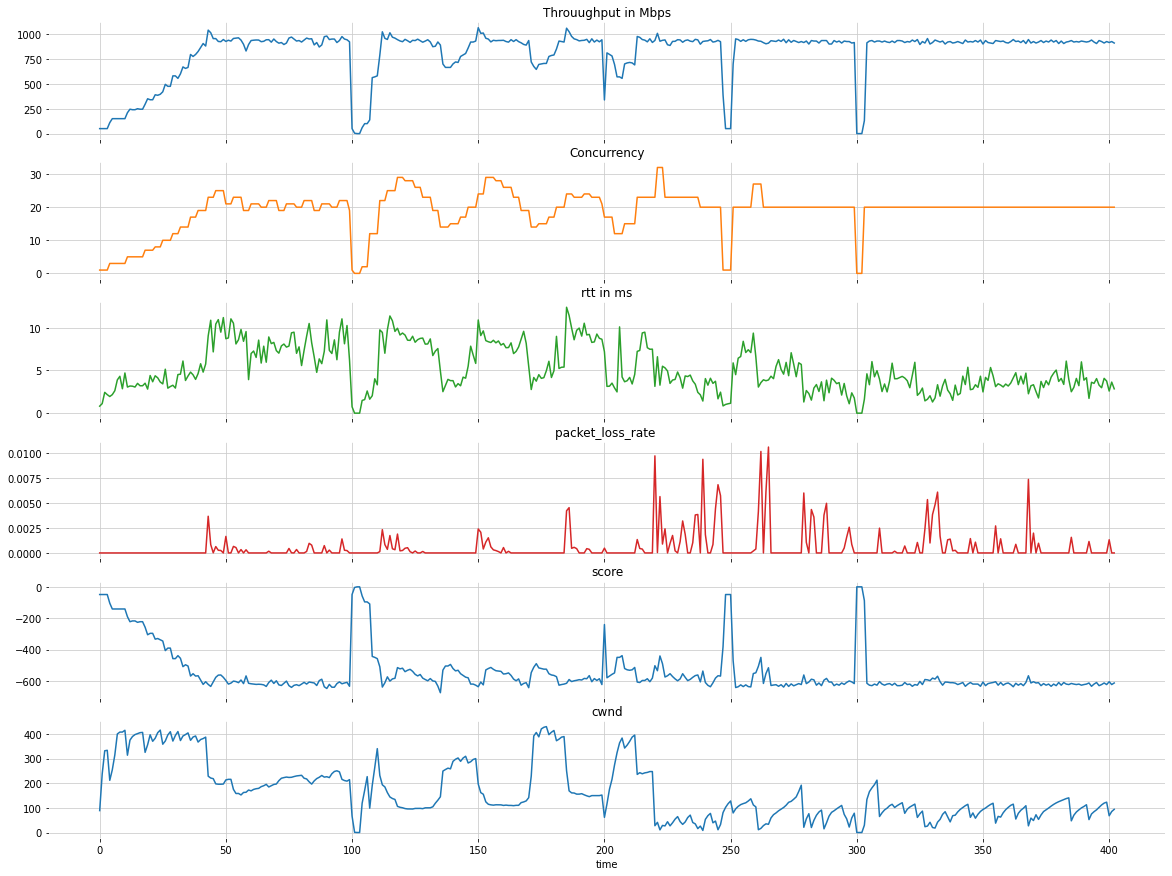

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_06_2022_14_52_16.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

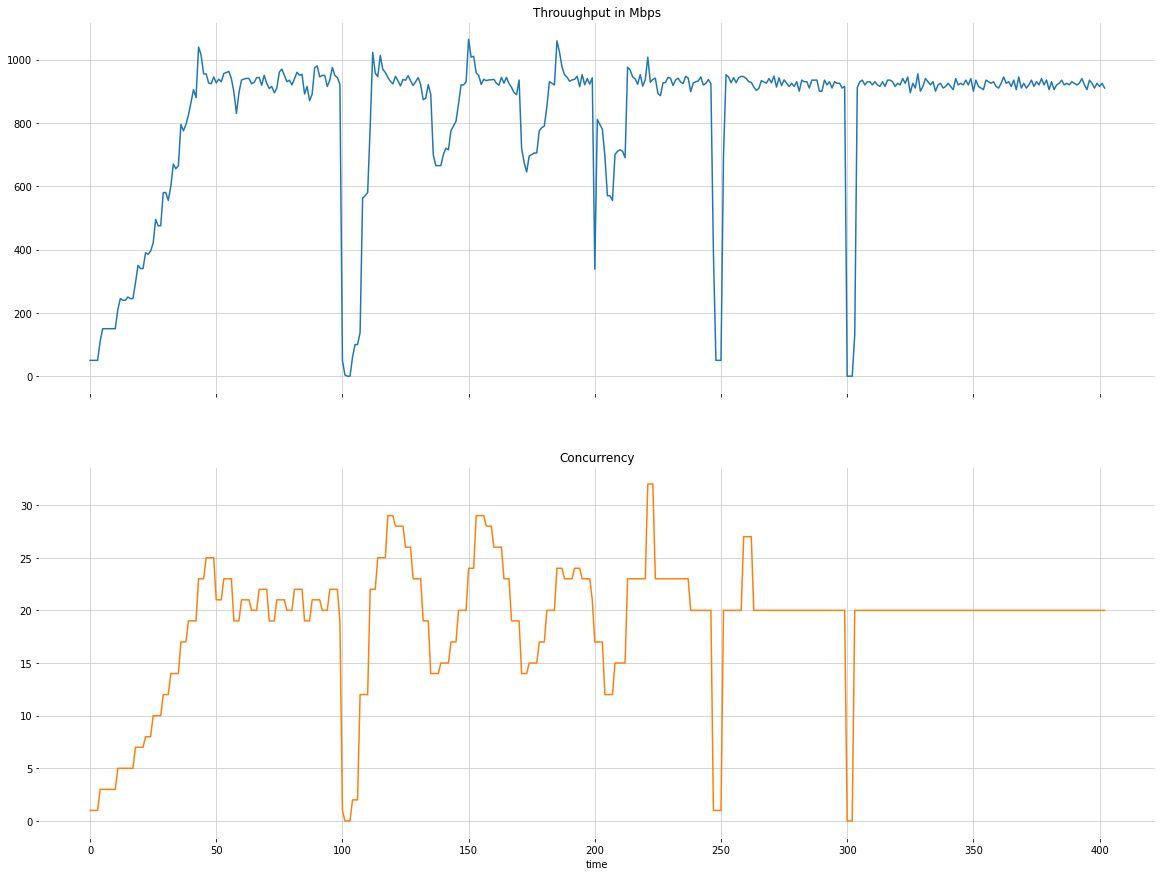

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_06_2022_14_52_16.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"

fig, axs = plt.subplots(2,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
# axs[2].plot(df['rtt'], 'tab:green')
# axs[2].set_title('rtt in ms')
# axs[3].plot(df['packet_loss_rate'],'tab:red')
# axs[3].set_title('packet_loss_rate ')
# axs[4].plot(df['score'])
# axs[4].set_title('score')
# axs[5].plot(df['cwnd'])
# axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

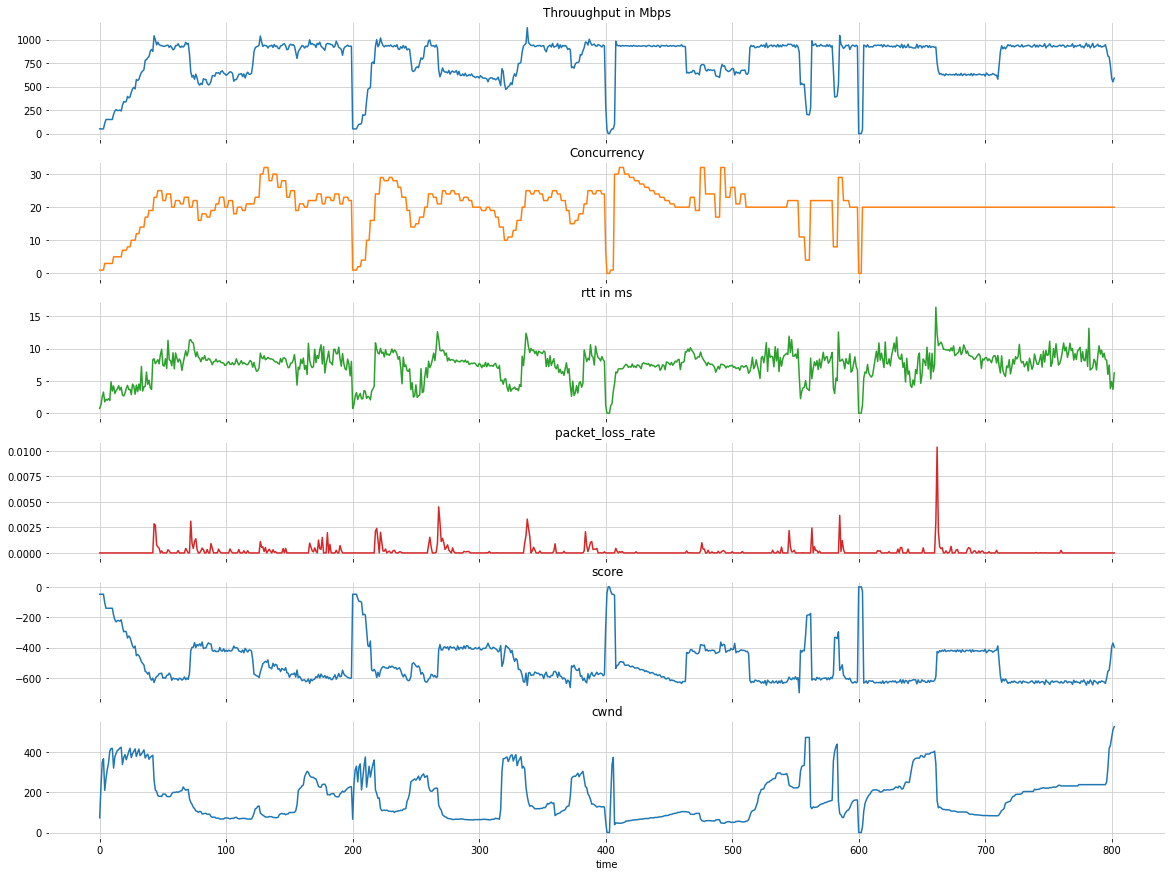

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_09_2022_13_03_04.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

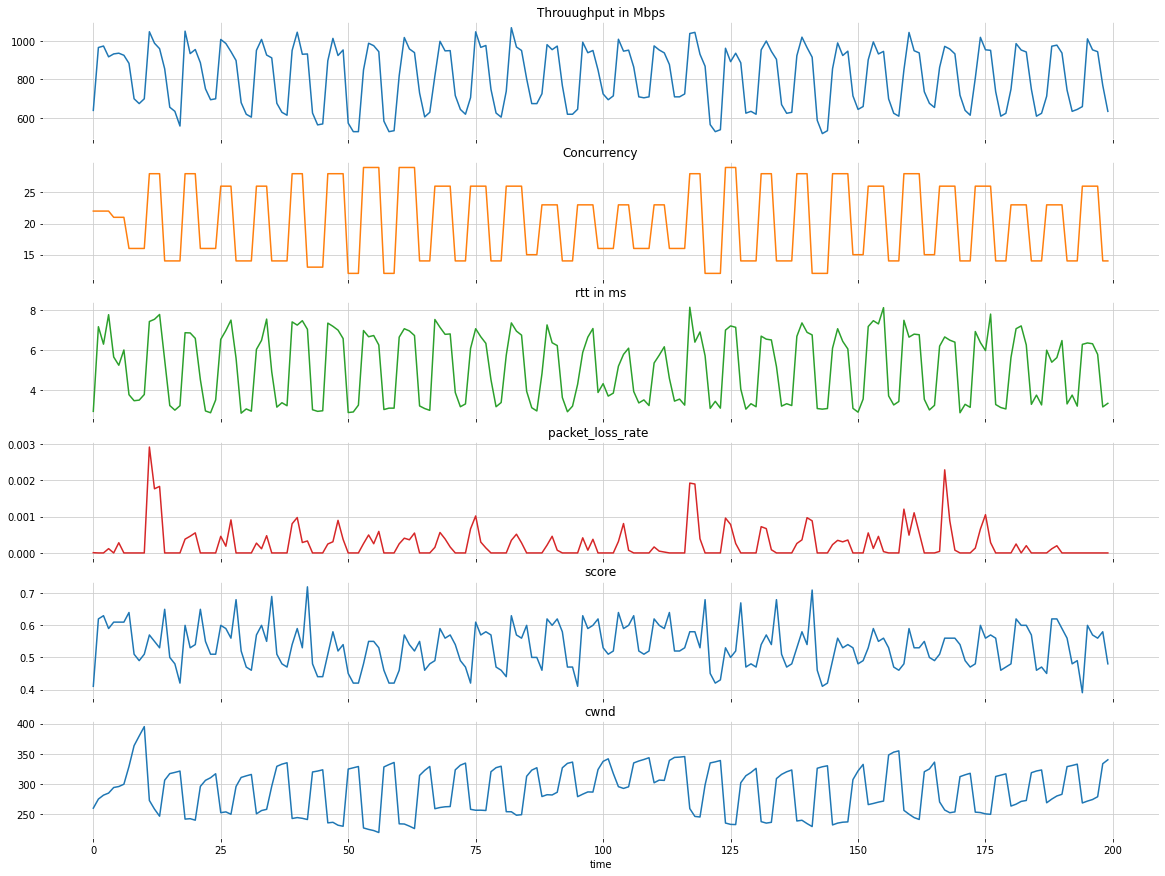

In [2]:
#########################
######PPO model 2000
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_18_2022_01_44_53.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

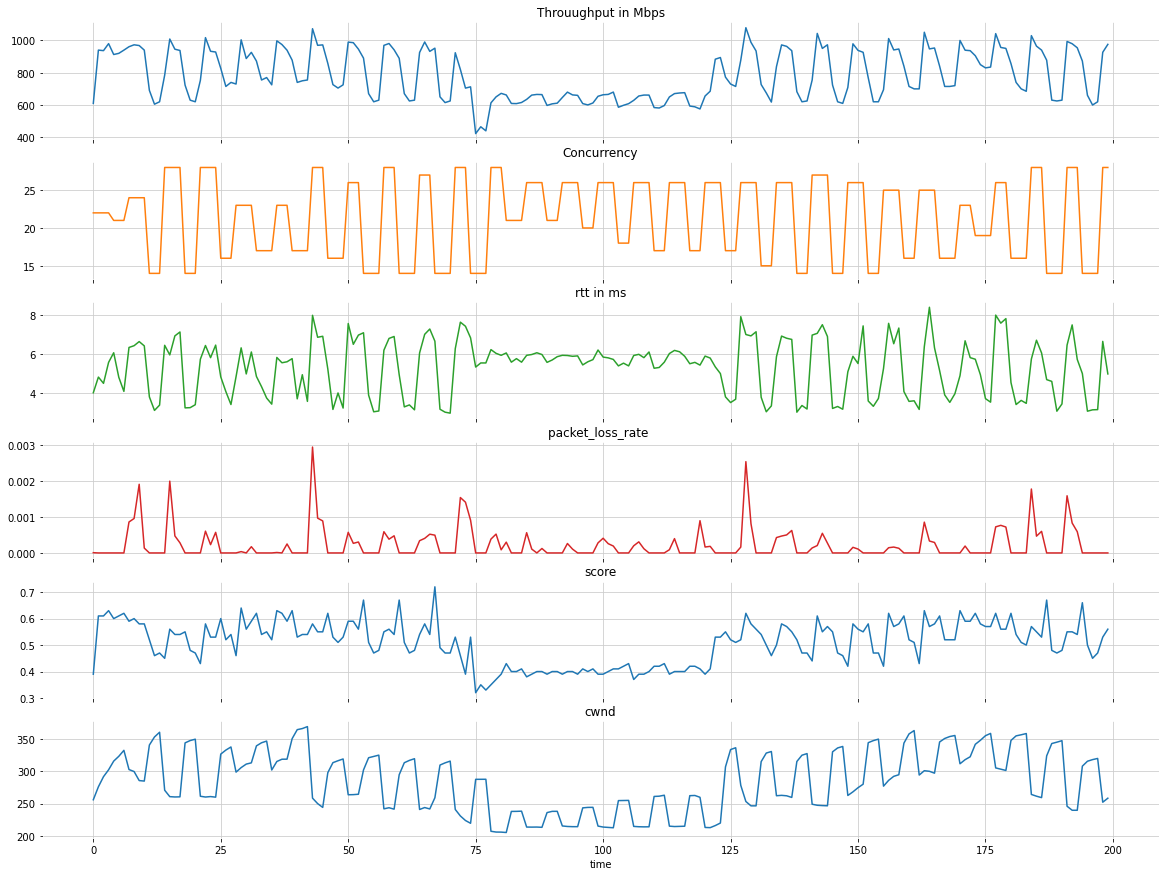

In [3]:
#########################
######PPO model 2000
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_18_2022_01_52_13.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

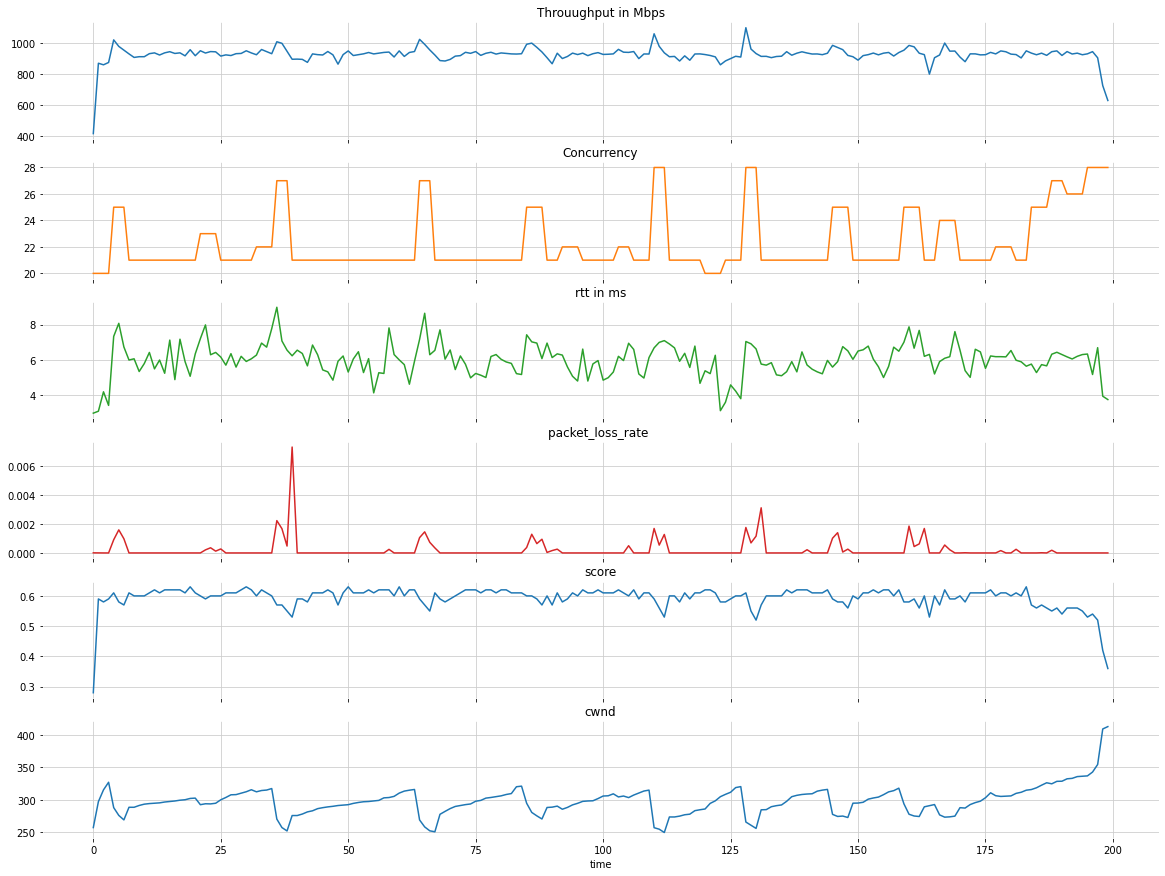

In [4]:
#########################
######PPO --model 0
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_18_2022_01_59_35.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

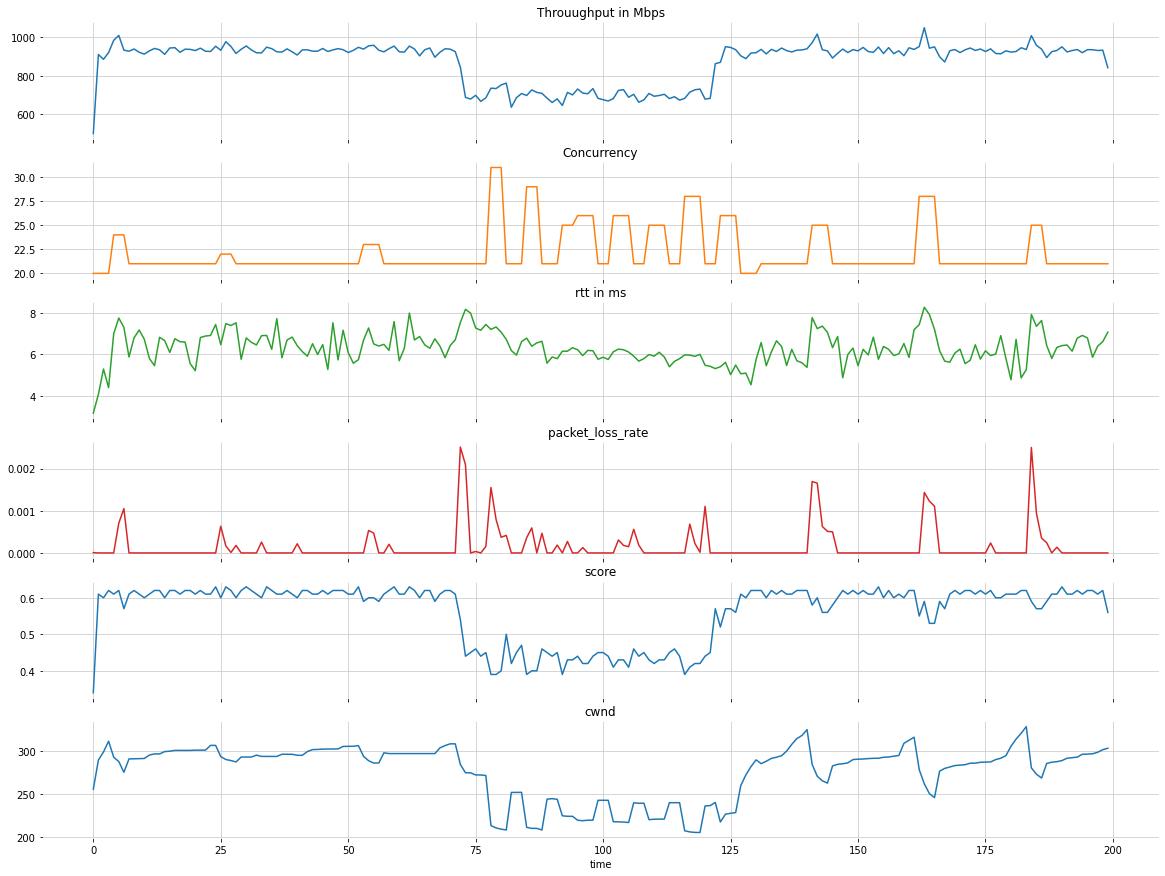

In [5]:
#########################
######PPO --model 0
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_18_2022_02_04_39.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

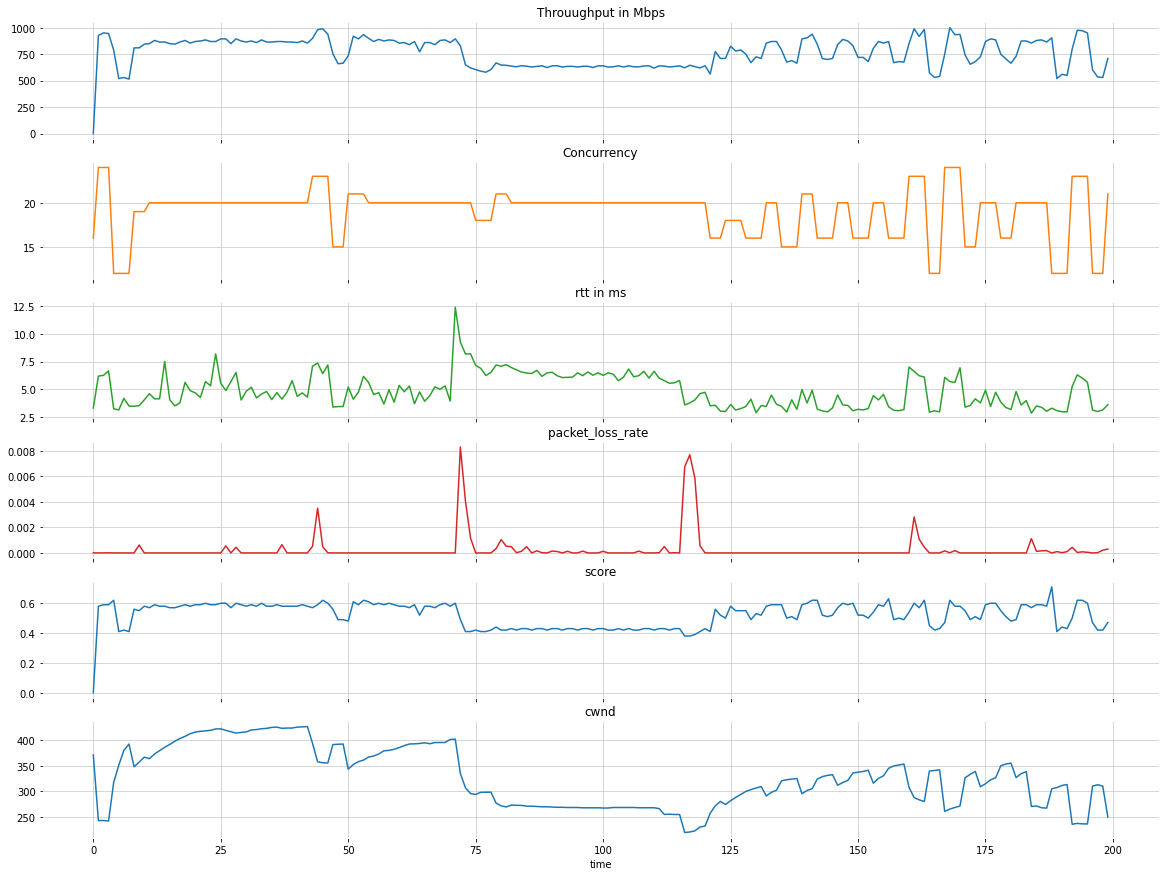

In [3]:
#########################
######PPO --model 1 --- 0
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_18_2022_16_50_41.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

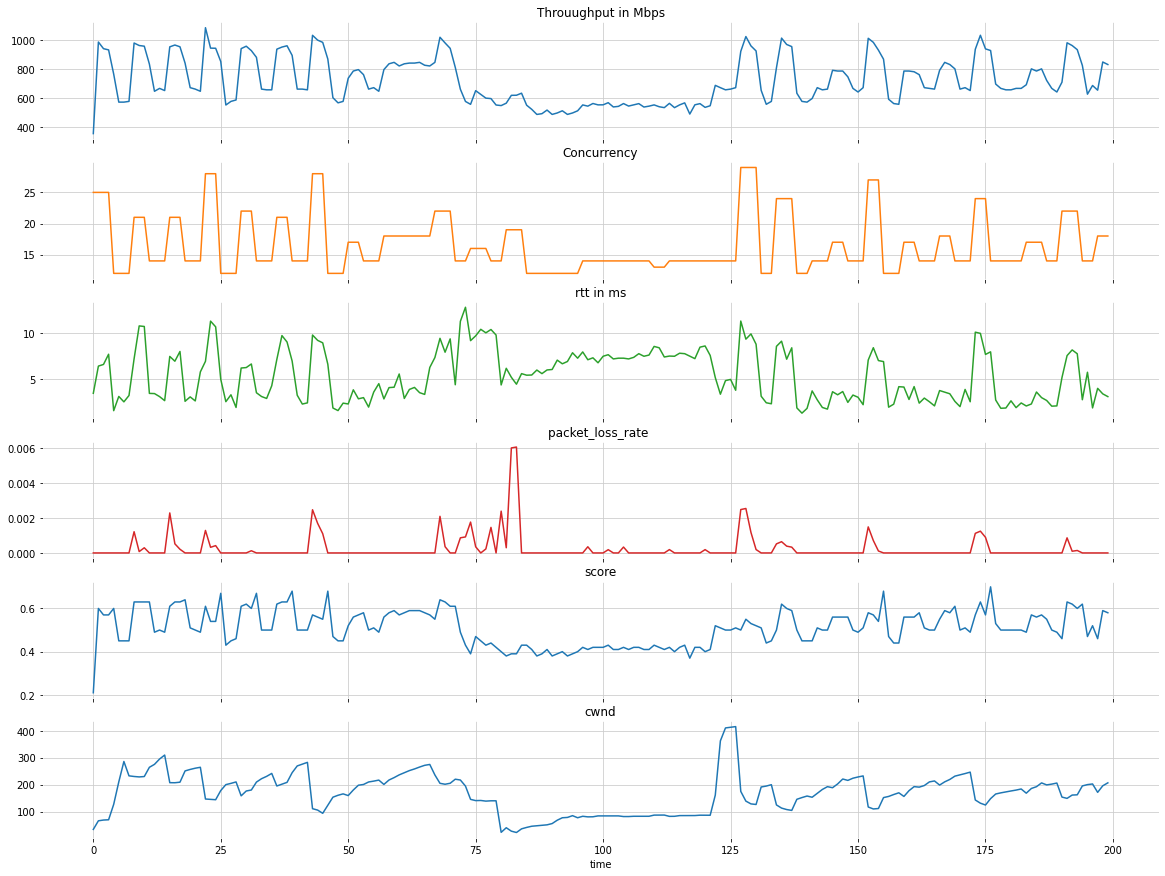

In [2]:
#########################
######PPO --model 1 --- 1000
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_18_2022_17_42_28.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

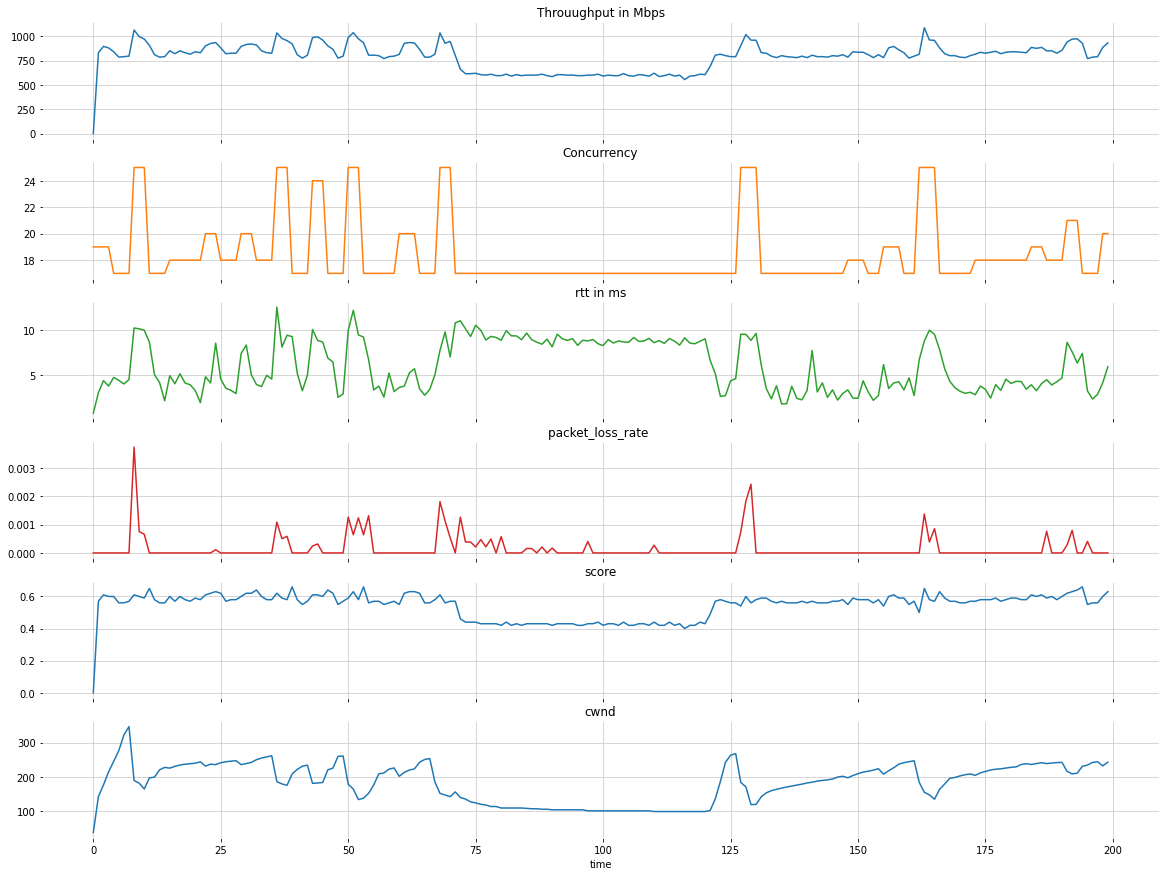

In [3]:
#########################
######PPO --model 1 --- 2000
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_18_2022_17_48_55.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

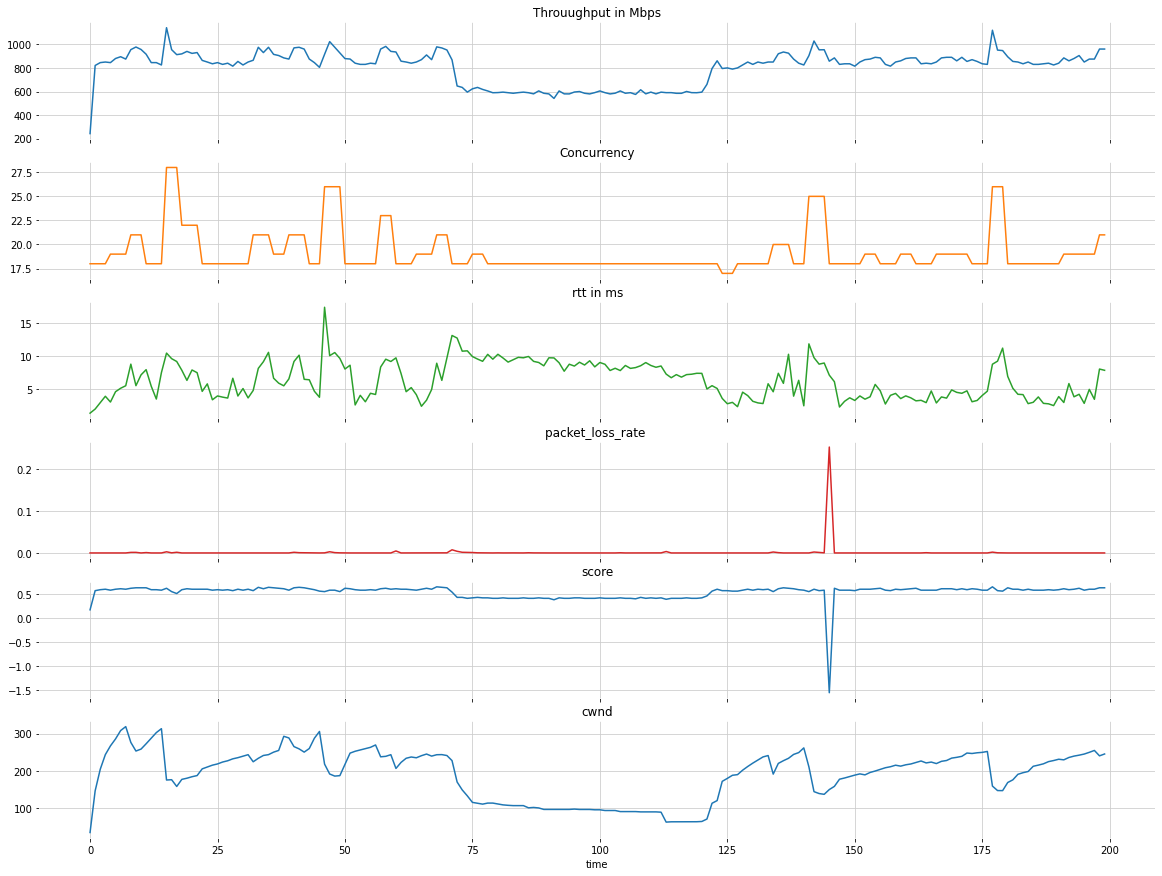

In [2]:
#########################
######PPO --model 1 --- 3000
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_18_2022_17_58_51.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

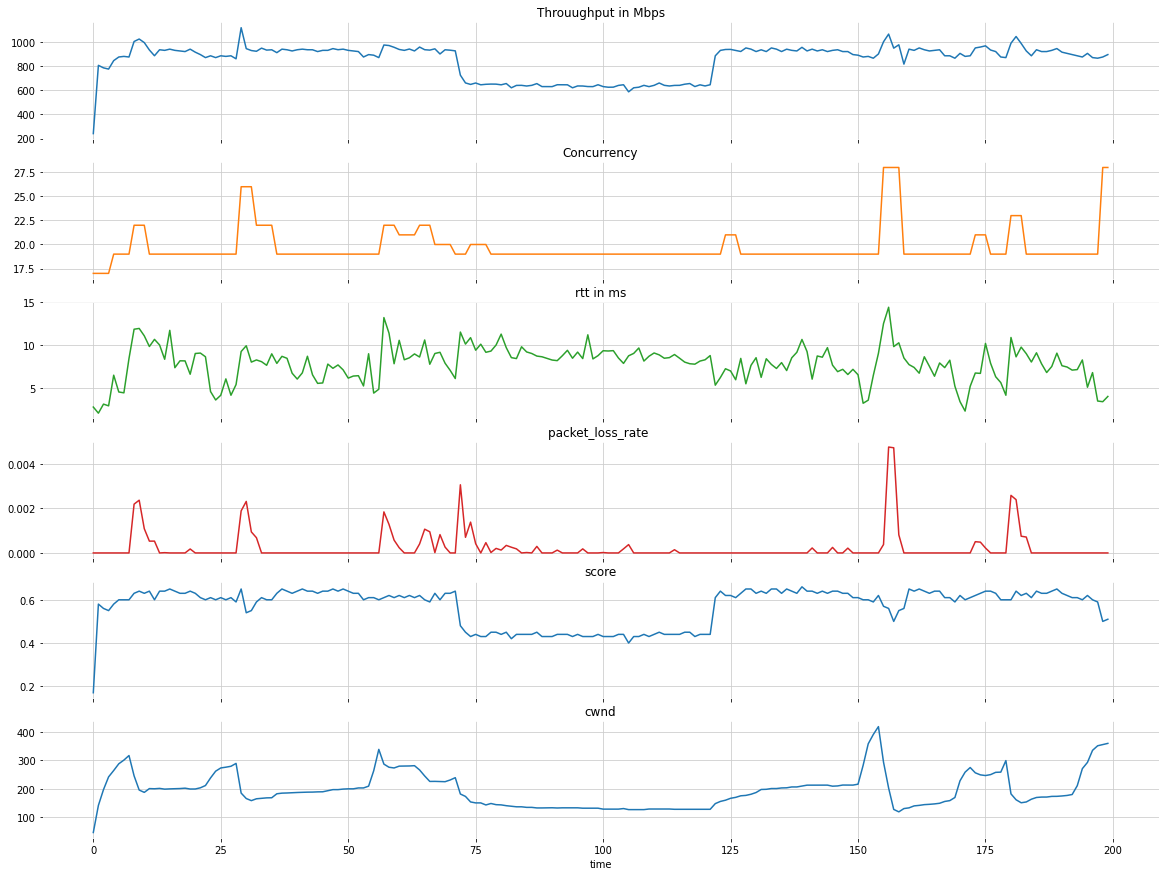

In [3]:
#########################
######PPO --model 1 --- 4000
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_18_2022_18_04_30.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

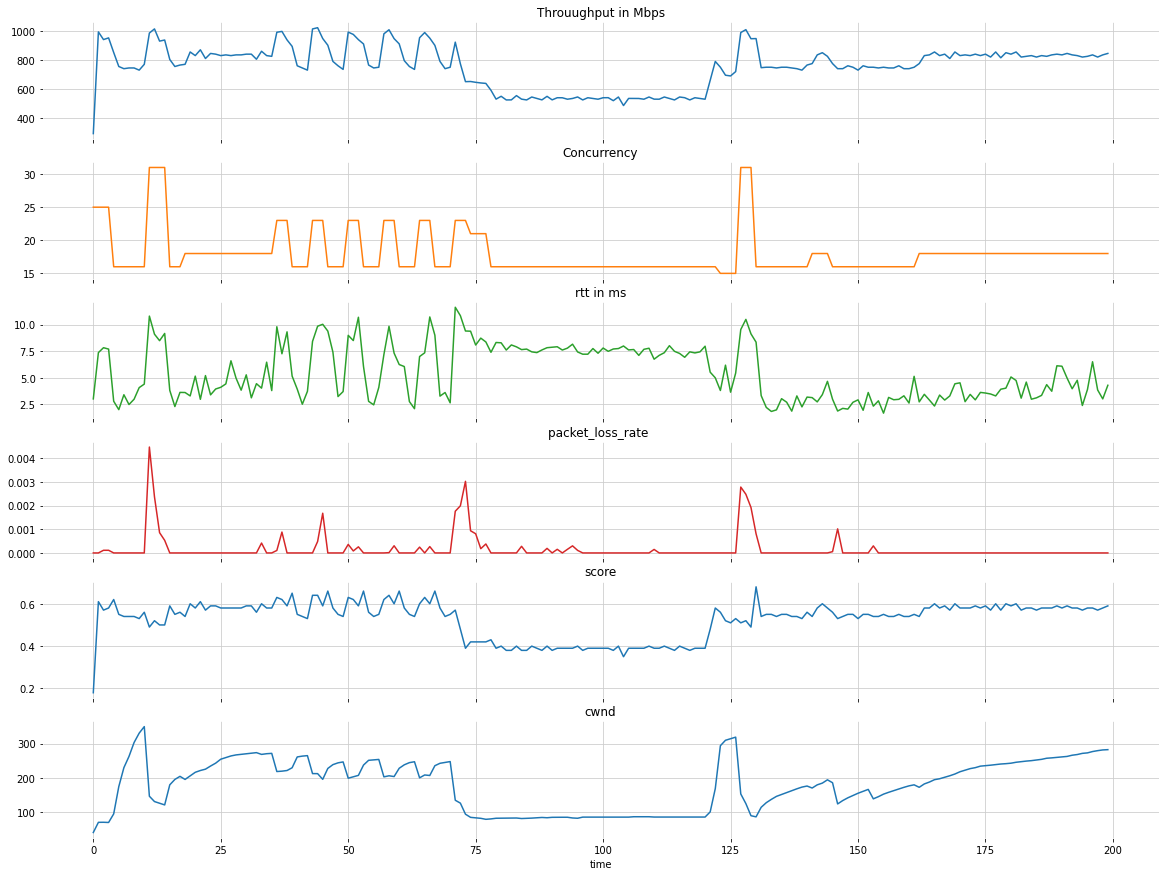

In [2]:
#########################
######PPO --model 2 --- 0
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_19_2022_15_11_03.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

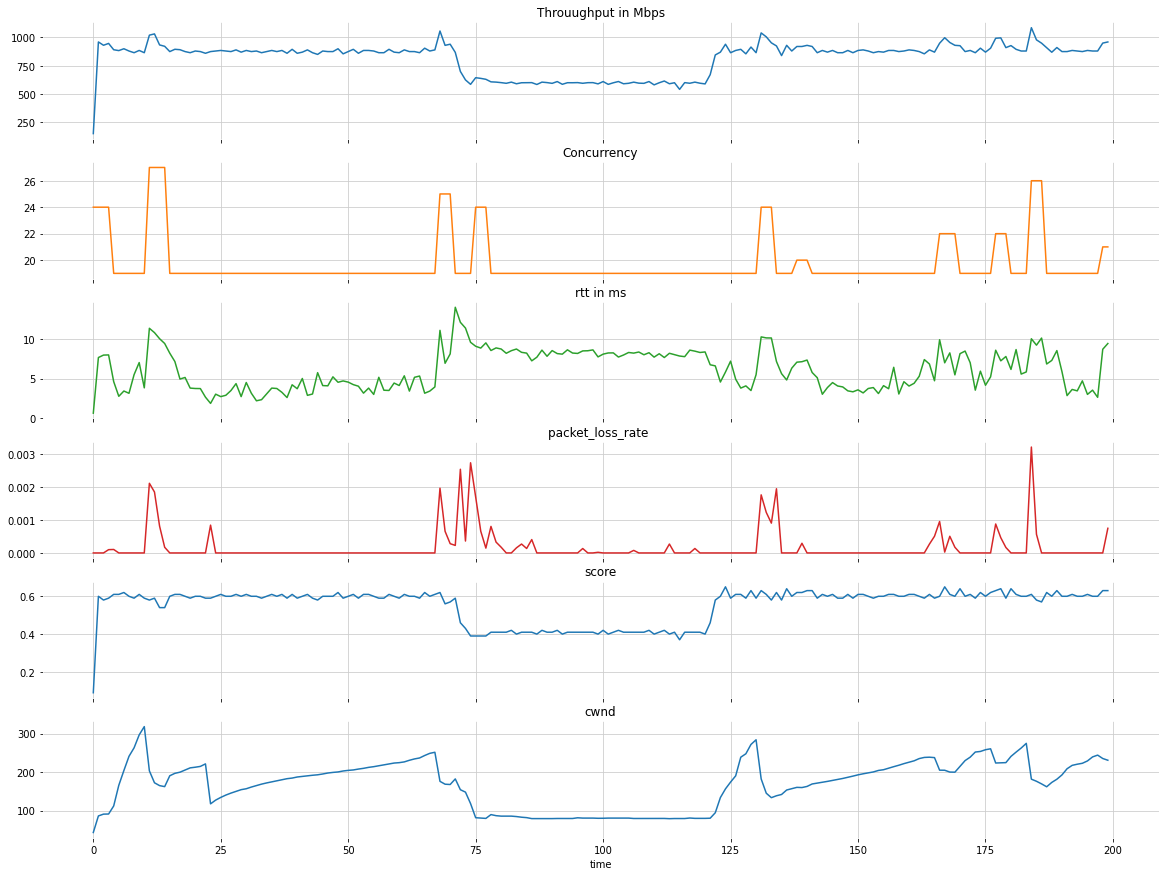

In [3]:
#########################
######PPO --model 2 --- 1000
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_19_2022_15_19_25.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

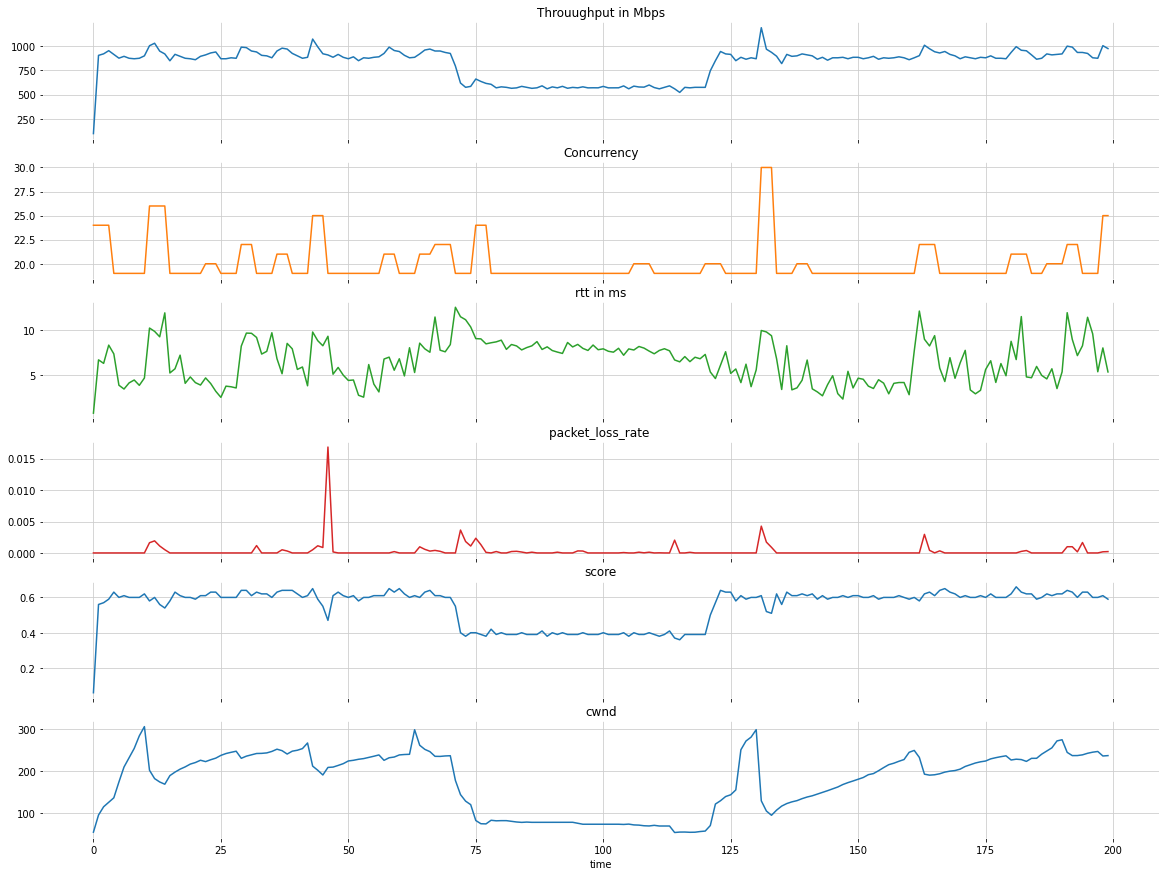

In [5]:
#########################
######PPO --model 2 --- 2000
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_19_2022_15_23_12.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

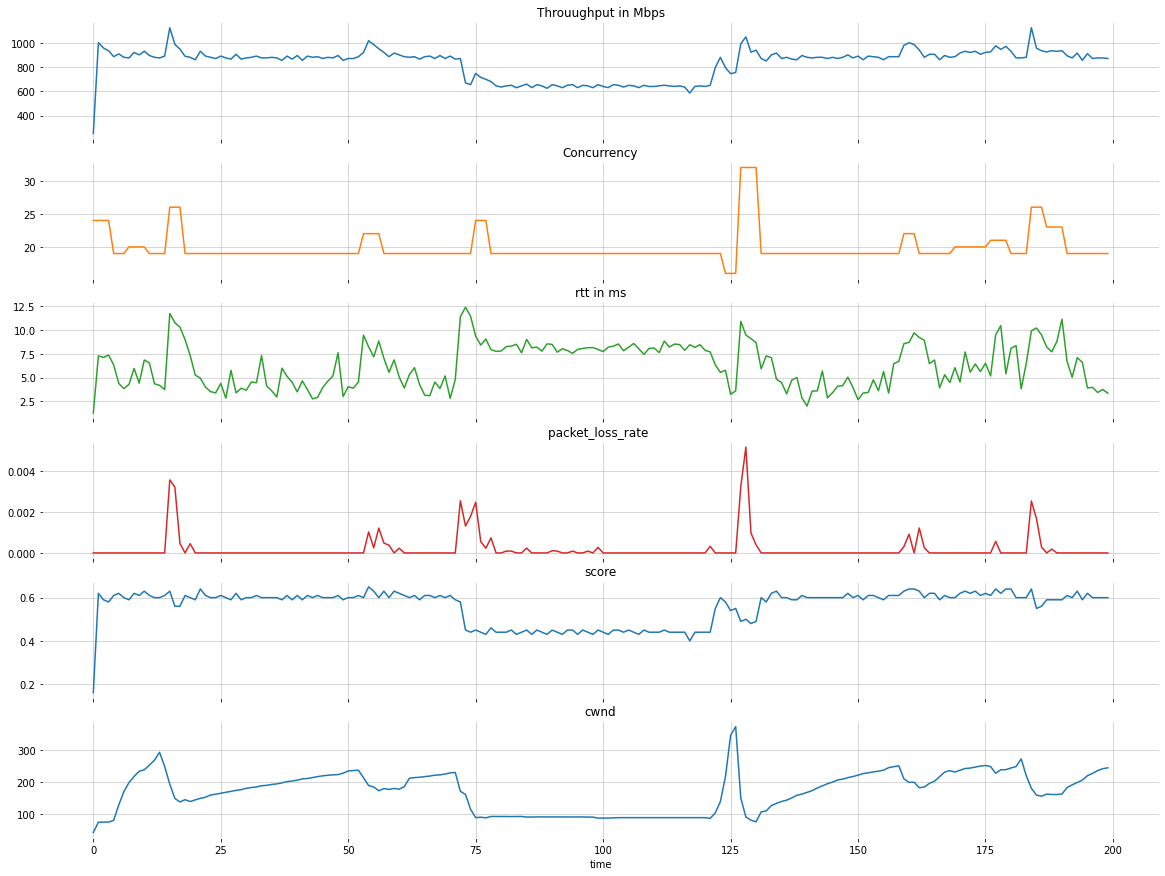

In [6]:
#########################
######PPO --model 2 --- 3000
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_19_2022_15_27_37.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

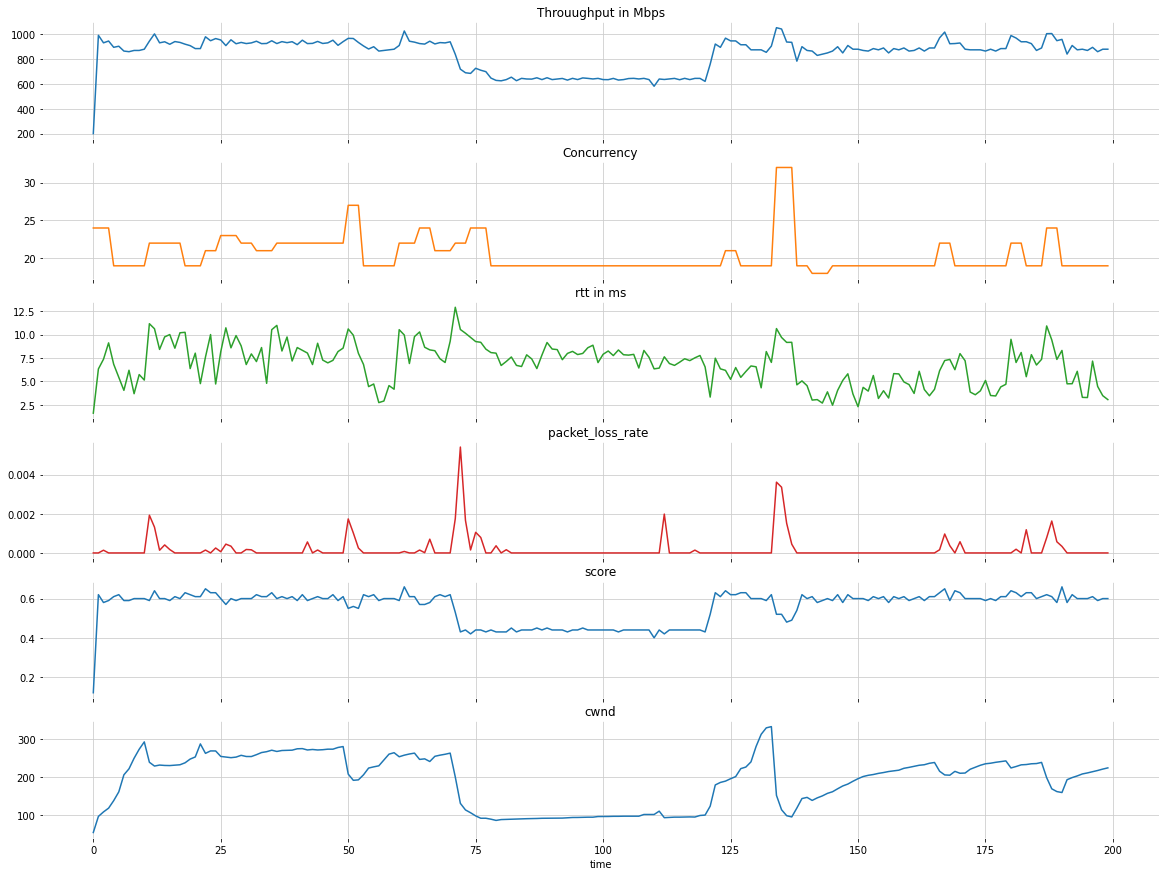

In [7]:
#########################
######PPO --model 2 --- 4000
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_19_2022_15_38_14.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

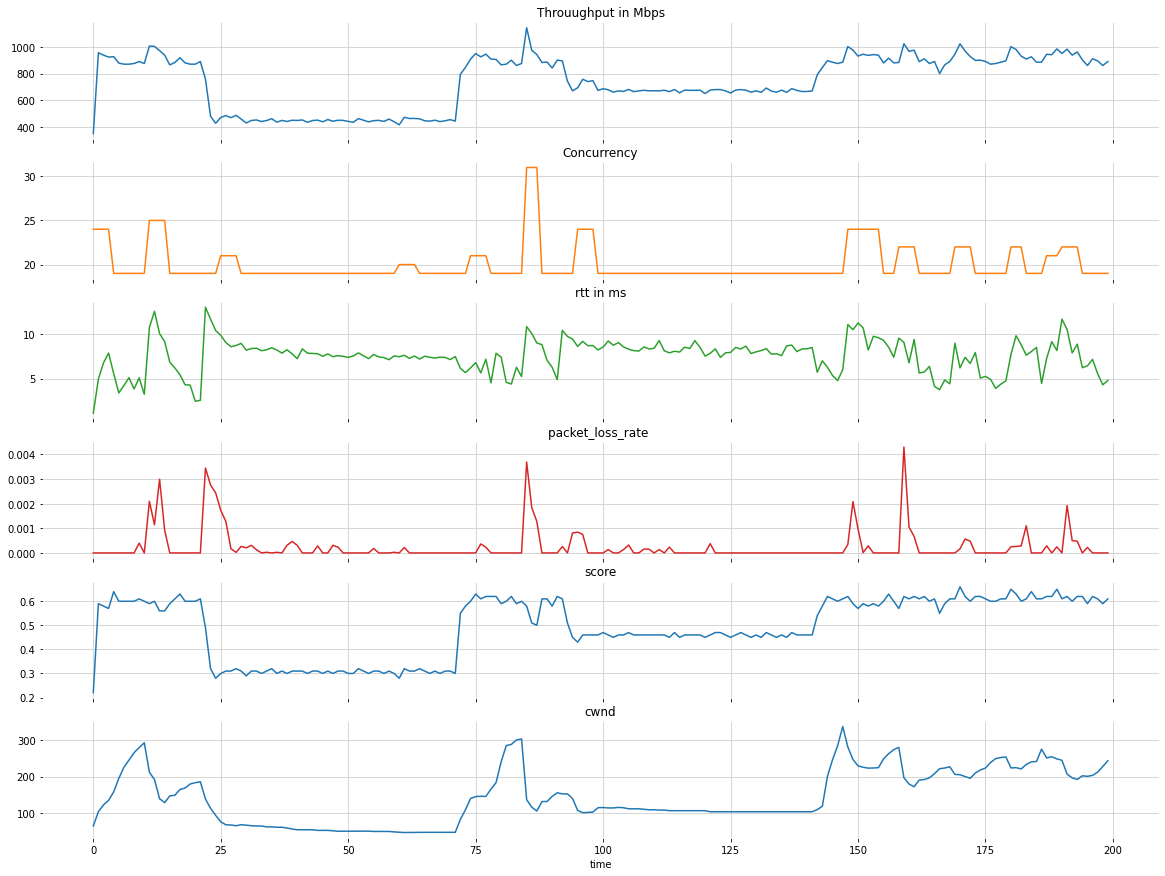

In [8]:
#########################
######PPO --model 2 --- 4000 with background traffic 20 stream and 5 stream
########################

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_19_2022_15_42_25.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

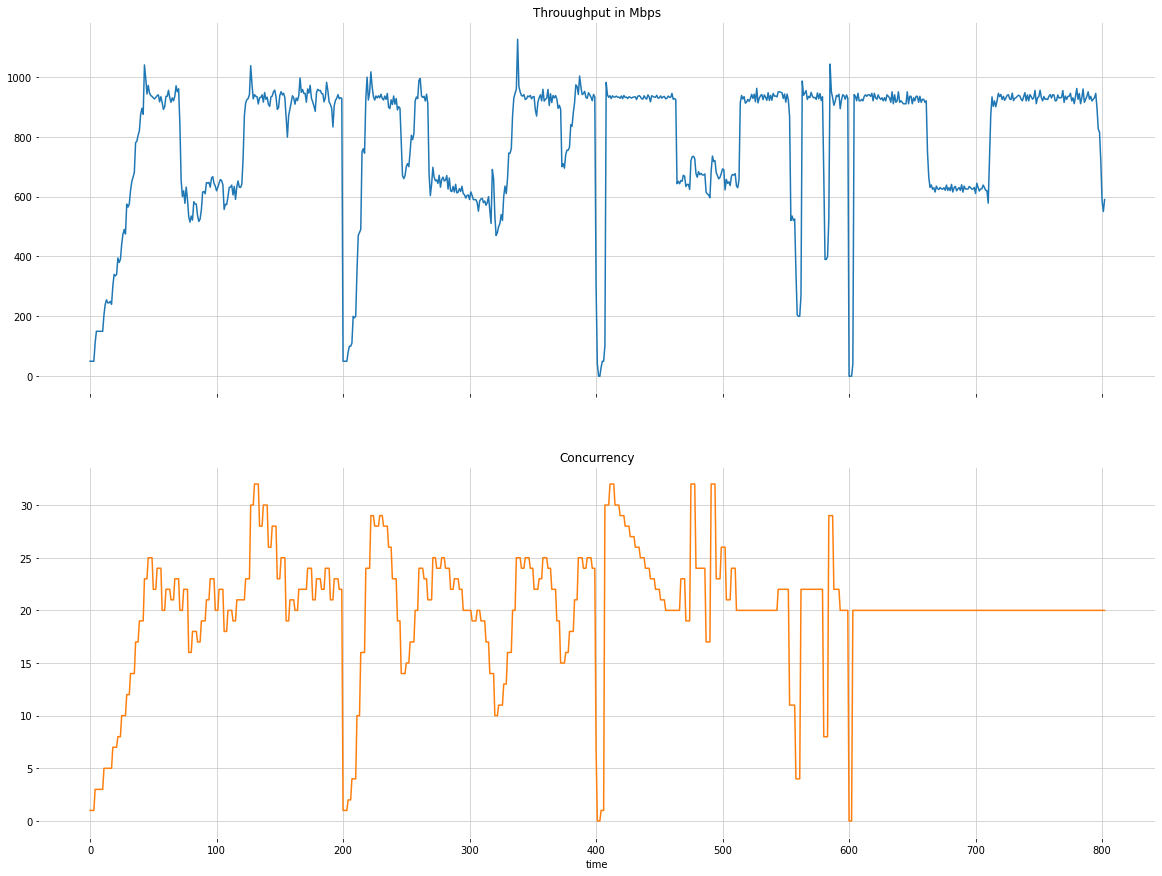

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_09_2022_13_03_04.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"

fig, axs = plt.subplots(2,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
# axs[2].plot(df['rtt'], 'tab:green')
# axs[2].set_title('rtt in ms')
# axs[3].plot(df['packet_loss_rate'],'tab:red')
# axs[3].set_title('packet_loss_rate ')
# axs[4].plot(df['score'])
# axs[4].set_title('score')
# axs[5].plot(df['cwnd'])
# axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

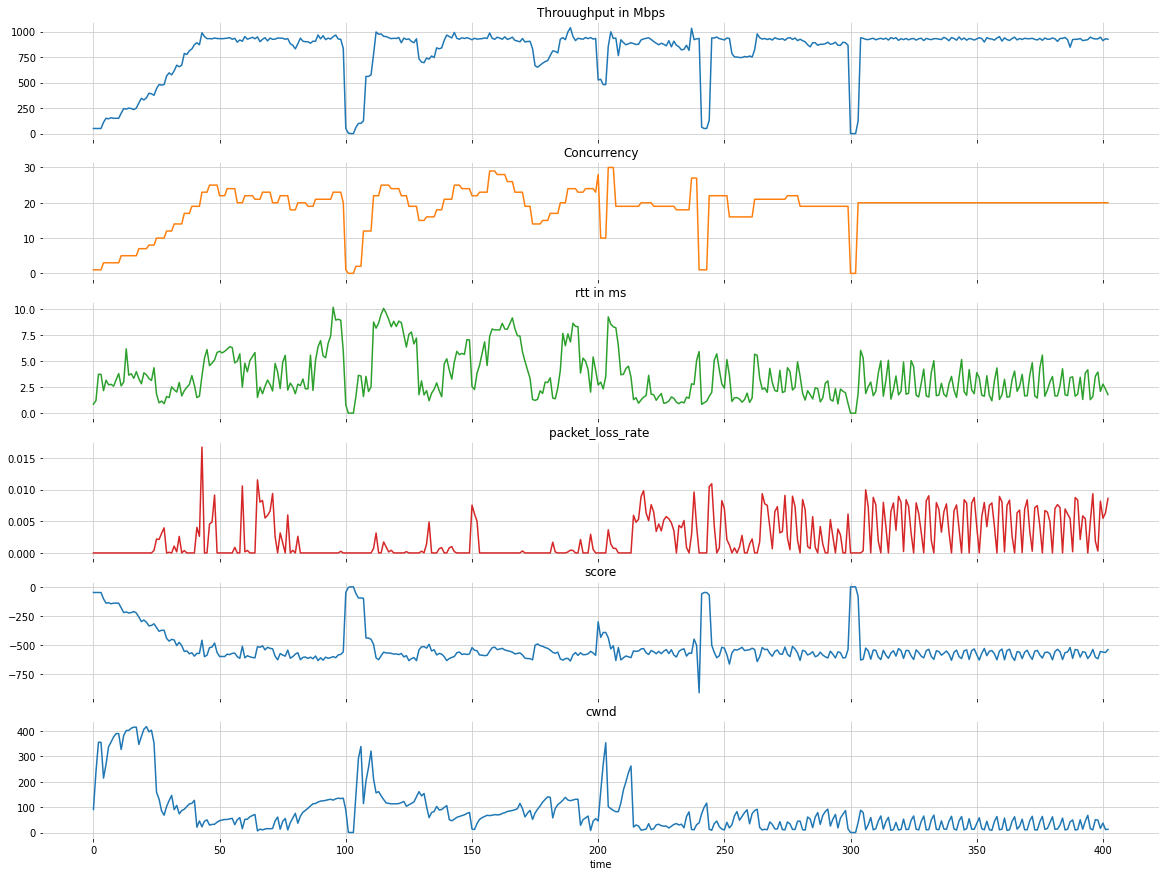

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_09_2022_15_46_39.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

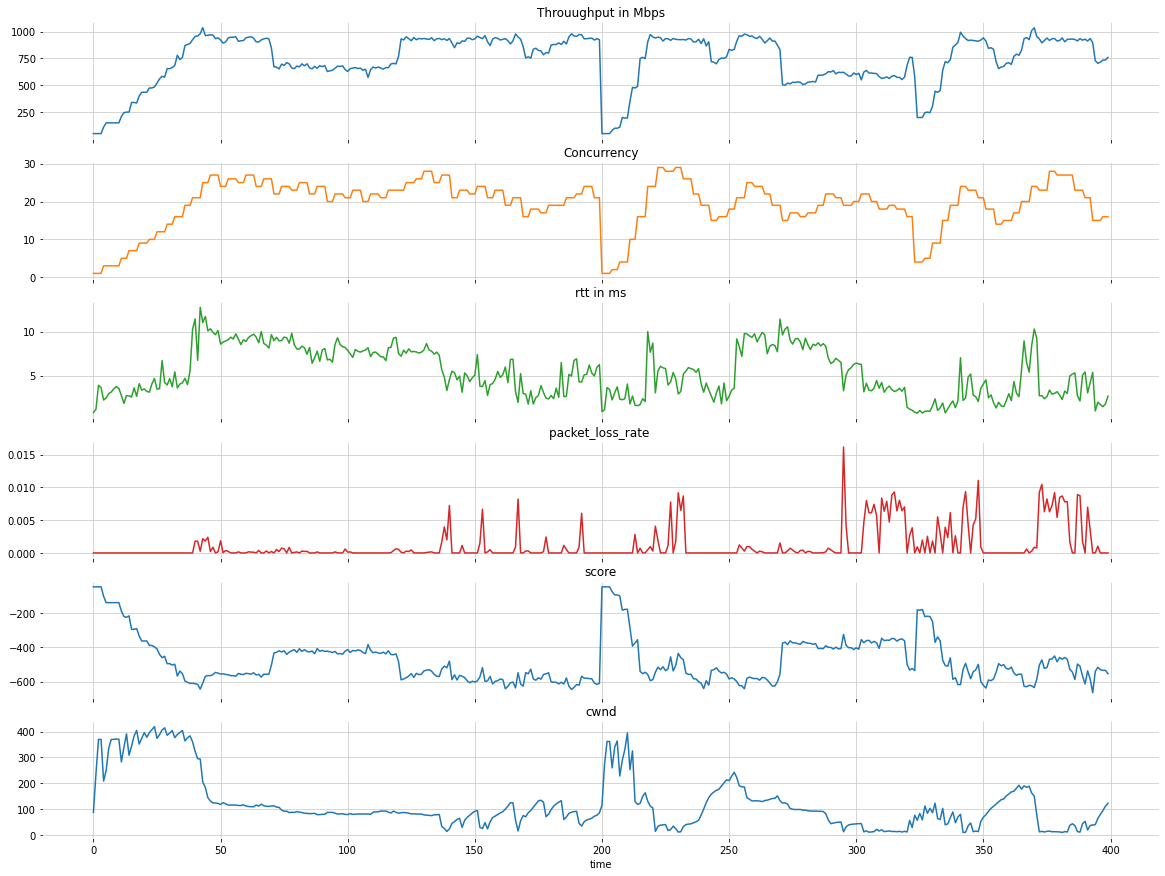

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_09_2022_16_10_10.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

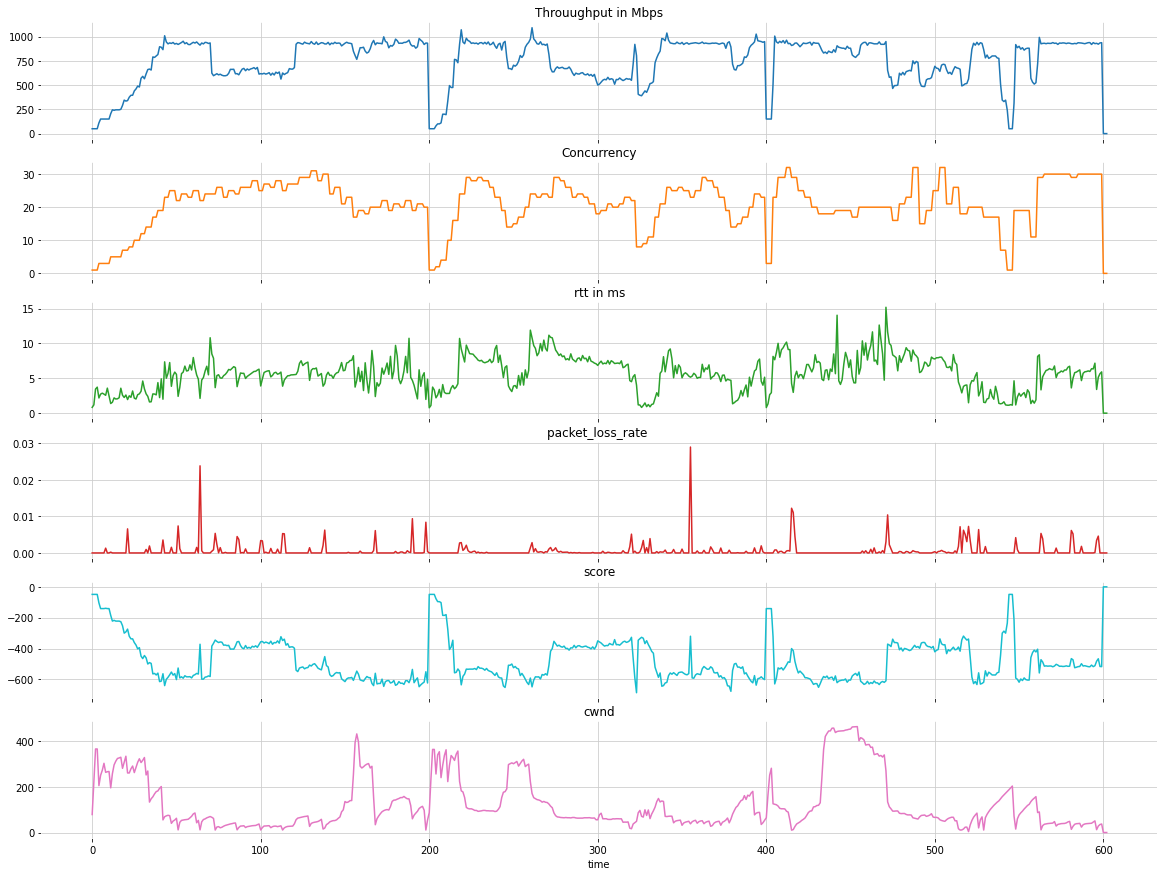

In [39]:
# df = pd.concat(
#     map(pd.read_csv, ['mydata.csv', 'mydata1.csv']), ignore_index=True)

import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import itertools as it

# # read_csv wrapper
# def rd_csv(fn, separ,hdr):
#     return pd.read_csv(fn,sep=separ,header=hdr)

# inputs = [ ('record_08_09_2022_16_30_27.csv','\t',0), ('record_08_09_2022_16_35_38.csv','\t',None) ]

# # Read all files
# df = pd.concat(it.starmap(rd_csv, inputs), ignore_index=True)
data = pd.read_csv("record_08_09_2022_16_30_27.csv",sep='\t')
df1 = pd.DataFrame(data)
data = pd.read_csv("record_08_09_2022_16_35_38.csv",sep='\t')
df2 = pd.DataFrame(data)
data = pd.read_csv("record_08_09_2022_17_08_54.csv",sep='\t')
df3 = pd.DataFrame(data)
data = pd.read_csv("record_08_09_2022_17_22_06.csv",sep='\t')
df4 = pd.DataFrame(data)
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'],'tab:cyan')
axs[4].set_title('score')
axs[5].plot(df['cwnd'],'tab:pink')
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

In [22]:
import itertools as it

# read_csv wrapper
def rd_csv(fn, separ,hdr):
    return pd.read_csv(fn,sep=separ,header=hdr)

inputs = [ ('record_08_09_2022_16_30_27.csv','\t',0), ('record_08_09_2022_16_35_38.csv','\t',None) ]

# Read all files
df = pd.concat(it.starmap(rd_csv, inputs), ignore_index=False)

In [23]:
df

curr_thrpt  cc_level   cwnd   rtt  packet_loss_rate  score  \
0          50.0       1.0   79.0  0.83               0.0  -49.0   
1          50.0       1.0  221.0  1.19               0.0  -49.0   
2          50.0       1.0  367.0  3.46               0.0  -49.0   
3          50.0       1.0  367.0  3.73               0.0  -49.0   
4         110.0       3.0  206.0  2.18               0.0 -104.0   
..          ...       ...    ...   ...               ...    ...   
196         NaN       NaN    NaN   NaN               NaN    NaN   
197         NaN       NaN    NaN   NaN               NaN    NaN   
198         NaN       NaN    NaN   NaN               NaN    NaN   
199         NaN       NaN    NaN   NaN               NaN    NaN   
200         NaN       NaN    NaN   NaN               NaN    NaN   

                      date_time       0    1     2     3  \
0    2022-08-09 16:30:28.317050     NaN  NaN   NaN   NaN   
1    2022-08-09 16:30:29.278844     NaN  NaN   NaN   NaN   
2    2022-08-09 16:30:30.280466     NaN  NaN   NaN   NaN   
3    2022-08-09 16:30:31.278801     NaN  NaN   NaN   NaN   
4    2022-08-09 16:30:32.296597     NaN  NaN   NaN   NaN   
..                          ...     ...  ...   ...   ...   
196                         NaN  956.59   24  87.8  7.44   
197                         NaN  953.02   24  88.5  7.76   
198                         NaN  948.41   23  35.3  4.57   
199                         NaN  940.76   23  42.8  4.01   
200                         NaN  947.86   23  53.6  5.16   

                          4       5                           6  
0                       NaN     NaN                         NaN  
1                       NaN     NaN                         NaN  
2                       NaN     NaN                         NaN  
3                       NaN     NaN                         NaN  
4                       NaN     NaN                         NaN  
..                      ...     ...                         ...  
196                     0.0  -595.0  2022-08-09 16:38:55.150077  
197  1.2389884897969298e-05  -592.0  2022-08-09 16:38:56.153747  
198    0.001942923113745477  -583.0  2022-08-09 16:38:57.138061  
199   0.0002983998309067625  -594.0  2022-08-09 16:38:58.153638  
200                     0.0  -601.0  2022-08-09 16:38:59.130091  

[401 rows x 14 columns]

In [32]:
data = pd.read_csv("record_08_09_2022_16_30_27.csv",sep='\t')
df1 = pd.DataFrame(data)
data = pd.read_csv("record_08_09_2022_16_35_38.csv",sep='\t')
df2 = pd.DataFrame(data)
df = pd.concat([df1, df2])
df

curr_thrpt  cc_level   cwnd   rtt  packet_loss_rate  score  \
0         50.00         1   79.0  0.83          0.000000  -49.0   
1         50.00         1  221.0  1.19          0.000000  -49.0   
2         50.00         1  367.0  3.46          0.000000  -49.0   
3         50.00         1  367.0  3.73          0.000000  -49.0   
4        110.00         3  206.0  2.18          0.000000 -104.0   
..          ...       ...    ...   ...               ...    ...   
195      956.59        24   87.8  7.44          0.000000 -595.0   
196      953.02        24   88.5  7.76          0.000012 -592.0   
197      948.41        23   35.3  4.57          0.001943 -583.0   
198      940.76        23   42.8  4.01          0.000298 -594.0   
199      947.86        23   53.6  5.16          0.000000 -601.0   

                      date_time  
0    2022-08-09 16:30:28.317050  
1    2022-08-09 16:30:29.278844  
2    2022-08-09 16:30:30.280466  
3    2022-08-09 16:30:31.278801  
4    2022-08-09 16:30:32.296597  
..                          ...  
195  2022-08-09 16:38:55.150077  
196  2022-08-09 16:38:56.153747  
197  2022-08-09 16:38:57.138061  
198  2022-08-09 16:38:58.153638  
199  2022-08-09 16:38:59.130091  

[400 rows x 7 columns]

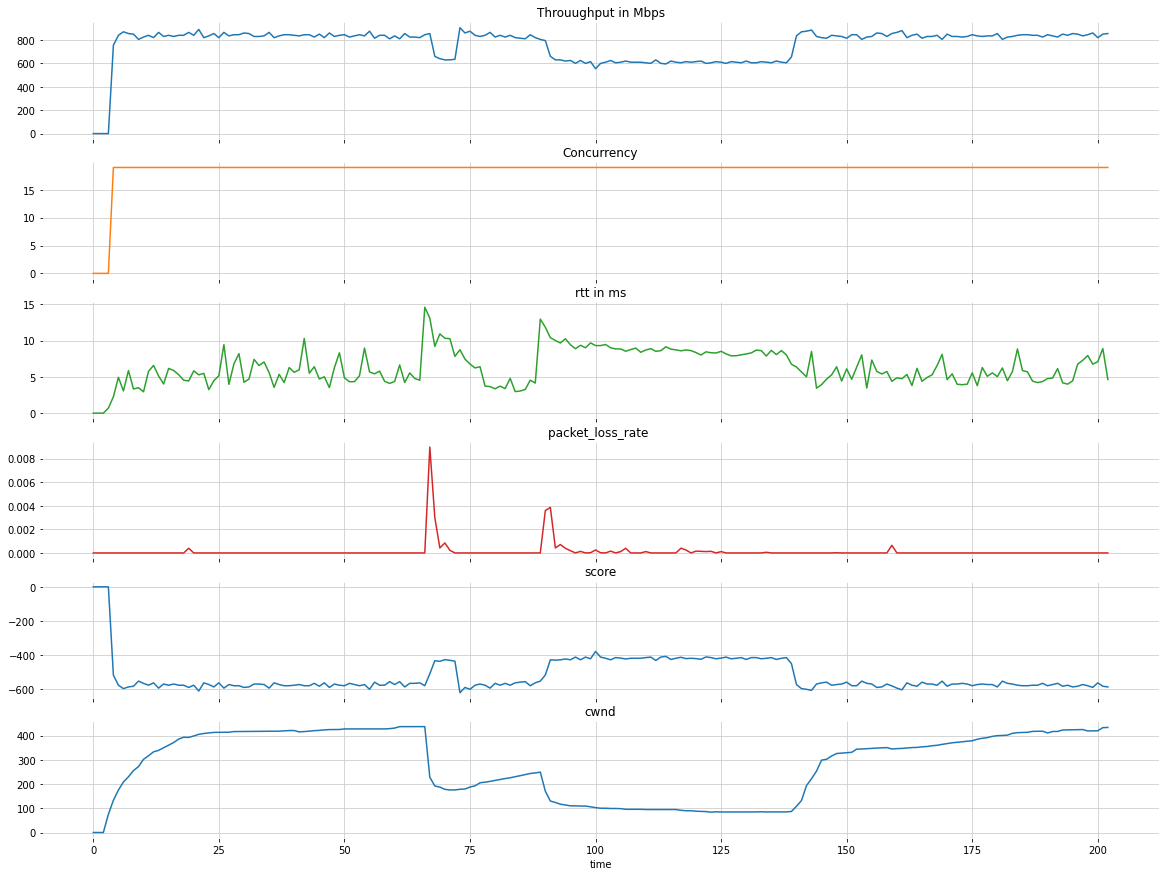

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_10_2022_15_31_20.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

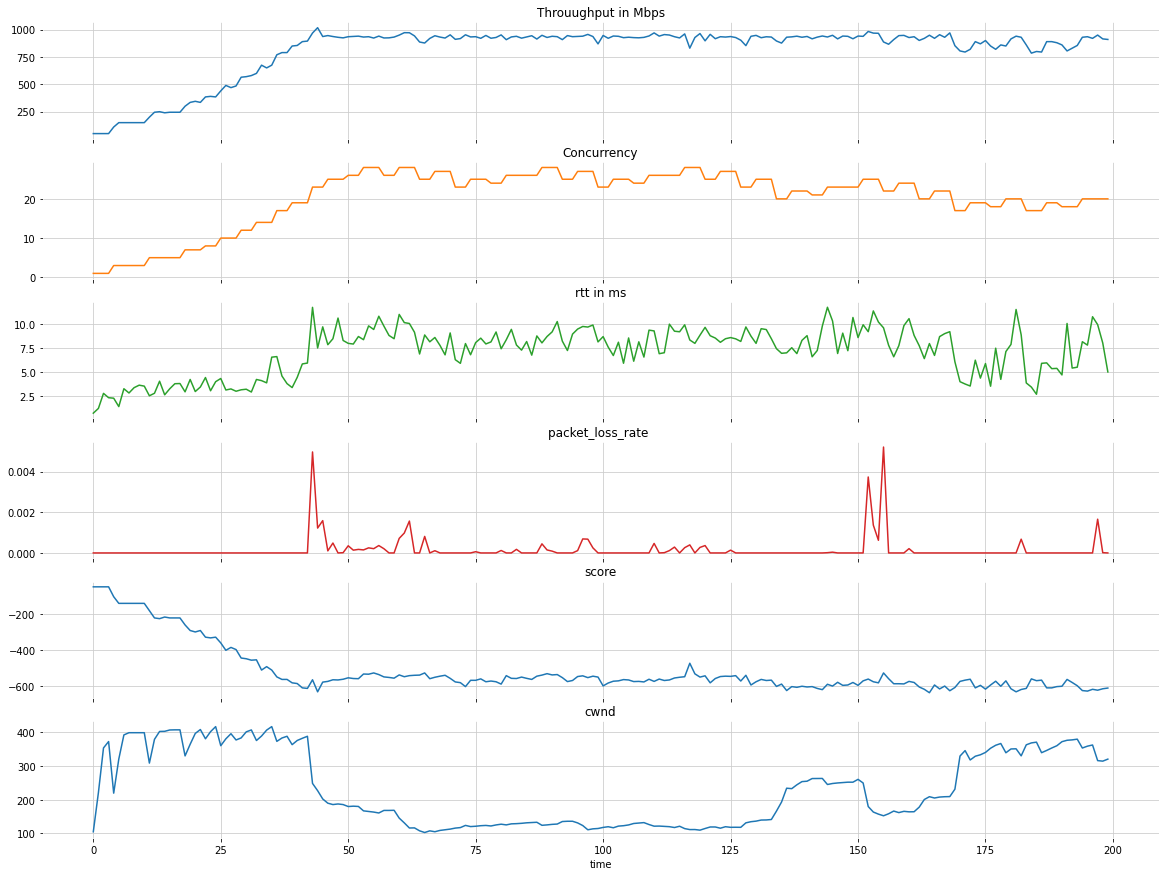

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_11_2022_10_56_48.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

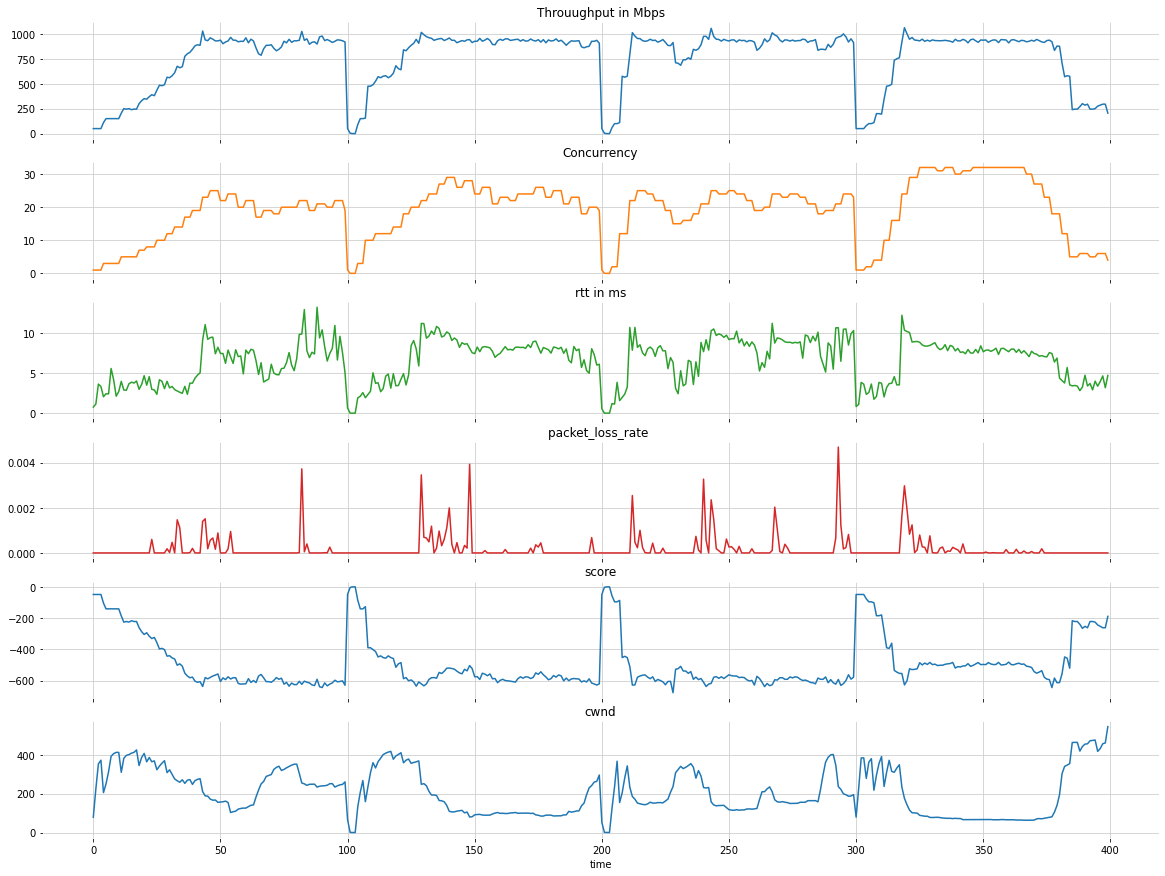

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_11_2022_11_26_14.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

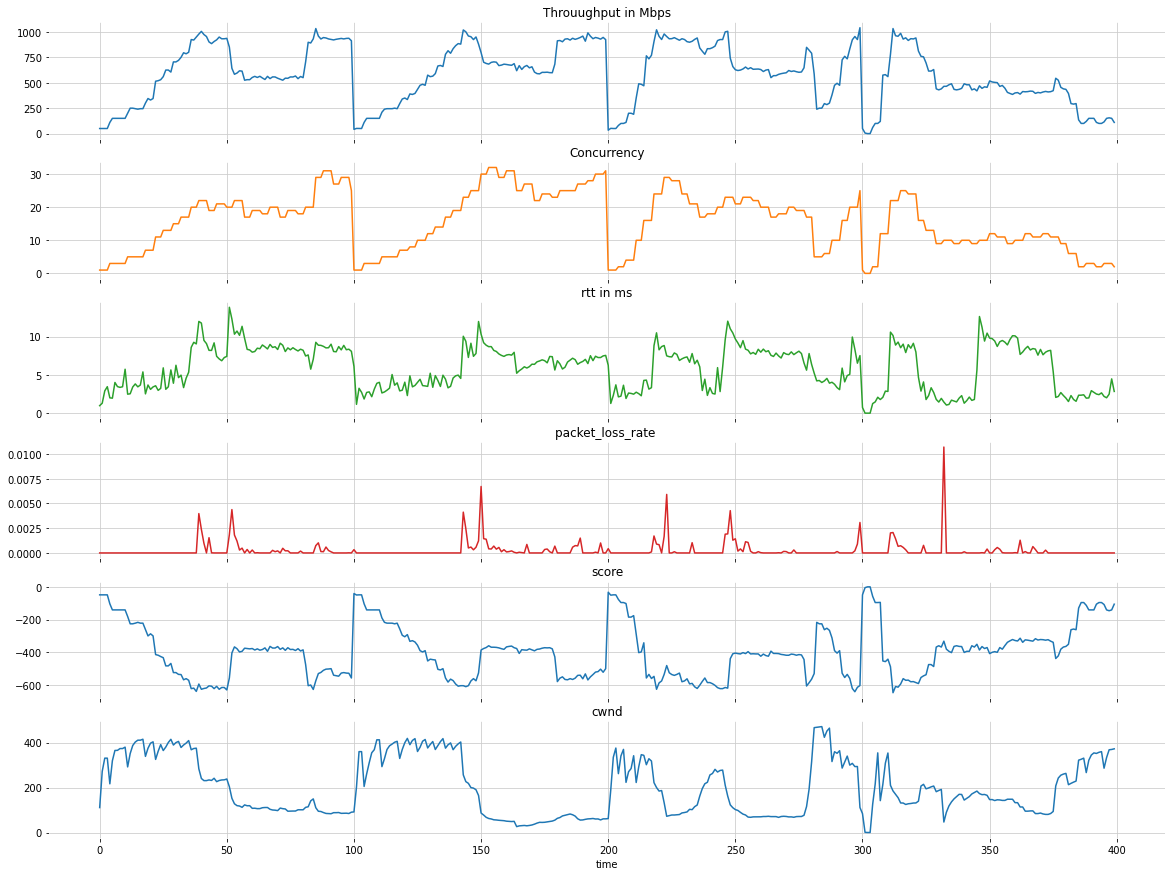

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_11_2022_11_39_10.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
fig, axs = plt.subplots(6,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
axs[2].plot(df['rtt'], 'tab:green')
axs[2].set_title('rtt in ms')
axs[3].plot(df['packet_loss_rate'],'tab:red')
axs[3].set_title('packet_loss_rate ')
axs[4].plot(df['score'])
axs[4].set_title('score')
axs[5].plot(df['cwnd'])
axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

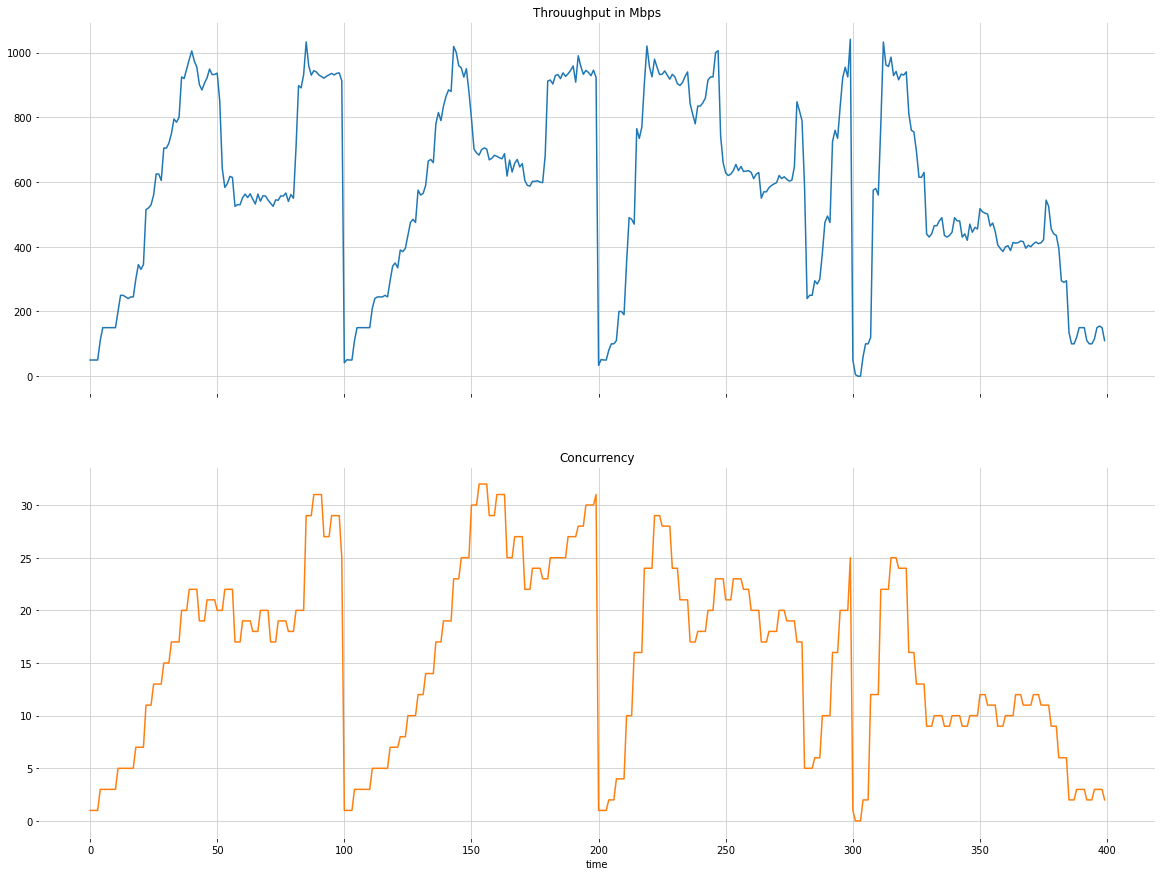

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("record_08_11_2022_11_39_10.csv",sep='\t')
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"

fig, axs = plt.subplots(2,sharex=True)
axs[0].plot(df['curr_thrpt'])
axs[0].set_title('Throuughput in Mbps')
axs[1].plot(df['cc_level'], 'tab:orange')
axs[1].set_title('Concurrency')
# axs[2].plot(df['rtt'], 'tab:green')
# axs[2].set_title('rtt in ms')
# axs[3].plot(df['packet_loss_rate'],'tab:red')
# axs[3].set_title('packet_loss_rate ')
# axs[4].plot(df['score'])
# axs[4].set_title('score')
# axs[5].plot(df['cwnd'])
# axs[5].set_title('cwnd')
for ax in axs.flat:
    ax.set(xlabel='time', ylabel='')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
# df.plot(x='date_time', y="curr_thrpt", "cc_level", "rtt","packet_loss_rate","score" , kind="line",figsize=(9, 8))

In [7]:
import numpy as np
npArray=[1.,          0.41263783, -1.,          0.8751563,   1.,          0.7828003,
 -1.,         -0.809163,   -0.9470546,  -1.,          0.15366906, -1.,
  0.40266174, -0.6985273,   1. ,         0.697139,    0.37798893,  0.29390922,
 -0.7857848,  -0.8352711,   0.8517918,   1. ,         0.7676873,   0.68726313,
 -1.  ,       -0.2758739,  -1. ,        -1.  ,       -1.   ,      -1.,
 -1.    ,      1.]

npArray1=np.array(npArray)
action_t=np.argmax(npArray1)
action_t

0

In [5]:
npArray1=np.array([ 1.          0.41263783 -1.          0.8751563   1.          0.7828003
 -1.         -0.809163   -0.9470546  -1.          0.15366906 -1.
  0.40266174 -0.6985273   1.          0.697139    0.37798893  0.29390922
 -0.7857848  -0.8352711   0.8517918   1.          0.7676873   0.68726313
 -1.         -0.2758739  -1.         -1.         -1.         -1.
 -1.          1.])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2010025743.py, line 1)